In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 12


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 12


store_mean_0-lag0-offset12

 family_0-lag0-offset12

 city_0-lag0-offset12

 cluster_mv36-lag0-offset12

 cluster_0-lag0-offset12

 city_mv36-lag0-offset12

 item_mean_0-lag0-offset12

 class_0-lag0-offset12

 type_0-lag0-offset12

 type_mv36-lag0-offset12

 state_mv36-lag0-offset12

 class_mv36-lag0-offset12

 state_0-lag0-offset12

 family_mv36-lag0-offset12

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset12

 y_0-lag1-offset12

 y_0-lag2-offset12

 y_0-lag3-offset12

 y_0-lag4-offset12

 y_0-lag5-offset12

 y_0-lag6-offset12

 sales_ma_224-lag0-offset12

 sales_ma_14-lag0-offset12

 sales_ma_28-lag0-offset12

 sales_ma_112-lag0-offset12

 sales_ma_7-lag0-offset12

 sales_ma_3-lag0-offset12

 sales_ma_56-lag0-offset12

 sales_week_season_ma_p7-lag2-offset12

 sales_week_season_ma_p4-lag2-offset12

 sales_week_season_ma_p13-lag2-offset12

 sales_week_season_ma_p2-lag2-offset12

 sales_week_season_ma_p3-lag2-offset12

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 25.6 s, total: 3min 6s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset12  family_0-lag0-offset12  \
1683                    1.291016                1.852539   
1684                    1.554688                1.739258   
1685                    1.582031                1.780273   
1686                    1.684570                1.749023   
1687                    1.474609                1.663086   
1688                    1.603516                1.717773   
1689                    1.486328                1.821289   

      city_0-lag0-offset12  cluster_mv36-lag0-offset12  \
1683              2.025391                    1.650391   
1684              1.891602                    1.648438   
1685              1.948242                    1.649414   
1686              1.941406                    1.654297   
1687              1.794922                    1.651367   
1688              1.867188                    1.654297   
1689              1.977539                    1.654297   

      cluster_0-lag0-offset12  city_mv36-lag0-offset12  \
1683                 1.696289                 1.875977   
1684                 1.631836                 1.871094   
1685                 1.679688                 1.875000   
1686                 1.729492                 1.880859   
1687                 1.544922                 1.880859   
1688                 1.635742                 1.884766   
1689                 1.663086                 1.888672   

      item_mean_0-lag0-offset12  class_0-lag0-offset12  type_0-lag0-offset12  \
1683                   2.013672               1.715820              1.728516   
1684                   1.767578               1.609375              1.654297   
1685                   1.710938               1.669922              1.695312   
1686                   1.789062               1.687500              1.740234   
1687                   1.869141               1.654297              1.556641   
1688                   2.099609               1.805664              1.651367   
1689                   2.132812               1.858398              1.693359   

      type_mv36-lag0-offset12  state_mv36-lag0-offset12  \
1683                 1.661133                  1.874023   
1684                 1.658203                  1.869141   
1685                 1.660156                  1.873047   
1686                 1.665039                  1.878906   
1687                 1.662109                  1.878906   
1688                 1.665039                  1.883789   
1689                 1.666992                  1.886719   

      class_mv36-lag0-offset12  state_0-lag0-offset12  \
1683                  1.661133               2.017578   
1684                  1.659180               1.890625   
1685                  1.664062               1.953125   
1686                  1.668945               1.944336   
1687                  1.671875               1.801758   
1688                  1.677734               1.870117   
1689                  1.680664               1.972656   

      family_mv36-lag0-offset12  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.719727                     1.0                1.0   
1684                   1.715820                     0.0                1.0   
1685                   1.717773                     0.0                1.0   
1686                   1.722656                     0.0                1.0   
1687                   1.723633                     0.0                1.0   
1688                   1.727539                     0.0                1.0   
1689                   1.731445                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset12  y_0-lag1-offset12  \
1683             0.733398           1.791992           2.564453   
1684             0.799805           2.197266           1.791992   
1685             0.866699           1.791992           2.197266   
1686             0.933105           2.197266           1.791992   
1687             0.000000           2.398438           2.197266 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset12     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset12  0.0002     0.0  0.0002     0.0   
2                     city_0-lag0-offset12     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset12     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset12     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset12     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset12  0.0837  0.0871  0.0866  0.0824   
7                    class_0-lag0-offset12  0.0085  0.0083   0.009  0.0078   
8                     type_0-lag0-offset12     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset12     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset12     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset12   0.008   0.008  0.0083  0.0083   
12                   state_0-lag0-offset12     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset12     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset12  0.5059  0.5149  0.5382  0.5295   
18                       y_0-lag1-offset12  0.5195  0.5059  0.5149  0.5382   
19                       y_0-lag2-offset12  0.4964  0.5195  0.5059  0.5149   
20                       y_0-lag3-offset12  0.4972  0.4964  0.5195  0.5059   
21                       y_0-lag4-offset12  0.5345  0.4972  0.4964  0.5195   
22                       y_0-lag5-offset12  0.5599  0.5345  0.4972  0.4964   
23                       y_0-lag6-offset12  0.5474  0.5599  0.5345  0.4972   
24              sales_ma_224-lag0-offset12  0.5036  0.5035  0.5036  0.5038   
25               sales_ma_14-lag0-offset12  0.5133  0.5107  0.5096  0.5089   
26               sales_ma_28-lag0-offset12  0.5021   0.502  0.5019   0.502   
27              sales_ma_112-lag0-offset12  0.4901  0.4899  0.4899  0.4899   
28                sales_ma_7-lag0-offset12  0.4975  0.4929  0.4903  0.4888   
29                sales_ma_3-lag0-offset12  0.4925  0.4987  0.5043  0.5131   
30               sales_ma_56-lag0-offset12  0.4943  0.4939  0.4938  0.4935   
31   sales_week_season_ma_p7-lag2-offset12     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag2-offset12     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag2-offset12     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag2-offset12  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag2-offset12     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0832   0.082  
7   0.0085  0.0078  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.4992  0.4994  
18  0.5295  0.4992  
19  0.5382  0.5295  
20  0.5149  0.5382  
21  0.5059  0.5149  
22  0.5195  0.5059  
23  0.4964  0.5195  
24  0.5037  0.5023  
25  0.5084  0.5077  
26  0.5023  0.5027  
27  0.4897  0.4896  
28  0.4891  0.4896  
29  0.5077  0.4927  
30  0.4939  0.4942  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2495:44:40 - loss: 2.0687

     9216/316424880 [..............................] - ETA: 277:50:19 - loss: 0.7222 

    17408/316424880 [..............................] - ETA: 147:22:16 - loss: 0.5956

    25600/316424880 [..............................] - ETA: 100:23:53 - loss: 0.5218

    32768/316424880 [..............................] - ETA: 78:34:06 - loss: 0.4760 

    40960/316424880 [..............................] - ETA: 62:58:14 - loss: 0.4403

    49152/316424880 [..............................] - ETA: 52:34:12 - loss: 0.4222

    57344/316424880 [..............................] - ETA: 45:08:29 - loss: 0.4058

    65536/316424880 [..............................] - ETA: 39:34:01 - loss: 0.3908

    73728/316424880 [..............................] - ETA: 35:14:03 - loss: 0.3793

    81920/316424880 [..............................] - ETA: 31:46:05 - loss: 0.3680

    90112/316424880 [..............................] - ETA: 28:55:48 - loss: 0.3598

    98304/316424880 [..............................] - ETA: 26:33:58 - loss: 0.3542

   106496/316424880 [..............................] - ETA: 24:34:00 - loss: 0.3485

   114688/316424880 [..............................] - ETA: 22:51:10 - loss: 0.3445

   122880/316424880 [..............................] - ETA: 21:22:03 - loss: 0.3409

   131072/316424880 [..............................] - ETA: 20:04:05 - loss: 0.3383

   139264/316424880 [..............................] - ETA: 18:55:18 - loss: 0.3343

   147456/316424880 [..............................] - ETA: 17:54:08 - loss: 0.3317

   155648/316424880 [..............................] - ETA: 16:59:22 - loss: 0.3280

   163840/316424880 [..............................] - ETA: 16:10:08 - loss: 0.3256

   172032/316424880 [..............................] - ETA: 15:25:29 - loss: 0.3232

   180224/316424880 [..............................] - ETA: 14:44:58 - loss: 0.3212

   188416/316424880 [..............................] - ETA: 14:07:56 - loss: 0.3186

   196608/316424880 [..............................] - ETA: 13:33:55 - loss: 0.3157

   204800/316424880 [..............................] - ETA: 13:02:44 - loss: 0.3143

   212992/316424880 [..............................] - ETA: 12:33:57 - loss: 0.3126

   221184/316424880 [..............................] - ETA: 12:07:15 - loss: 0.3113

   229376/316424880 [..............................] - ETA: 11:42:30 - loss: 0.3105

   237568/316424880 [..............................] - ETA: 11:19:25 - loss: 0.3093

   245760/316424880 [..............................] - ETA: 10:57:52 - loss: 0.3084

   253952/316424880 [..............................] - ETA: 10:37:46 - loss: 0.3068

   262144/316424880 [..............................] - ETA: 10:18:54 - loss: 0.3065

   270336/316424880 [..............................] - ETA: 10:01:11 - loss: 0.3056

   278528/316424880 [..............................] - ETA: 9:44:28 - loss: 0.3046 

   286720/316424880 [..............................] - ETA: 9:28:44 - loss: 0.3037

   294912/316424880 [..............................] - ETA: 9:13:54 - loss: 0.3038

   303104/316424880 [..............................] - ETA: 8:59:51 - loss: 0.3033

   311296/316424880 [..............................] - ETA: 8:46:32 - loss: 0.3027

   319488/316424880 [..............................] - ETA: 8:33:54 - loss: 0.3023

   327680/316424880 [..............................] - ETA: 8:21:52 - loss: 0.3017

   335872/316424880 [..............................] - ETA: 8:10:27 - loss: 0.3012

   344064/316424880 [..............................] - ETA: 7:59:34 - loss: 0.3003

   352256/316424880 [..............................] - ETA: 7:49:12 - loss: 0.3001

   360448/316424880 [..............................] - ETA: 7:39:18 - loss: 0.2995

   368640/316424880 [..............................] - ETA: 7:29:51 - loss: 0.2985

   376832/316424880 [..............................] - ETA: 7:20:47 - loss: 0.2979

   385024/316424880 [..............................] - ETA: 7:12:07 - loss: 0.2975

   392192/316424880 [..............................] - ETA: 7:04:53 - loss: 0.2973

   400384/316424880 [..............................] - ETA: 6:56:54 - loss: 0.2966

   408576/316424880 [..............................] - ETA: 6:49:15 - loss: 0.2960

   416768/316424880 [..............................] - ETA: 6:41:52 - loss: 0.2959

   424960/316424880 [..............................] - ETA: 6:34:47 - loss: 0.2955

   433152/316424880 [..............................] - ETA: 6:27:55 - loss: 0.2950

   441344/316424880 [..............................] - ETA: 6:21:21 - loss: 0.2947

   449536/316424880 [..............................] - ETA: 6:15:00 - loss: 0.2947

   457728/316424880 [..............................] - ETA: 6:08:54 - loss: 0.2944

   465920/316424880 [..............................] - ETA: 6:03:02 - loss: 0.2939

   474112/316424880 [..............................] - ETA: 5:57:19 - loss: 0.2938

   482304/316424880 [..............................] - ETA: 5:51:49 - loss: 0.2934

   490496/316424880 [..............................] - ETA: 5:46:30 - loss: 0.2932

   498688/316424880 [..............................] - ETA: 5:41:22 - loss: 0.2928

   506880/316424880 [..............................] - ETA: 5:36:25 - loss: 0.2930

   515072/316424880 [..............................] - ETA: 5:31:37 - loss: 0.2928

   522240/316424880 [..............................] - ETA: 5:27:34 - loss: 0.2924

   530432/316424880 [..............................] - ETA: 5:23:03 - loss: 0.2920

   538624/316424880 [..............................] - ETA: 5:18:41 - loss: 0.2917

   546816/316424880 [..............................] - ETA: 5:14:24 - loss: 0.2914

   555008/316424880 [..............................] - ETA: 5:10:15 - loss: 0.2912

   563200/316424880 [..............................] - ETA: 5:06:13 - loss: 0.2913

   570368/316424880 [..............................] - ETA: 5:02:50 - loss: 0.2912

   578560/316424880 [..............................] - ETA: 4:59:01 - loss: 0.2910

   586752/316424880 [..............................] - ETA: 4:55:21 - loss: 0.2909

   594944/316424880 [..............................] - ETA: 4:51:45 - loss: 0.2907

   603136/316424880 [..............................] - ETA: 4:48:15 - loss: 0.2903

   611328/316424880 [..............................] - ETA: 4:44:51 - loss: 0.2904

   618496/316424880 [..............................] - ETA: 4:41:59 - loss: 0.2905

   626688/316424880 [..............................] - ETA: 4:38:45 - loss: 0.2908

   634880/316424880 [..............................] - ETA: 4:35:35 - loss: 0.2904

   643072/316424880 [..............................] - ETA: 4:32:29 - loss: 0.2901

   651264/316424880 [..............................] - ETA: 4:29:30 - loss: 0.2901

   659456/316424880 [..............................] - ETA: 4:26:34 - loss: 0.2899

   667648/316424880 [..............................] - ETA: 4:23:44 - loss: 0.2898

   675840/316424880 [..............................] - ETA: 4:20:57 - loss: 0.2897

   684032/316424880 [..............................] - ETA: 4:18:14 - loss: 0.2896

   692224/316424880 [..............................] - ETA: 4:15:35 - loss: 0.2893

   700416/316424880 [..............................] - ETA: 4:13:00 - loss: 0.2892

   708608/316424880 [..............................] - ETA: 4:10:28 - loss: 0.2890

   715776/316424880 [..............................] - ETA: 4:08:19 - loss: 0.2890

   723968/316424880 [..............................] - ETA: 4:05:54 - loss: 0.2891

   732160/316424880 [..............................] - ETA: 4:03:32 - loss: 0.2892

   740352/316424880 [..............................] - ETA: 4:01:13 - loss: 0.2893

   748544/316424880 [..............................] - ETA: 3:58:58 - loss: 0.2890

   756736/316424880 [..............................] - ETA: 3:56:46 - loss: 0.2889

   763904/316424880 [..............................] - ETA: 3:54:53 - loss: 0.2886

   772096/316424880 [..............................] - ETA: 3:52:46 - loss: 0.2884

   779264/316424880 [..............................] - ETA: 3:50:58 - loss: 0.2884

   787456/316424880 [..............................] - ETA: 3:48:56 - loss: 0.2883

   795648/316424880 [..............................] - ETA: 3:46:55 - loss: 0.2882

   803840/316424880 [..............................] - ETA: 3:44:57 - loss: 0.2881

   812032/316424880 [..............................] - ETA: 3:43:01 - loss: 0.2879

   820224/316424880 [..............................] - ETA: 3:41:08 - loss: 0.2878

   828416/316424880 [..............................] - ETA: 3:39:17 - loss: 0.2877

   836608/316424880 [..............................] - ETA: 3:37:28 - loss: 0.2876

   844800/316424880 [..............................] - ETA: 3:35:42 - loss: 0.2872

   852992/316424880 [..............................] - ETA: 3:33:57 - loss: 0.2870

   861184/316424880 [..............................] - ETA: 3:32:15 - loss: 0.2869

   869376/316424880 [..............................] - ETA: 3:30:33 - loss: 0.2868

   877568/316424880 [..............................] - ETA: 3:28:54 - loss: 0.2867

   885760/316424880 [..............................] - ETA: 3:27:17 - loss: 0.2865

   893952/316424880 [..............................] - ETA: 3:25:42 - loss: 0.2863

   902144/316424880 [..............................] - ETA: 3:24:09 - loss: 0.2862

   910336/316424880 [..............................] - ETA: 3:22:38 - loss: 0.2861

   918528/316424880 [..............................] - ETA: 3:21:08 - loss: 0.2862

   926720/316424880 [..............................] - ETA: 3:19:39 - loss: 0.2861

   934912/316424880 [..............................] - ETA: 3:18:12 - loss: 0.2860

   943104/316424880 [..............................] - ETA: 3:16:46 - loss: 0.2860

   951296/316424880 [..............................] - ETA: 3:15:21 - loss: 0.2859

   959488/316424880 [..............................] - ETA: 3:13:58 - loss: 0.2858

   967680/316424880 [..............................] - ETA: 3:12:37 - loss: 0.2857

   975872/316424880 [..............................] - ETA: 3:11:17 - loss: 0.2855

   984064/316424880 [..............................] - ETA: 3:09:57 - loss: 0.2854

   992256/316424880 [..............................] - ETA: 3:08:40 - loss: 0.2853

  1000448/316424880 [..............................] - ETA: 3:07:24 - loss: 0.2852

  1008640/316424880 [..............................] - ETA: 3:06:09 - loss: 0.2850

  1016832/316424880 [..............................] - ETA: 3:04:56 - loss: 0.2847

  1025024/316424880 [..............................] - ETA: 3:03:43 - loss: 0.2847

  1033216/316424880 [..............................] - ETA: 3:02:33 - loss: 0.2848

  1041408/316424880 [..............................] - ETA: 3:01:22 - loss: 0.2848

  1049600/316424880 [..............................] - ETA: 3:00:13 - loss: 0.2847

  1057792/316424880 [..............................] - ETA: 2:59:06 - loss: 0.2846

  1065984/316424880 [..............................] - ETA: 2:57:59 - loss: 0.2844

  1074176/316424880 [..............................] - ETA: 2:56:53 - loss: 0.2844

  1082368/316424880 [..............................] - ETA: 2:55:47 - loss: 0.2842

  1090560/316424880 [..............................] - ETA: 2:54:43 - loss: 0.2840

  1098752/316424880 [..............................] - ETA: 2:53:39 - loss: 0.2839

  1106944/316424880 [..............................] - ETA: 2:52:37 - loss: 0.2838

  1115136/316424880 [..............................] - ETA: 2:51:36 - loss: 0.2838

  1123328/316424880 [..............................] - ETA: 2:50:36 - loss: 0.2838

  1131520/316424880 [..............................] - ETA: 2:49:36 - loss: 0.2837

  1139712/316424880 [..............................] - ETA: 2:48:38 - loss: 0.2837

  1147904/316424880 [..............................] - ETA: 2:47:40 - loss: 0.2835

  1156096/316424880 [..............................] - ETA: 2:46:43 - loss: 0.2833

  1164288/316424880 [..............................] - ETA: 2:45:47 - loss: 0.2832

  1172480/316424880 [..............................] - ETA: 2:44:52 - loss: 0.2831

  1180672/316424880 [..............................] - ETA: 2:43:57 - loss: 0.2831

  1188864/316424880 [..............................] - ETA: 2:43:03 - loss: 0.2830

  1197056/316424880 [..............................] - ETA: 2:42:11 - loss: 0.2830

  1205248/316424880 [..............................] - ETA: 2:41:19 - loss: 0.2830

  1213440/316424880 [..............................] - ETA: 2:40:28 - loss: 0.2830

  1221632/316424880 [..............................] - ETA: 2:39:37 - loss: 0.2830

  1229824/316424880 [..............................] - ETA: 2:38:47 - loss: 0.2829

  1238016/316424880 [..............................] - ETA: 2:37:57 - loss: 0.2829

  1246208/316424880 [..............................] - ETA: 2:37:07 - loss: 0.2830

  1254400/316424880 [..............................] - ETA: 2:36:19 - loss: 0.2829

  1262592/316424880 [..............................] - ETA: 2:35:31 - loss: 0.2828

  1269760/316424880 [..............................] - ETA: 2:34:51 - loss: 0.2829

  1277952/316424880 [..............................] - ETA: 2:34:05 - loss: 0.2828

  1286144/316424880 [..............................] - ETA: 2:33:19 - loss: 0.2827

  1294336/316424880 [..............................] - ETA: 2:32:34 - loss: 0.2825

  1302528/316424880 [..............................] - ETA: 2:31:49 - loss: 0.2826

  1310720/316424880 [..............................] - ETA: 2:31:05 - loss: 0.2824

  1318912/316424880 [..............................] - ETA: 2:30:22 - loss: 0.2822

  1327104/316424880 [..............................] - ETA: 2:29:39 - loss: 0.2822

  1335296/316424880 [..............................] - ETA: 2:28:56 - loss: 0.2822

  1343488/316424880 [..............................] - ETA: 2:28:13 - loss: 0.2821

  1351680/316424880 [..............................] - ETA: 2:27:32 - loss: 0.2820

  1359872/316424880 [..............................] - ETA: 2:26:51 - loss: 0.2820

  1368064/316424880 [..............................] - ETA: 2:26:10 - loss: 0.2820

  1376256/316424880 [..............................] - ETA: 2:25:31 - loss: 0.2818

  1384448/316424880 [..............................] - ETA: 2:24:50 - loss: 0.2817

  1392640/316424880 [..............................] - ETA: 2:24:11 - loss: 0.2816

  1400832/316424880 [..............................] - ETA: 2:23:33 - loss: 0.2815

  1409024/316424880 [..............................] - ETA: 2:22:54 - loss: 0.2816

  1417216/316424880 [..............................] - ETA: 2:22:16 - loss: 0.2816

  1425408/316424880 [..............................] - ETA: 2:21:39 - loss: 0.2815

  1433600/316424880 [..............................] - ETA: 2:21:02 - loss: 0.2816

  1441792/316424880 [..............................] - ETA: 2:20:26 - loss: 0.2815

  1449984/316424880 [..............................] - ETA: 2:19:50 - loss: 0.2814

  1458176/316424880 [..............................] - ETA: 2:19:14 - loss: 0.2813

  1466368/316424880 [..............................] - ETA: 2:18:40 - loss: 0.2811

  1474560/316424880 [..............................] - ETA: 2:18:05 - loss: 0.2811

  1482752/316424880 [..............................] - ETA: 2:17:31 - loss: 0.2810

  1490944/316424880 [..............................] - ETA: 2:16:57 - loss: 0.2810

  1499136/316424880 [..............................] - ETA: 2:16:23 - loss: 0.2808

  1507328/316424880 [..............................] - ETA: 2:15:50 - loss: 0.2808

  1515520/316424880 [..............................] - ETA: 2:15:17 - loss: 0.2807

  1523712/316424880 [..............................] - ETA: 2:14:44 - loss: 0.2807

  1531904/316424880 [..............................] - ETA: 2:14:11 - loss: 0.2806

  1540096/316424880 [..............................] - ETA: 2:13:38 - loss: 0.2806

  1548288/316424880 [..............................] - ETA: 2:13:06 - loss: 0.2805

  1556480/316424880 [..............................] - ETA: 2:12:35 - loss: 0.2804

  1564672/316424880 [..............................] - ETA: 2:12:03 - loss: 0.2805

  1572864/316424880 [..............................] - ETA: 2:11:33 - loss: 0.2803

  1581056/316424880 [..............................] - ETA: 2:11:02 - loss: 0.2803

  1589248/316424880 [..............................] - ETA: 2:10:32 - loss: 0.2803

  1597440/316424880 [..............................] - ETA: 2:10:03 - loss: 0.2803

  1605632/316424880 [..............................] - ETA: 2:09:33 - loss: 0.2802

  1613824/316424880 [..............................] - ETA: 2:09:03 - loss: 0.2801

  1620992/316424880 [..............................] - ETA: 2:08:39 - loss: 0.2801

  1629184/316424880 [..............................] - ETA: 2:08:10 - loss: 0.2800

  1637376/316424880 [..............................] - ETA: 2:07:41 - loss: 0.2799

  1645568/316424880 [..............................] - ETA: 2:07:13 - loss: 0.2798

  1653760/316424880 [..............................] - ETA: 2:06:46 - loss: 0.2798

  1661952/316424880 [..............................] - ETA: 2:06:19 - loss: 0.2798

  1670144/316424880 [..............................] - ETA: 2:05:52 - loss: 0.2798

  1678336/316424880 [..............................] - ETA: 2:05:25 - loss: 0.2798

  1686528/316424880 [..............................] - ETA: 2:04:58 - loss: 0.2797

  1694720/316424880 [..............................] - ETA: 2:04:31 - loss: 0.2796

  1702912/316424880 [..............................] - ETA: 2:04:05 - loss: 0.2796

  1711104/316424880 [..............................] - ETA: 2:03:39 - loss: 0.2796

  1718272/316424880 [..............................] - ETA: 2:03:17 - loss: 0.2796

  1726464/316424880 [..............................] - ETA: 2:02:51 - loss: 0.2796

  1734656/316424880 [..............................] - ETA: 2:02:26 - loss: 0.2796

  1742848/316424880 [..............................] - ETA: 2:02:01 - loss: 0.2796

  1751040/316424880 [..............................] - ETA: 2:01:36 - loss: 0.2796

  1759232/316424880 [..............................] - ETA: 2:01:12 - loss: 0.2797

  1767424/316424880 [..............................] - ETA: 2:00:47 - loss: 0.2796

  1775616/316424880 [..............................] - ETA: 2:00:23 - loss: 0.2796

  1783808/316424880 [..............................] - ETA: 1:59:59 - loss: 0.2796

  1792000/316424880 [..............................] - ETA: 1:59:35 - loss: 0.2796

  1800192/316424880 [..............................] - ETA: 1:59:12 - loss: 0.2795

  1808384/316424880 [..............................] - ETA: 1:58:49 - loss: 0.2795

  1816576/316424880 [..............................] - ETA: 1:58:26 - loss: 0.2794

  1824768/316424880 [..............................] - ETA: 1:58:03 - loss: 0.2795

  1832960/316424880 [..............................] - ETA: 1:57:41 - loss: 0.2795

  1841152/316424880 [..............................] - ETA: 1:57:18 - loss: 0.2794

  1849344/316424880 [..............................] - ETA: 1:56:56 - loss: 0.2794

  1857536/316424880 [..............................] - ETA: 1:56:34 - loss: 0.2794

  1865728/316424880 [..............................] - ETA: 1:56:11 - loss: 0.2793

  1873920/316424880 [..............................] - ETA: 1:55:50 - loss: 0.2793

  1882112/316424880 [..............................] - ETA: 1:55:29 - loss: 0.2793

  1890304/316424880 [..............................] - ETA: 1:55:08 - loss: 0.2793

  1898496/316424880 [..............................] - ETA: 1:54:47 - loss: 0.2794

  1906688/316424880 [..............................] - ETA: 1:54:26 - loss: 0.2794

  1914880/316424880 [..............................] - ETA: 1:54:05 - loss: 0.2795

  1923072/316424880 [..............................] - ETA: 1:53:44 - loss: 0.2794

  1931264/316424880 [..............................] - ETA: 1:53:24 - loss: 0.2793

  1939456/316424880 [..............................] - ETA: 1:53:03 - loss: 0.2794

  1947648/316424880 [..............................] - ETA: 1:52:43 - loss: 0.2793

  1955840/316424880 [..............................] - ETA: 1:52:23 - loss: 0.2793

  1964032/316424880 [..............................] - ETA: 1:52:03 - loss: 0.2792

  1972224/316424880 [..............................] - ETA: 1:51:44 - loss: 0.2792

  1980416/316424880 [..............................] - ETA: 1:51:25 - loss: 0.2791

  1988608/316424880 [..............................] - ETA: 1:51:05 - loss: 0.2791

  1996800/316424880 [..............................] - ETA: 1:50:46 - loss: 0.2791

  2004992/316424880 [..............................] - ETA: 1:50:27 - loss: 0.2790

  2014208/316424880 [..............................] - ETA: 1:50:05 - loss: 0.2790

  2022400/316424880 [..............................] - ETA: 1:49:46 - loss: 0.2790

  2030592/316424880 [..............................] - ETA: 1:49:27 - loss: 0.2789

  2038784/316424880 [..............................] - ETA: 1:49:09 - loss: 0.2789

  2046976/316424880 [..............................] - ETA: 1:48:51 - loss: 0.2789

  2055168/316424880 [..............................] - ETA: 1:48:33 - loss: 0.2788

  2063360/316424880 [..............................] - ETA: 1:48:15 - loss: 0.2788

  2071552/316424880 [..............................] - ETA: 1:47:58 - loss: 0.2787

  2078720/316424880 [..............................] - ETA: 1:47:43 - loss: 0.2787

  2086912/316424880 [..............................] - ETA: 1:47:25 - loss: 0.2787

  2095104/316424880 [..............................] - ETA: 1:47:08 - loss: 0.2787

  2103296/316424880 [..............................] - ETA: 1:46:50 - loss: 0.2786

  2111488/316424880 [..............................] - ETA: 1:46:33 - loss: 0.2786

  2119680/316424880 [..............................] - ETA: 1:46:17 - loss: 0.2786

  2127872/316424880 [..............................] - ETA: 1:46:00 - loss: 0.2785

  2136064/316424880 [..............................] - ETA: 1:45:43 - loss: 0.2784

  2144256/316424880 [..............................] - ETA: 1:45:26 - loss: 0.2784

  2152448/316424880 [..............................] - ETA: 1:45:10 - loss: 0.2784

  2160640/316424880 [..............................] - ETA: 1:44:53 - loss: 0.2783

  2168832/316424880 [..............................] - ETA: 1:44:37 - loss: 0.2783

  2177024/316424880 [..............................] - ETA: 1:44:21 - loss: 0.2783

  2185216/316424880 [..............................] - ETA: 1:44:05 - loss: 0.2782

  2193408/316424880 [..............................] - ETA: 1:43:49 - loss: 0.2781

  2201600/316424880 [..............................] - ETA: 1:43:33 - loss: 0.2781

  2209792/316424880 [..............................] - ETA: 1:43:17 - loss: 0.2781

  2217984/316424880 [..............................] - ETA: 1:43:02 - loss: 0.2781

  2226176/316424880 [..............................] - ETA: 1:42:47 - loss: 0.2781

  2234368/316424880 [..............................] - ETA: 1:42:32 - loss: 0.2780

  2242560/316424880 [..............................] - ETA: 1:42:17 - loss: 0.2780

  2250752/316424880 [..............................] - ETA: 1:42:02 - loss: 0.2780

  2258944/316424880 [..............................] - ETA: 1:41:47 - loss: 0.2780

  2267136/316424880 [..............................] - ETA: 1:41:32 - loss: 0.2781

  2275328/316424880 [..............................] - ETA: 1:41:17 - loss: 0.2780

  2283520/316424880 [..............................] - ETA: 1:41:02 - loss: 0.2780

  2290688/316424880 [..............................] - ETA: 1:40:50 - loss: 0.2780

  2298880/316424880 [..............................] - ETA: 1:40:36 - loss: 0.2780

  2307072/316424880 [..............................] - ETA: 1:40:21 - loss: 0.2779

  2315264/316424880 [..............................] - ETA: 1:40:07 - loss: 0.2779

  2323456/316424880 [..............................] - ETA: 1:39:53 - loss: 0.2779

  2331648/316424880 [..............................] - ETA: 1:39:39 - loss: 0.2778

  2339840/316424880 [..............................] - ETA: 1:39:25 - loss: 0.2779

  2348032/316424880 [..............................] - ETA: 1:39:12 - loss: 0.2778

  2356224/316424880 [..............................] - ETA: 1:38:58 - loss: 0.2778

  2364416/316424880 [..............................] - ETA: 1:38:45 - loss: 0.2777

  2372608/316424880 [..............................] - ETA: 1:38:32 - loss: 0.2776

  2380800/316424880 [..............................] - ETA: 1:38:18 - loss: 0.2776

  2388992/316424880 [..............................] - ETA: 1:38:05 - loss: 0.2776

  2397184/316424880 [..............................] - ETA: 1:37:51 - loss: 0.2776

  2405376/316424880 [..............................] - ETA: 1:37:38 - loss: 0.2776

  2413568/316424880 [..............................] - ETA: 1:37:25 - loss: 0.2776

  2421760/316424880 [..............................] - ETA: 1:37:12 - loss: 0.2776

  2429952/316424880 [..............................] - ETA: 1:36:59 - loss: 0.2776

  2438144/316424880 [..............................] - ETA: 1:36:46 - loss: 0.2776

  2446336/316424880 [..............................] - ETA: 1:36:34 - loss: 0.2775

  2454528/316424880 [..............................] - ETA: 1:36:21 - loss: 0.2774

  2462720/316424880 [..............................] - ETA: 1:36:08 - loss: 0.2774

  2470912/316424880 [..............................] - ETA: 1:35:56 - loss: 0.2774

  2479104/316424880 [..............................] - ETA: 1:35:44 - loss: 0.2774

  2487296/316424880 [..............................] - ETA: 1:35:31 - loss: 0.2773

  2495488/316424880 [..............................] - ETA: 1:35:19 - loss: 0.2772

  2503680/316424880 [..............................] - ETA: 1:35:07 - loss: 0.2772

  2511872/316424880 [..............................] - ETA: 1:34:55 - loss: 0.2771

  2520064/316424880 [..............................] - ETA: 1:34:43 - loss: 0.2771

  2528256/316424880 [..............................] - ETA: 1:34:31 - loss: 0.2771

  2536448/316424880 [..............................] - ETA: 1:34:19 - loss: 0.2770

  2544640/316424880 [..............................] - ETA: 1:34:07 - loss: 0.2770

  2552832/316424880 [..............................] - ETA: 1:33:55 - loss: 0.2770

  2561024/316424880 [..............................] - ETA: 1:33:45 - loss: 0.2769

  2568192/316424880 [..............................] - ETA: 1:33:36 - loss: 0.2769

  2576384/316424880 [..............................] - ETA: 1:33:24 - loss: 0.2769

  2583552/316424880 [..............................] - ETA: 1:33:15 - loss: 0.2768

  2590720/316424880 [..............................] - ETA: 1:33:06 - loss: 0.2768

  2598912/316424880 [..............................] - ETA: 1:32:55 - loss: 0.2768

  2607104/316424880 [..............................] - ETA: 1:32:43 - loss: 0.2768

  2615296/316424880 [..............................] - ETA: 1:32:32 - loss: 0.2767

  2623488/316424880 [..............................] - ETA: 1:32:21 - loss: 0.2767

  2631680/316424880 [..............................] - ETA: 1:32:10 - loss: 0.2766

  2639872/316424880 [..............................] - ETA: 1:31:59 - loss: 0.2766

  2648064/316424880 [..............................] - ETA: 1:31:48 - loss: 0.2766

  2656256/316424880 [..............................] - ETA: 1:31:37 - loss: 0.2766

  2664448/316424880 [..............................] - ETA: 1:31:26 - loss: 0.2765

  2672640/316424880 [..............................] - ETA: 1:31:16 - loss: 0.2765

  2680832/316424880 [..............................] - ETA: 1:31:05 - loss: 0.2765

  2689024/316424880 [..............................] - ETA: 1:30:55 - loss: 0.2765

  2697216/316424880 [..............................] - ETA: 1:30:45 - loss: 0.2765

  2705408/316424880 [..............................] - ETA: 1:30:34 - loss: 0.2764

  2713600/316424880 [..............................] - ETA: 1:30:24 - loss: 0.2765

  2721792/316424880 [..............................] - ETA: 1:30:14 - loss: 0.2765

  2729984/316424880 [..............................] - ETA: 1:30:04 - loss: 0.2764

  2738176/316424880 [..............................] - ETA: 1:29:53 - loss: 0.2764

  2746368/316424880 [..............................] - ETA: 1:29:43 - loss: 0.2763

  2754560/316424880 [..............................] - ETA: 1:29:33 - loss: 0.2763

  2762752/316424880 [..............................] - ETA: 1:29:23 - loss: 0.2763

  2770944/316424880 [..............................] - ETA: 1:29:13 - loss: 0.2763

  2779136/316424880 [..............................] - ETA: 1:29:03 - loss: 0.2763

  2787328/316424880 [..............................] - ETA: 1:28:53 - loss: 0.2762

  2795520/316424880 [..............................] - ETA: 1:28:43 - loss: 0.2762

  2803712/316424880 [..............................] - ETA: 1:28:34 - loss: 0.2762

  2811904/316424880 [..............................] - ETA: 1:28:24 - loss: 0.2763

  2820096/316424880 [..............................] - ETA: 1:28:15 - loss: 0.2763

  2828288/316424880 [..............................] - ETA: 1:28:05 - loss: 0.2763

  2836480/316424880 [..............................] - ETA: 1:27:55 - loss: 0.2762

  2844672/316424880 [..............................] - ETA: 1:27:46 - loss: 0.2762

  2852864/316424880 [..............................] - ETA: 1:27:36 - loss: 0.2761

  2861056/316424880 [..............................] - ETA: 1:27:27 - loss: 0.2761

  2869248/316424880 [..............................] - ETA: 1:27:17 - loss: 0.2761

  2877440/316424880 [..............................] - ETA: 1:27:08 - loss: 0.2760

  2885632/316424880 [..............................] - ETA: 1:26:59 - loss: 0.2760

  2893824/316424880 [..............................] - ETA: 1:26:50 - loss: 0.2760

  2902016/316424880 [..............................] - ETA: 1:26:41 - loss: 0.2759

  2910208/316424880 [..............................] - ETA: 1:26:32 - loss: 0.2759

  2918400/316424880 [..............................] - ETA: 1:26:23 - loss: 0.2759

  2926592/316424880 [..............................] - ETA: 1:26:14 - loss: 0.2759

  2934784/316424880 [..............................] - ETA: 1:26:05 - loss: 0.2758

  2942976/316424880 [..............................] - ETA: 1:25:56 - loss: 0.2758

  2951168/316424880 [..............................] - ETA: 1:25:47 - loss: 0.2758

  2959360/316424880 [..............................] - ETA: 1:25:39 - loss: 0.2757

  2967552/316424880 [..............................] - ETA: 1:25:30 - loss: 0.2757

  2974720/316424880 [..............................] - ETA: 1:25:23 - loss: 0.2757

  2982912/316424880 [..............................] - ETA: 1:25:15 - loss: 0.2757

  2991104/316424880 [..............................] - ETA: 1:25:06 - loss: 0.2757

  2998272/316424880 [..............................] - ETA: 1:24:59 - loss: 0.2757

  3006464/316424880 [..............................] - ETA: 1:24:51 - loss: 0.2757

  3013632/316424880 [..............................] - ETA: 1:24:44 - loss: 0.2757

  3021824/316424880 [..............................] - ETA: 1:24:36 - loss: 0.2757

  3030016/316424880 [..............................] - ETA: 1:24:27 - loss: 0.2757

  3038208/316424880 [..............................] - ETA: 1:24:19 - loss: 0.2757

  3046400/316424880 [..............................] - ETA: 1:24:11 - loss: 0.2757

  3054592/316424880 [..............................] - ETA: 1:24:03 - loss: 0.2756

  3062784/316424880 [..............................] - ETA: 1:23:55 - loss: 0.2756

  3070976/316424880 [..............................] - ETA: 1:23:46 - loss: 0.2755

  3079168/316424880 [..............................] - ETA: 1:23:39 - loss: 0.2755

  3087360/316424880 [..............................] - ETA: 1:23:30 - loss: 0.2755

  3095552/316424880 [..............................] - ETA: 1:23:23 - loss: 0.2755

  3103744/316424880 [..............................] - ETA: 1:23:15 - loss: 0.2755

  3111936/316424880 [..............................] - ETA: 1:23:07 - loss: 0.2755

  3120128/316424880 [..............................] - ETA: 1:22:59 - loss: 0.2754

  3128320/316424880 [..............................] - ETA: 1:22:51 - loss: 0.2754

  3135488/316424880 [..............................] - ETA: 1:22:45 - loss: 0.2754

  3143680/316424880 [..............................] - ETA: 1:22:37 - loss: 0.2754

  3151872/316424880 [..............................] - ETA: 1:22:29 - loss: 0.2754

  3160064/316424880 [..............................] - ETA: 1:22:22 - loss: 0.2754

  3168256/316424880 [..............................] - ETA: 1:22:14 - loss: 0.2754

  3176448/316424880 [..............................] - ETA: 1:22:07 - loss: 0.2753

  3184640/316424880 [..............................] - ETA: 1:21:59 - loss: 0.2753

  3192832/316424880 [..............................] - ETA: 1:21:52 - loss: 0.2754

  3201024/316424880 [..............................] - ETA: 1:21:44 - loss: 0.2753

  3209216/316424880 [..............................] - ETA: 1:21:37 - loss: 0.2753

  3217408/316424880 [..............................] - ETA: 1:21:30 - loss: 0.2753

  3225600/316424880 [..............................] - ETA: 1:21:22 - loss: 0.2753

  3233792/316424880 [..............................] - ETA: 1:21:15 - loss: 0.2752

  3241984/316424880 [..............................] - ETA: 1:21:07 - loss: 0.2752

  3250176/316424880 [..............................] - ETA: 1:21:00 - loss: 0.2752

  3258368/316424880 [..............................] - ETA: 1:20:53 - loss: 0.2752

  3266560/316424880 [..............................] - ETA: 1:20:46 - loss: 0.2751

  3273728/316424880 [..............................] - ETA: 1:20:40 - loss: 0.2751

  3281920/316424880 [..............................] - ETA: 1:20:33 - loss: 0.2751

  3290112/316424880 [..............................] - ETA: 1:20:26 - loss: 0.2751

  3298304/316424880 [..............................] - ETA: 1:20:19 - loss: 0.2751

  3305472/316424880 [..............................] - ETA: 1:20:13 - loss: 0.2751

  3313664/316424880 [..............................] - ETA: 1:20:07 - loss: 0.2750

  3321856/316424880 [..............................] - ETA: 1:20:00 - loss: 0.2750

  3330048/316424880 [..............................] - ETA: 1:19:53 - loss: 0.2750

  3338240/316424880 [..............................] - ETA: 1:19:46 - loss: 0.2750

  3346432/316424880 [..............................] - ETA: 1:19:39 - loss: 0.2750

  3354624/316424880 [..............................] - ETA: 1:19:32 - loss: 0.2749

  3362816/316424880 [..............................] - ETA: 1:19:25 - loss: 0.2749

  3371008/316424880 [..............................] - ETA: 1:19:18 - loss: 0.2749

  3379200/316424880 [..............................] - ETA: 1:19:12 - loss: 0.2749

  3387392/316424880 [..............................] - ETA: 1:19:05 - loss: 0.2748

  3395584/316424880 [..............................] - ETA: 1:18:58 - loss: 0.2748

  3403776/316424880 [..............................] - ETA: 1:18:52 - loss: 0.2748

  3411968/316424880 [..............................] - ETA: 1:18:45 - loss: 0.2748

  3420160/316424880 [..............................] - ETA: 1:18:38 - loss: 0.2748

  3428352/316424880 [..............................] - ETA: 1:18:32 - loss: 0.2747

  3436544/316424880 [..............................] - ETA: 1:18:26 - loss: 0.2747

  3444736/316424880 [..............................] - ETA: 1:18:19 - loss: 0.2747

  3452928/316424880 [..............................] - ETA: 1:18:13 - loss: 0.2747

  3461120/316424880 [..............................] - ETA: 1:18:07 - loss: 0.2746

  3469312/316424880 [..............................] - ETA: 1:18:00 - loss: 0.2746

  3477504/316424880 [..............................] - ETA: 1:17:54 - loss: 0.2746

  3485696/316424880 [..............................] - ETA: 1:17:48 - loss: 0.2745

  3493888/316424880 [..............................] - ETA: 1:17:41 - loss: 0.2745

  3502080/316424880 [..............................] - ETA: 1:17:35 - loss: 0.2745

  3510272/316424880 [..............................] - ETA: 1:17:29 - loss: 0.2745

  3518464/316424880 [..............................] - ETA: 1:17:22 - loss: 0.2745

  3526656/316424880 [..............................] - ETA: 1:17:16 - loss: 0.2745

  3534848/316424880 [..............................] - ETA: 1:17:10 - loss: 0.2744

  3543040/316424880 [..............................] - ETA: 1:17:04 - loss: 0.2744

  3551232/316424880 [..............................] - ETA: 1:16:58 - loss: 0.2744

  3559424/316424880 [..............................] - ETA: 1:16:52 - loss: 0.2744

  3567616/316424880 [..............................] - ETA: 1:16:46 - loss: 0.2744

  3575808/316424880 [..............................] - ETA: 1:16:40 - loss: 0.2745

  3584000/316424880 [..............................] - ETA: 1:16:34 - loss: 0.2744

  3592192/316424880 [..............................] - ETA: 1:16:28 - loss: 0.2744

  3600384/316424880 [..............................] - ETA: 1:16:23 - loss: 0.2744

  3608576/316424880 [..............................] - ETA: 1:16:17 - loss: 0.2744

  3616768/316424880 [..............................] - ETA: 1:16:11 - loss: 0.2744

  3623936/316424880 [..............................] - ETA: 1:16:06 - loss: 0.2743

  3631104/316424880 [..............................] - ETA: 1:16:01 - loss: 0.2743

  3639296/316424880 [..............................] - ETA: 1:15:55 - loss: 0.2743

  3647488/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2743

  3655680/316424880 [..............................] - ETA: 1:15:44 - loss: 0.2743

  3663872/316424880 [..............................] - ETA: 1:15:38 - loss: 0.2743

  3672064/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2743

  3680256/316424880 [..............................] - ETA: 1:15:27 - loss: 0.2743

  3688448/316424880 [..............................] - ETA: 1:15:21 - loss: 0.2742

  3696640/316424880 [..............................] - ETA: 1:15:15 - loss: 0.2742

  3704832/316424880 [..............................] - ETA: 1:15:10 - loss: 0.2742

  3713024/316424880 [..............................] - ETA: 1:15:04 - loss: 0.2742

  3721216/316424880 [..............................] - ETA: 1:14:59 - loss: 0.2742

  3729408/316424880 [..............................] - ETA: 1:14:54 - loss: 0.2742

  3737600/316424880 [..............................] - ETA: 1:14:48 - loss: 0.2741

  3745792/316424880 [..............................] - ETA: 1:14:43 - loss: 0.2741

  3753984/316424880 [..............................] - ETA: 1:14:37 - loss: 0.2741

  3761152/316424880 [..............................] - ETA: 1:14:33 - loss: 0.2741

  3769344/316424880 [..............................] - ETA: 1:14:27 - loss: 0.2740

  3776512/316424880 [..............................] - ETA: 1:14:23 - loss: 0.2740

  3784704/316424880 [..............................] - ETA: 1:14:17 - loss: 0.2740

  3792896/316424880 [..............................] - ETA: 1:14:12 - loss: 0.2740

  3801088/316424880 [..............................] - ETA: 1:14:07 - loss: 0.2740

  3808256/316424880 [..............................] - ETA: 1:14:03 - loss: 0.2739

  3816448/316424880 [..............................] - ETA: 1:13:57 - loss: 0.2739

  3824640/316424880 [..............................] - ETA: 1:13:52 - loss: 0.2739

  3832832/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2738

  3841024/316424880 [..............................] - ETA: 1:13:42 - loss: 0.2738

  3849216/316424880 [..............................] - ETA: 1:13:37 - loss: 0.2738

  3857408/316424880 [..............................] - ETA: 1:13:31 - loss: 0.2738

  3865600/316424880 [..............................] - ETA: 1:13:26 - loss: 0.2738

  3873792/316424880 [..............................] - ETA: 1:13:21 - loss: 0.2738

  3881984/316424880 [..............................] - ETA: 1:13:16 - loss: 0.2737

  3889152/316424880 [..............................] - ETA: 1:13:12 - loss: 0.2737

  3897344/316424880 [..............................] - ETA: 1:13:07 - loss: 0.2737

  3905536/316424880 [..............................] - ETA: 1:13:02 - loss: 0.2737

  3913728/316424880 [..............................] - ETA: 1:12:57 - loss: 0.2737

  3921920/316424880 [..............................] - ETA: 1:12:52 - loss: 0.2736

  3930112/316424880 [..............................] - ETA: 1:12:47 - loss: 0.2736

  3938304/316424880 [..............................] - ETA: 1:12:43 - loss: 0.2736

  3946496/316424880 [..............................] - ETA: 1:12:38 - loss: 0.2736

  3954688/316424880 [..............................] - ETA: 1:12:33 - loss: 0.2736

  3962880/316424880 [..............................] - ETA: 1:12:28 - loss: 0.2735

  3971072/316424880 [..............................] - ETA: 1:12:23 - loss: 0.2735

  3979264/316424880 [..............................] - ETA: 1:12:18 - loss: 0.2736

  3987456/316424880 [..............................] - ETA: 1:12:13 - loss: 0.2736

  3995648/316424880 [..............................] - ETA: 1:12:09 - loss: 0.2735

  4003840/316424880 [..............................] - ETA: 1:12:04 - loss: 0.2736

  4012032/316424880 [..............................] - ETA: 1:11:59 - loss: 0.2736

  4020224/316424880 [..............................] - ETA: 1:11:54 - loss: 0.2735

  4028416/316424880 [..............................] - ETA: 1:11:49 - loss: 0.2735

  4036608/316424880 [..............................] - ETA: 1:11:45 - loss: 0.2735

  4044800/316424880 [..............................] - ETA: 1:11:40 - loss: 0.2735

  4052992/316424880 [..............................] - ETA: 1:11:35 - loss: 0.2735

  4061184/316424880 [..............................] - ETA: 1:11:30 - loss: 0.2735

  4069376/316424880 [..............................] - ETA: 1:11:26 - loss: 0.2735

  4077568/316424880 [..............................] - ETA: 1:11:21 - loss: 0.2735

  4085760/316424880 [..............................] - ETA: 1:11:17 - loss: 0.2735

  4093952/316424880 [..............................] - ETA: 1:11:12 - loss: 0.2735

  4102144/316424880 [..............................] - ETA: 1:11:07 - loss: 0.2735

  4110336/316424880 [..............................] - ETA: 1:11:03 - loss: 0.2735

  4118528/316424880 [..............................] - ETA: 1:10:58 - loss: 0.2734

  4126720/316424880 [..............................] - ETA: 1:10:54 - loss: 0.2734

  4134912/316424880 [..............................] - ETA: 1:10:49 - loss: 0.2734

  4143104/316424880 [..............................] - ETA: 1:10:45 - loss: 0.2734

  4151296/316424880 [..............................] - ETA: 1:10:41 - loss: 0.2733

  4159488/316424880 [..............................] - ETA: 1:10:36 - loss: 0.2733

  4167680/316424880 [..............................] - ETA: 1:10:31 - loss: 0.2733

  4175872/316424880 [..............................] - ETA: 1:10:27 - loss: 0.2733

  4184064/316424880 [..............................] - ETA: 1:10:23 - loss: 0.2732

  4192256/316424880 [..............................] - ETA: 1:10:18 - loss: 0.2733

  4200448/316424880 [..............................] - ETA: 1:10:14 - loss: 0.2732

  4208640/316424880 [..............................] - ETA: 1:10:10 - loss: 0.2732

  4216832/316424880 [..............................] - ETA: 1:10:06 - loss: 0.2732

  4225024/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2732

  4233216/316424880 [..............................] - ETA: 1:09:57 - loss: 0.2732

  4241408/316424880 [..............................] - ETA: 1:09:53 - loss: 0.2732

  4249600/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2732

  4257792/316424880 [..............................] - ETA: 1:09:45 - loss: 0.2731

  4265984/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2731

  4274176/316424880 [..............................] - ETA: 1:09:36 - loss: 0.2731

  4282368/316424880 [..............................] - ETA: 1:09:32 - loss: 0.2731

  4290560/316424880 [..............................] - ETA: 1:09:28 - loss: 0.2731

  4298752/316424880 [..............................] - ETA: 1:09:24 - loss: 0.2731

  4306944/316424880 [..............................] - ETA: 1:09:20 - loss: 0.2731

  4315136/316424880 [..............................] - ETA: 1:09:16 - loss: 0.2731

  4323328/316424880 [..............................] - ETA: 1:09:12 - loss: 0.2731

  4331520/316424880 [..............................] - ETA: 1:09:08 - loss: 0.2730

  4339712/316424880 [..............................] - ETA: 1:09:04 - loss: 0.2731

  4347904/316424880 [..............................] - ETA: 1:09:00 - loss: 0.2731

  4356096/316424880 [..............................] - ETA: 1:08:56 - loss: 0.2730

  4364288/316424880 [..............................] - ETA: 1:08:52 - loss: 0.2730

  4372480/316424880 [..............................] - ETA: 1:08:48 - loss: 0.2730

  4380672/316424880 [..............................] - ETA: 1:08:44 - loss: 0.2730

  4388864/316424880 [..............................] - ETA: 1:08:40 - loss: 0.2730

  4397056/316424880 [..............................] - ETA: 1:08:36 - loss: 0.2729

  4405248/316424880 [..............................] - ETA: 1:08:32 - loss: 0.2729

  4413440/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2729

  4421632/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2728

  4429824/316424880 [..............................] - ETA: 1:08:20 - loss: 0.2728

  4438016/316424880 [..............................] - ETA: 1:08:16 - loss: 0.2728

  4446208/316424880 [..............................] - ETA: 1:08:12 - loss: 0.2728

  4454400/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2728

  4462592/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2728

  4470784/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2728

  4478976/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2727

  4487168/316424880 [..............................] - ETA: 1:07:53 - loss: 0.2727

  4494336/316424880 [..............................] - ETA: 1:07:50 - loss: 0.2727

  4502528/316424880 [..............................] - ETA: 1:07:46 - loss: 0.2727

  4510720/316424880 [..............................] - ETA: 1:07:43 - loss: 0.2727

  4518912/316424880 [..............................] - ETA: 1:07:39 - loss: 0.2727

  4526080/316424880 [..............................] - ETA: 1:07:36 - loss: 0.2727

  4534272/316424880 [..............................] - ETA: 1:07:32 - loss: 0.2727

  4542464/316424880 [..............................] - ETA: 1:07:29 - loss: 0.2727

  4550656/316424880 [..............................] - ETA: 1:07:25 - loss: 0.2726

  4558848/316424880 [..............................] - ETA: 1:07:21 - loss: 0.2726

  4567040/316424880 [..............................] - ETA: 1:07:18 - loss: 0.2726

  4575232/316424880 [..............................] - ETA: 1:07:14 - loss: 0.2726

  4583424/316424880 [..............................] - ETA: 1:07:10 - loss: 0.2726

  4591616/316424880 [..............................] - ETA: 1:07:07 - loss: 0.2726

  4599808/316424880 [..............................] - ETA: 1:07:03 - loss: 0.2726

  4608000/316424880 [..............................] - ETA: 1:06:59 - loss: 0.2726

  4616192/316424880 [..............................] - ETA: 1:06:56 - loss: 0.2726

  4624384/316424880 [..............................] - ETA: 1:06:52 - loss: 0.2726

  4632576/316424880 [..............................] - ETA: 1:06:48 - loss: 0.2725

  4640768/316424880 [..............................] - ETA: 1:06:45 - loss: 0.2725

  4648960/316424880 [..............................] - ETA: 1:06:41 - loss: 0.2725

  4657152/316424880 [..............................] - ETA: 1:06:38 - loss: 0.2725

  4665344/316424880 [..............................] - ETA: 1:06:34 - loss: 0.2725

  4673536/316424880 [..............................] - ETA: 1:06:31 - loss: 0.2724

  4681728/316424880 [..............................] - ETA: 1:06:27 - loss: 0.2724

  4689920/316424880 [..............................] - ETA: 1:06:24 - loss: 0.2725

  4698112/316424880 [..............................] - ETA: 1:06:20 - loss: 0.2725

  4706304/316424880 [..............................] - ETA: 1:06:17 - loss: 0.2725

  4714496/316424880 [..............................] - ETA: 1:06:13 - loss: 0.2725

  4722688/316424880 [..............................] - ETA: 1:06:10 - loss: 0.2725

  4730880/316424880 [..............................] - ETA: 1:06:06 - loss: 0.2725

  4739072/316424880 [..............................] - ETA: 1:06:03 - loss: 0.2724

  4747264/316424880 [..............................] - ETA: 1:05:59 - loss: 0.2724

  4755456/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2724

  4763648/316424880 [..............................] - ETA: 1:05:52 - loss: 0.2724

  4771840/316424880 [..............................] - ETA: 1:05:49 - loss: 0.2724

  4780032/316424880 [..............................] - ETA: 1:05:46 - loss: 0.2724

  4788224/316424880 [..............................] - ETA: 1:05:42 - loss: 0.2724

  4796416/316424880 [..............................] - ETA: 1:05:39 - loss: 0.2724

  4804608/316424880 [..............................] - ETA: 1:05:36 - loss: 0.2724

  4812800/316424880 [..............................] - ETA: 1:05:32 - loss: 0.2724

  4820992/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2724

  4829184/316424880 [..............................] - ETA: 1:05:26 - loss: 0.2724

  4836352/316424880 [..............................] - ETA: 1:05:23 - loss: 0.2724

  4843520/316424880 [..............................] - ETA: 1:05:20 - loss: 0.2723

  4851712/316424880 [..............................] - ETA: 1:05:17 - loss: 0.2723

  4859904/316424880 [..............................] - ETA: 1:05:14 - loss: 0.2723

  4868096/316424880 [..............................] - ETA: 1:05:11 - loss: 0.2723

  4876288/316424880 [..............................] - ETA: 1:05:07 - loss: 0.2723

  4884480/316424880 [..............................] - ETA: 1:05:04 - loss: 0.2723

  4892672/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2722

  4900864/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2722

  4909056/316424880 [..............................] - ETA: 1:04:54 - loss: 0.2722

  4917248/316424880 [..............................] - ETA: 1:04:51 - loss: 0.2722

  4925440/316424880 [..............................] - ETA: 1:04:48 - loss: 0.2722

  4933632/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2722

  4941824/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2722

  4950016/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2722

  4958208/316424880 [..............................] - ETA: 1:04:35 - loss: 0.2722

  4966400/316424880 [..............................] - ETA: 1:04:32 - loss: 0.2722

  4974592/316424880 [..............................] - ETA: 1:04:29 - loss: 0.2722

  4982784/316424880 [..............................] - ETA: 1:04:26 - loss: 0.2721

  4990976/316424880 [..............................] - ETA: 1:04:23 - loss: 0.2721

  4999168/316424880 [..............................] - ETA: 1:04:20 - loss: 0.2721

  5007360/316424880 [..............................] - ETA: 1:04:17 - loss: 0.2721

  5014528/316424880 [..............................] - ETA: 1:04:14 - loss: 0.2721

  5021696/316424880 [..............................] - ETA: 1:04:12 - loss: 0.2721

  5029888/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2720

  5038080/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2720

  5046272/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2720

  5054464/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2720

  5062656/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2720

  5069824/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2720

  5078016/316424880 [..............................] - ETA: 1:03:51 - loss: 0.2720

  5086208/316424880 [..............................] - ETA: 1:03:48 - loss: 0.2720

  5094400/316424880 [..............................] - ETA: 1:03:45 - loss: 0.2720

  5102592/316424880 [..............................] - ETA: 1:03:43 - loss: 0.2720

  5110784/316424880 [..............................] - ETA: 1:03:39 - loss: 0.2720

  5118976/316424880 [..............................] - ETA: 1:03:37 - loss: 0.2720

  5127168/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2720

  5134336/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2719

  5142528/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2720

  5149696/316424880 [..............................] - ETA: 1:03:26 - loss: 0.2720

  5157888/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2720

  5166080/316424880 [..............................] - ETA: 1:03:20 - loss: 0.2720

  5174272/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2720

  5182464/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2720

  5190656/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2720

  5198848/316424880 [..............................] - ETA: 1:03:09 - loss: 0.2719

  5207040/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2719

  5215232/316424880 [..............................] - ETA: 1:03:03 - loss: 0.2719

  5223424/316424880 [..............................] - ETA: 1:03:00 - loss: 0.2719

  5231616/316424880 [..............................] - ETA: 1:02:57 - loss: 0.2719

  5239808/316424880 [..............................] - ETA: 1:02:54 - loss: 0.2719

  5248000/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2719

  5256192/316424880 [..............................] - ETA: 1:02:49 - loss: 0.2719

  5264384/316424880 [..............................] - ETA: 1:02:46 - loss: 0.2719

  5272576/316424880 [..............................] - ETA: 1:02:43 - loss: 0.2719

  5280768/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2719

  5288960/316424880 [..............................] - ETA: 1:02:37 - loss: 0.2718

  5297152/316424880 [..............................] - ETA: 1:02:34 - loss: 0.2718

  5305344/316424880 [..............................] - ETA: 1:02:31 - loss: 0.2718

  5313536/316424880 [..............................] - ETA: 1:02:29 - loss: 0.2718

  5321728/316424880 [..............................] - ETA: 1:02:26 - loss: 0.2718

  5329920/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2717

  5338112/316424880 [..............................] - ETA: 1:02:21 - loss: 0.2717

  5346304/316424880 [..............................] - ETA: 1:02:18 - loss: 0.2717

  5354496/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2717

  5362688/316424880 [..............................] - ETA: 1:02:12 - loss: 0.2717

  5370880/316424880 [..............................] - ETA: 1:02:09 - loss: 0.2717

  5379072/316424880 [..............................] - ETA: 1:02:07 - loss: 0.2717

  5387264/316424880 [..............................] - ETA: 1:02:04 - loss: 0.2717

  5395456/316424880 [..............................] - ETA: 1:02:01 - loss: 0.2717

  5403648/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2717

  5411840/316424880 [..............................] - ETA: 1:01:56 - loss: 0.2717

  5420032/316424880 [..............................] - ETA: 1:01:53 - loss: 0.2717

  5428224/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2717

  5436416/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2717

  5444608/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2717

  5452800/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2717

  5460992/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2717

  5469184/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2717

  5477376/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2717

  5485568/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2717

  5492736/316424880 [..............................] - ETA: 1:01:31 - loss: 0.2717

  5500928/316424880 [..............................] - ETA: 1:01:28 - loss: 0.2717

  5509120/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2716

  5517312/316424880 [..............................] - ETA: 1:01:23 - loss: 0.2716

  5525504/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2716

  5533696/316424880 [..............................] - ETA: 1:01:18 - loss: 0.2716

  5541888/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2716

  5550080/316424880 [..............................] - ETA: 1:01:13 - loss: 0.2716

  5558272/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2716

  5565440/316424880 [..............................] - ETA: 1:01:08 - loss: 0.2716

  5573632/316424880 [..............................] - ETA: 1:01:06 - loss: 0.2716

  5580800/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2716

  5588992/316424880 [..............................] - ETA: 1:01:01 - loss: 0.2716

  5596160/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2716

  5603328/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2715

  5611520/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2715

  5619712/316424880 [..............................] - ETA: 1:00:53 - loss: 0.2715

  5627904/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2715

  5636096/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2715

  5644288/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2715

  5652480/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2715

  5660672/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2715

  5668864/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2715

  5677056/316424880 [..............................] - ETA: 1:00:36 - loss: 0.2714

  5685248/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2714

  5693440/316424880 [..............................] - ETA: 1:00:31 - loss: 0.2714

  5701632/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2714

  5709824/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2714

  5718016/316424880 [..............................] - ETA: 1:00:24 - loss: 0.2714

  5726208/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2714

  5734400/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2714

  5742592/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2714

  5750784/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2714

  5758976/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2713

  5767168/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2714

  5774336/316424880 [..............................] - ETA: 1:00:08 - loss: 0.2713

  5782528/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2713

  5789696/316424880 [..............................] - ETA: 1:00:04 - loss: 0.2713

  5797888/316424880 [..............................] - ETA: 1:00:01 - loss: 0.2713

  5806080/316424880 [..............................] - ETA: 59:59 - loss: 0.2713  

  5814272/316424880 [..............................] - ETA: 59:57 - loss: 0.2713

  5822464/316424880 [..............................] - ETA: 59:54 - loss: 0.2713

  5830656/316424880 [..............................] - ETA: 59:52 - loss: 0.2713

  5837824/316424880 [..............................] - ETA: 59:50 - loss: 0.2713

  5846016/316424880 [..............................] - ETA: 59:48 - loss: 0.2712

  5854208/316424880 [..............................] - ETA: 59:46 - loss: 0.2712

  5862400/316424880 [..............................] - ETA: 59:43 - loss: 0.2712

  5870592/316424880 [..............................] - ETA: 59:41 - loss: 0.2713

  5878784/316424880 [..............................] - ETA: 59:39 - loss: 0.2712

  5886976/316424880 [..............................] - ETA: 59:37 - loss: 0.2713

  5895168/316424880 [..............................] - ETA: 59:35 - loss: 0.2713

  5903360/316424880 [..............................] - ETA: 59:32 - loss: 0.2712

  5911552/316424880 [..............................] - ETA: 59:30 - loss: 0.2712

  5919744/316424880 [..............................] - ETA: 59:28 - loss: 0.2712

  5927936/316424880 [..............................] - ETA: 59:26 - loss: 0.2712

  5936128/316424880 [..............................] - ETA: 59:24 - loss: 0.2712

  5944320/316424880 [..............................] - ETA: 59:21 - loss: 0.2712

  5952512/316424880 [..............................] - ETA: 59:19 - loss: 0.2712

  5960704/316424880 [..............................] - ETA: 59:17 - loss: 0.2712

  5968896/316424880 [..............................] - ETA: 59:15 - loss: 0.2712

  5977088/316424880 [..............................] - ETA: 59:12 - loss: 0.2712

  5985280/316424880 [..............................] - ETA: 59:10 - loss: 0.2712

  5993472/316424880 [..............................] - ETA: 59:08 - loss: 0.2712

  6001664/316424880 [..............................] - ETA: 59:06 - loss: 0.2711

  6008832/316424880 [..............................] - ETA: 59:04 - loss: 0.2711

  6017024/316424880 [..............................] - ETA: 59:02 - loss: 0.2711

  6025216/316424880 [..............................] - ETA: 59:00 - loss: 0.2711

  6033408/316424880 [..............................] - ETA: 58:58 - loss: 0.2711

  6041600/316424880 [..............................] - ETA: 58:56 - loss: 0.2711

  6049792/316424880 [..............................] - ETA: 58:54 - loss: 0.2711

  6057984/316424880 [..............................] - ETA: 58:51 - loss: 0.2711

  6066176/316424880 [..............................] - ETA: 58:49 - loss: 0.2711

  6074368/316424880 [..............................] - ETA: 58:47 - loss: 0.2711

  6082560/316424880 [..............................] - ETA: 58:45 - loss: 0.2711

  6090752/316424880 [..............................] - ETA: 58:43 - loss: 0.2711

  6098944/316424880 [..............................] - ETA: 58:41 - loss: 0.2711

  6107136/316424880 [..............................] - ETA: 58:39 - loss: 0.2711

  6115328/316424880 [..............................] - ETA: 58:37 - loss: 0.2711

  6123520/316424880 [..............................] - ETA: 58:34 - loss: 0.2711

  6131712/316424880 [..............................] - ETA: 58:32 - loss: 0.2711

  6138880/316424880 [..............................] - ETA: 58:31 - loss: 0.2711

  6147072/316424880 [..............................] - ETA: 58:29 - loss: 0.2711

  6155264/316424880 [..............................] - ETA: 58:27 - loss: 0.2711

  6163456/316424880 [..............................] - ETA: 58:25 - loss: 0.2711

  6171648/316424880 [..............................] - ETA: 58:23 - loss: 0.2711

  6179840/316424880 [..............................] - ETA: 58:21 - loss: 0.2711

  6188032/316424880 [..............................] - ETA: 58:19 - loss: 0.2711

  6196224/316424880 [..............................] - ETA: 58:17 - loss: 0.2711

  6204416/316424880 [..............................] - ETA: 58:15 - loss: 0.2711

  6212608/316424880 [..............................] - ETA: 58:13 - loss: 0.2711

  6219776/316424880 [..............................] - ETA: 58:11 - loss: 0.2711

  6227968/316424880 [..............................] - ETA: 58:09 - loss: 0.2710

  6236160/316424880 [..............................] - ETA: 58:07 - loss: 0.2710

  6244352/316424880 [..............................] - ETA: 58:05 - loss: 0.2710

  6252544/316424880 [..............................] - ETA: 58:03 - loss: 0.2710

  6260736/316424880 [..............................] - ETA: 58:01 - loss: 0.2710

  6268928/316424880 [..............................] - ETA: 57:59 - loss: 0.2710

  6277120/316424880 [..............................] - ETA: 57:57 - loss: 0.2710

  6285312/316424880 [..............................] - ETA: 57:55 - loss: 0.2710

  6293504/316424880 [..............................] - ETA: 57:53 - loss: 0.2710

  6301696/316424880 [..............................] - ETA: 57:51 - loss: 0.2709

  6309888/316424880 [..............................] - ETA: 57:49 - loss: 0.2709

  6318080/316424880 [..............................] - ETA: 57:47 - loss: 0.2709

  6326272/316424880 [..............................] - ETA: 57:46 - loss: 0.2709

  6334464/316424880 [..............................] - ETA: 57:44 - loss: 0.2709

  6342656/316424880 [..............................] - ETA: 57:42 - loss: 0.2709

  6349824/316424880 [..............................] - ETA: 57:40 - loss: 0.2709

  6358016/316424880 [..............................] - ETA: 57:38 - loss: 0.2709

  6366208/316424880 [..............................] - ETA: 57:36 - loss: 0.2709

  6374400/316424880 [..............................] - ETA: 57:34 - loss: 0.2709

  6381568/316424880 [..............................] - ETA: 57:33 - loss: 0.2708

  6389760/316424880 [..............................] - ETA: 57:31 - loss: 0.2709

  6397952/316424880 [..............................] - ETA: 57:29 - loss: 0.2709

  6406144/316424880 [..............................] - ETA: 57:27 - loss: 0.2708

  6414336/316424880 [..............................] - ETA: 57:25 - loss: 0.2708

  6422528/316424880 [..............................] - ETA: 57:23 - loss: 0.2708

  6430720/316424880 [..............................] - ETA: 57:21 - loss: 0.2708

  6438912/316424880 [..............................] - ETA: 57:19 - loss: 0.2709

  6447104/316424880 [..............................] - ETA: 57:17 - loss: 0.2708

  6455296/316424880 [..............................] - ETA: 57:16 - loss: 0.2708

  6463488/316424880 [..............................] - ETA: 57:14 - loss: 0.2708

  6471680/316424880 [..............................] - ETA: 57:12 - loss: 0.2708

  6479872/316424880 [..............................] - ETA: 57:10 - loss: 0.2708

  6488064/316424880 [..............................] - ETA: 57:08 - loss: 0.2708

  6496256/316424880 [..............................] - ETA: 57:06 - loss: 0.2708

  6504448/316424880 [..............................] - ETA: 57:04 - loss: 0.2708

  6512640/316424880 [..............................] - ETA: 57:02 - loss: 0.2708

  6520832/316424880 [..............................] - ETA: 57:01 - loss: 0.2708

  6529024/316424880 [..............................] - ETA: 56:59 - loss: 0.2708

  6537216/316424880 [..............................] - ETA: 56:57 - loss: 0.2708

  6545408/316424880 [..............................] - ETA: 56:55 - loss: 0.2707

  6553600/316424880 [..............................] - ETA: 56:53 - loss: 0.2707

  6561792/316424880 [..............................] - ETA: 56:51 - loss: 0.2707

  6569984/316424880 [..............................] - ETA: 56:49 - loss: 0.2707

  6578176/316424880 [..............................] - ETA: 56:48 - loss: 0.2707

  6586368/316424880 [..............................] - ETA: 56:46 - loss: 0.2707

  6594560/316424880 [..............................] - ETA: 56:44 - loss: 0.2707

  6602752/316424880 [..............................] - ETA: 56:42 - loss: 0.2707

  6610944/316424880 [..............................] - ETA: 56:40 - loss: 0.2707

  6619136/316424880 [..............................] - ETA: 56:39 - loss: 0.2707

  6627328/316424880 [..............................] - ETA: 56:37 - loss: 0.2707

  6635520/316424880 [..............................] - ETA: 56:35 - loss: 0.2707

  6643712/316424880 [..............................] - ETA: 56:33 - loss: 0.2707

  6651904/316424880 [..............................] - ETA: 56:31 - loss: 0.2706

  6660096/316424880 [..............................] - ETA: 56:29 - loss: 0.2706

  6668288/316424880 [..............................] - ETA: 56:28 - loss: 0.2706

  6676480/316424880 [..............................] - ETA: 56:26 - loss: 0.2706

  6684672/316424880 [..............................] - ETA: 56:24 - loss: 0.2706

  6692864/316424880 [..............................] - ETA: 56:22 - loss: 0.2706

  6701056/316424880 [..............................] - ETA: 56:21 - loss: 0.2706

  6709248/316424880 [..............................] - ETA: 56:19 - loss: 0.2706

  6717440/316424880 [..............................] - ETA: 56:17 - loss: 0.2706

  6725632/316424880 [..............................] - ETA: 56:15 - loss: 0.2706

  6733824/316424880 [..............................] - ETA: 56:14 - loss: 0.2706

  6742016/316424880 [..............................] - ETA: 56:12 - loss: 0.2706

  6750208/316424880 [..............................] - ETA: 56:10 - loss: 0.2706

  6758400/316424880 [..............................] - ETA: 56:08 - loss: 0.2706

  6766592/316424880 [..............................] - ETA: 56:07 - loss: 0.2706

  6774784/316424880 [..............................] - ETA: 56:05 - loss: 0.2706

  6782976/316424880 [..............................] - ETA: 56:03 - loss: 0.2706

  6791168/316424880 [..............................] - ETA: 56:01 - loss: 0.2705

  6799360/316424880 [..............................] - ETA: 56:00 - loss: 0.2705

  6807552/316424880 [..............................] - ETA: 55:58 - loss: 0.2705

  6815744/316424880 [..............................] - ETA: 55:56 - loss: 0.2705

  6823936/316424880 [..............................] - ETA: 55:55 - loss: 0.2705

  6831104/316424880 [..............................] - ETA: 55:53 - loss: 0.2705

  6839296/316424880 [..............................] - ETA: 55:52 - loss: 0.2705

  6846464/316424880 [..............................] - ETA: 55:50 - loss: 0.2705

  6854656/316424880 [..............................] - ETA: 55:49 - loss: 0.2705

  6862848/316424880 [..............................] - ETA: 55:47 - loss: 0.2705

  6871040/316424880 [..............................] - ETA: 55:45 - loss: 0.2704

  6879232/316424880 [..............................] - ETA: 55:44 - loss: 0.2704

  6887424/316424880 [..............................] - ETA: 55:42 - loss: 0.2704

  6895616/316424880 [..............................] - ETA: 55:40 - loss: 0.2704

  6903808/316424880 [..............................] - ETA: 55:39 - loss: 0.2704

  6912000/316424880 [..............................] - ETA: 55:37 - loss: 0.2704

  6920192/316424880 [..............................] - ETA: 55:35 - loss: 0.2704

  6928384/316424880 [..............................] - ETA: 55:34 - loss: 0.2704

  6936576/316424880 [..............................] - ETA: 55:32 - loss: 0.2704

  6944768/316424880 [..............................] - ETA: 55:30 - loss: 0.2704

  6952960/316424880 [..............................] - ETA: 55:29 - loss: 0.2703

  6961152/316424880 [..............................] - ETA: 55:27 - loss: 0.2703

  6969344/316424880 [..............................] - ETA: 55:25 - loss: 0.2703

  6977536/316424880 [..............................] - ETA: 55:24 - loss: 0.2703

  6985728/316424880 [..............................] - ETA: 55:22 - loss: 0.2703

  6993920/316424880 [..............................] - ETA: 55:21 - loss: 0.2703

  7002112/316424880 [..............................] - ETA: 55:19 - loss: 0.2703

  7010304/316424880 [..............................] - ETA: 55:17 - loss: 0.2703

  7018496/316424880 [..............................] - ETA: 55:16 - loss: 0.2703

  7026688/316424880 [..............................] - ETA: 55:14 - loss: 0.2703

  7034880/316424880 [..............................] - ETA: 55:12 - loss: 0.2703

  7043072/316424880 [..............................] - ETA: 55:11 - loss: 0.2703

  7051264/316424880 [..............................] - ETA: 55:09 - loss: 0.2702

  7059456/316424880 [..............................] - ETA: 55:07 - loss: 0.2702

  7067648/316424880 [..............................] - ETA: 55:06 - loss: 0.2702

  7075840/316424880 [..............................] - ETA: 55:04 - loss: 0.2702

  7084032/316424880 [..............................] - ETA: 55:03 - loss: 0.2702

  7092224/316424880 [..............................] - ETA: 55:01 - loss: 0.2702

  7100416/316424880 [..............................] - ETA: 55:00 - loss: 0.2702

  7108608/316424880 [..............................] - ETA: 54:58 - loss: 0.2702

  7116800/316424880 [..............................] - ETA: 54:56 - loss: 0.2702

  7124992/316424880 [..............................] - ETA: 54:55 - loss: 0.2702

  7133184/316424880 [..............................] - ETA: 54:53 - loss: 0.2702

  7141376/316424880 [..............................] - ETA: 54:52 - loss: 0.2702

  7149568/316424880 [..............................] - ETA: 54:50 - loss: 0.2702

  7157760/316424880 [..............................] - ETA: 54:49 - loss: 0.2702

  7165952/316424880 [..............................] - ETA: 54:47 - loss: 0.2702

  7174144/316424880 [..............................] - ETA: 54:46 - loss: 0.2702

  7182336/316424880 [..............................] - ETA: 54:44 - loss: 0.2702

  7190528/316424880 [..............................] - ETA: 54:43 - loss: 0.2702

  7198720/316424880 [..............................] - ETA: 54:41 - loss: 0.2701

  7206912/316424880 [..............................] - ETA: 54:39 - loss: 0.2701

  7214080/316424880 [..............................] - ETA: 54:38 - loss: 0.2701

  7222272/316424880 [..............................] - ETA: 54:36 - loss: 0.2701

  7230464/316424880 [..............................] - ETA: 54:35 - loss: 0.2701

  7238656/316424880 [..............................] - ETA: 54:33 - loss: 0.2701

  7246848/316424880 [..............................] - ETA: 54:32 - loss: 0.2701

  7255040/316424880 [..............................] - ETA: 54:30 - loss: 0.2701

  7263232/316424880 [..............................] - ETA: 54:29 - loss: 0.2701

  7271424/316424880 [..............................] - ETA: 54:28 - loss: 0.2701

  7279616/316424880 [..............................] - ETA: 54:26 - loss: 0.2701

  7287808/316424880 [..............................] - ETA: 54:25 - loss: 0.2701

  7296000/316424880 [..............................] - ETA: 54:23 - loss: 0.2701

  7304192/316424880 [..............................] - ETA: 54:22 - loss: 0.2701

  7312384/316424880 [..............................] - ETA: 54:20 - loss: 0.2700

  7320576/316424880 [..............................] - ETA: 54:19 - loss: 0.2700

  7328768/316424880 [..............................] - ETA: 54:17 - loss: 0.2700

  7336960/316424880 [..............................] - ETA: 54:16 - loss: 0.2700

  7345152/316424880 [..............................] - ETA: 54:14 - loss: 0.2700

  7353344/316424880 [..............................] - ETA: 54:13 - loss: 0.2700

  7361536/316424880 [..............................] - ETA: 54:12 - loss: 0.2700

  7369728/316424880 [..............................] - ETA: 54:10 - loss: 0.2700

  7378944/316424880 [..............................] - ETA: 54:08 - loss: 0.2700

  7387136/316424880 [..............................] - ETA: 54:07 - loss: 0.2700

  7395328/316424880 [..............................] - ETA: 54:05 - loss: 0.2700

  7403520/316424880 [..............................] - ETA: 54:04 - loss: 0.2700

  7411712/316424880 [..............................] - ETA: 54:02 - loss: 0.2700

  7419904/316424880 [..............................] - ETA: 54:01 - loss: 0.2699

  7428096/316424880 [..............................] - ETA: 53:59 - loss: 0.2699

  7436288/316424880 [..............................] - ETA: 53:58 - loss: 0.2699

  7444480/316424880 [..............................] - ETA: 53:56 - loss: 0.2699

  7452672/316424880 [..............................] - ETA: 53:55 - loss: 0.2699

  7460864/316424880 [..............................] - ETA: 53:54 - loss: 0.2699

  7469056/316424880 [..............................] - ETA: 53:52 - loss: 0.2699

  7477248/316424880 [..............................] - ETA: 53:51 - loss: 0.2699

  7485440/316424880 [..............................] - ETA: 53:49 - loss: 0.2699

  7493632/316424880 [..............................] - ETA: 53:48 - loss: 0.2699

  7501824/316424880 [..............................] - ETA: 53:46 - loss: 0.2699

  7510016/316424880 [..............................] - ETA: 53:45 - loss: 0.2699

  7518208/316424880 [..............................] - ETA: 53:44 - loss: 0.2699

  7526400/316424880 [..............................] - ETA: 53:42 - loss: 0.2699

  7534592/316424880 [..............................] - ETA: 53:41 - loss: 0.2699

  7541760/316424880 [..............................] - ETA: 53:40 - loss: 0.2699

  7549952/316424880 [..............................] - ETA: 53:39 - loss: 0.2699

  7558144/316424880 [..............................] - ETA: 53:37 - loss: 0.2699

  7566336/316424880 [..............................] - ETA: 53:36 - loss: 0.2698

  7574528/316424880 [..............................] - ETA: 53:34 - loss: 0.2699

  7582720/316424880 [..............................] - ETA: 53:33 - loss: 0.2699

  7590912/316424880 [..............................] - ETA: 53:32 - loss: 0.2699

  7599104/316424880 [..............................] - ETA: 53:30 - loss: 0.2699

  7607296/316424880 [..............................] - ETA: 53:29 - loss: 0.2699

  7615488/316424880 [..............................] - ETA: 53:28 - loss: 0.2699

  7623680/316424880 [..............................] - ETA: 53:26 - loss: 0.2699

  7631872/316424880 [..............................] - ETA: 53:25 - loss: 0.2699

  7640064/316424880 [..............................] - ETA: 53:24 - loss: 0.2699

  7648256/316424880 [..............................] - ETA: 53:22 - loss: 0.2699

  7656448/316424880 [..............................] - ETA: 53:21 - loss: 0.2699

  7664640/316424880 [..............................] - ETA: 53:20 - loss: 0.2699

  7672832/316424880 [..............................] - ETA: 53:18 - loss: 0.2699

  7681024/316424880 [..............................] - ETA: 53:17 - loss: 0.2698

  7689216/316424880 [..............................] - ETA: 53:15 - loss: 0.2698

  7697408/316424880 [..............................] - ETA: 53:14 - loss: 0.2698

  7705600/316424880 [..............................] - ETA: 53:13 - loss: 0.2698

  7713792/316424880 [..............................] - ETA: 53:11 - loss: 0.2698

  7721984/316424880 [..............................] - ETA: 53:10 - loss: 0.2698

  7730176/316424880 [..............................] - ETA: 53:09 - loss: 0.2698

  7738368/316424880 [..............................] - ETA: 53:07 - loss: 0.2698

  7746560/316424880 [..............................] - ETA: 53:06 - loss: 0.2698

  7754752/316424880 [..............................] - ETA: 53:04 - loss: 0.2698

  7762944/316424880 [..............................] - ETA: 53:03 - loss: 0.2698

  7771136/316424880 [..............................] - ETA: 53:02 - loss: 0.2698

  7779328/316424880 [..............................] - ETA: 53:01 - loss: 0.2698

  7787520/316424880 [..............................] - ETA: 52:59 - loss: 0.2697

  7795712/316424880 [..............................] - ETA: 52:58 - loss: 0.2697

  7803904/316424880 [..............................] - ETA: 52:56 - loss: 0.2697

  7812096/316424880 [..............................] - ETA: 52:55 - loss: 0.2697

  7820288/316424880 [..............................] - ETA: 52:54 - loss: 0.2697

  7828480/316424880 [..............................] - ETA: 52:53 - loss: 0.2697

  7836672/316424880 [..............................] - ETA: 52:51 - loss: 0.2697

  7844864/316424880 [..............................] - ETA: 52:50 - loss: 0.2697

  7853056/316424880 [..............................] - ETA: 52:49 - loss: 0.2697

  7861248/316424880 [..............................] - ETA: 52:47 - loss: 0.2697

  7869440/316424880 [..............................] - ETA: 52:46 - loss: 0.2697

  7877632/316424880 [..............................] - ETA: 52:45 - loss: 0.2697

  7885824/316424880 [..............................] - ETA: 52:44 - loss: 0.2697

  7892992/316424880 [..............................] - ETA: 52:43 - loss: 0.2697

  7901184/316424880 [..............................] - ETA: 52:41 - loss: 0.2697

  7909376/316424880 [..............................] - ETA: 52:40 - loss: 0.2696

  7917568/316424880 [..............................] - ETA: 52:39 - loss: 0.2696

  7925760/316424880 [..............................] - ETA: 52:38 - loss: 0.2696

  7933952/316424880 [..............................] - ETA: 52:36 - loss: 0.2696

  7942144/316424880 [..............................] - ETA: 52:35 - loss: 0.2696

  7950336/316424880 [..............................] - ETA: 52:34 - loss: 0.2696

  7958528/316424880 [..............................] - ETA: 52:33 - loss: 0.2696

  7966720/316424880 [..............................] - ETA: 52:31 - loss: 0.2696

  7974912/316424880 [..............................] - ETA: 52:30 - loss: 0.2696

  7983104/316424880 [..............................] - ETA: 52:29 - loss: 0.2696

  7991296/316424880 [..............................] - ETA: 52:28 - loss: 0.2696

  7999488/316424880 [..............................] - ETA: 52:27 - loss: 0.2696

  8007680/316424880 [..............................] - ETA: 52:25 - loss: 0.2695

  8015872/316424880 [..............................] - ETA: 52:24 - loss: 0.2695

  8024064/316424880 [..............................] - ETA: 52:23 - loss: 0.2695

  8032256/316424880 [..............................] - ETA: 52:22 - loss: 0.2695

  8040448/316424880 [..............................] - ETA: 52:21 - loss: 0.2695

  8048640/316424880 [..............................] - ETA: 52:19 - loss: 0.2695

  8055808/316424880 [..............................] - ETA: 52:19 - loss: 0.2695

  8064000/316424880 [..............................] - ETA: 52:17 - loss: 0.2695

  8072192/316424880 [..............................] - ETA: 52:16 - loss: 0.2695

  8080384/316424880 [..............................] - ETA: 52:15 - loss: 0.2695

  8088576/316424880 [..............................] - ETA: 52:14 - loss: 0.2695

  8096768/316424880 [..............................] - ETA: 52:13 - loss: 0.2695

  8104960/316424880 [..............................] - ETA: 52:11 - loss: 0.2695

  8113152/316424880 [..............................] - ETA: 52:10 - loss: 0.2695

  8121344/316424880 [..............................] - ETA: 52:09 - loss: 0.2695

  8129536/316424880 [..............................] - ETA: 52:08 - loss: 0.2695

  8137728/316424880 [..............................] - ETA: 52:06 - loss: 0.2695

  8145920/316424880 [..............................] - ETA: 52:05 - loss: 0.2695

  8154112/316424880 [..............................] - ETA: 52:04 - loss: 0.2695

  8162304/316424880 [..............................] - ETA: 52:03 - loss: 0.2695

  8170496/316424880 [..............................] - ETA: 52:02 - loss: 0.2695

  8178688/316424880 [..............................] - ETA: 52:00 - loss: 0.2695

  8186880/316424880 [..............................] - ETA: 51:59 - loss: 0.2695

  8195072/316424880 [..............................] - ETA: 51:58 - loss: 0.2695

  8203264/316424880 [..............................] - ETA: 51:57 - loss: 0.2695

  8211456/316424880 [..............................] - ETA: 51:56 - loss: 0.2695

  8219648/316424880 [..............................] - ETA: 51:55 - loss: 0.2695

  8227840/316424880 [..............................] - ETA: 51:54 - loss: 0.2695

  8236032/316424880 [..............................] - ETA: 51:52 - loss: 0.2695

  8244224/316424880 [..............................] - ETA: 51:51 - loss: 0.2695

  8252416/316424880 [..............................] - ETA: 51:50 - loss: 0.2695

  8260608/316424880 [..............................] - ETA: 51:49 - loss: 0.2695

  8268800/316424880 [..............................] - ETA: 51:48 - loss: 0.2695

  8276992/316424880 [..............................] - ETA: 51:46 - loss: 0.2695

  8285184/316424880 [..............................] - ETA: 51:45 - loss: 0.2695

  8293376/316424880 [..............................] - ETA: 51:44 - loss: 0.2695

  8301568/316424880 [..............................] - ETA: 51:43 - loss: 0.2694

  8309760/316424880 [..............................] - ETA: 51:42 - loss: 0.2694

  8317952/316424880 [..............................] - ETA: 51:40 - loss: 0.2694

  8326144/316424880 [..............................] - ETA: 51:39 - loss: 0.2694

  8334336/316424880 [..............................] - ETA: 51:38 - loss: 0.2694

  8342528/316424880 [..............................] - ETA: 51:37 - loss: 0.2694

  8350720/316424880 [..............................] - ETA: 51:36 - loss: 0.2695

  8358912/316424880 [..............................] - ETA: 51:35 - loss: 0.2695

  8367104/316424880 [..............................] - ETA: 51:33 - loss: 0.2695

  8375296/316424880 [..............................] - ETA: 51:32 - loss: 0.2695

  8383488/316424880 [..............................] - ETA: 51:31 - loss: 0.2695

  8391680/316424880 [..............................] - ETA: 51:30 - loss: 0.2695

  8399872/316424880 [..............................] - ETA: 51:29 - loss: 0.2695

  8408064/316424880 [..............................] - ETA: 51:28 - loss: 0.2695

  8416256/316424880 [..............................] - ETA: 51:27 - loss: 0.2695

  8424448/316424880 [..............................] - ETA: 51:25 - loss: 0.2695

  8432640/316424880 [..............................] - ETA: 51:24 - loss: 0.2695

  8440832/316424880 [..............................] - ETA: 51:23 - loss: 0.2695

  8449024/316424880 [..............................] - ETA: 51:22 - loss: 0.2695

  8457216/316424880 [..............................] - ETA: 51:21 - loss: 0.2695

  8465408/316424880 [..............................] - ETA: 51:20 - loss: 0.2694

  8473600/316424880 [..............................] - ETA: 51:18 - loss: 0.2694

  8481792/316424880 [..............................] - ETA: 51:17 - loss: 0.2694

  8489984/316424880 [..............................] - ETA: 51:16 - loss: 0.2694

  8498176/316424880 [..............................] - ETA: 51:15 - loss: 0.2694

  8506368/316424880 [..............................] - ETA: 51:14 - loss: 0.2694

  8514560/316424880 [..............................] - ETA: 51:13 - loss: 0.2694

  8522752/316424880 [..............................] - ETA: 51:12 - loss: 0.2694

  8530944/316424880 [..............................] - ETA: 51:11 - loss: 0.2694

  8539136/316424880 [..............................] - ETA: 51:10 - loss: 0.2694

  8547328/316424880 [..............................] - ETA: 51:08 - loss: 0.2694

  8555520/316424880 [..............................] - ETA: 51:07 - loss: 0.2694

  8563712/316424880 [..............................] - ETA: 51:06 - loss: 0.2694

  8571904/316424880 [..............................] - ETA: 51:05 - loss: 0.2694

  8580096/316424880 [..............................] - ETA: 51:04 - loss: 0.2694

  8588288/316424880 [..............................] - ETA: 51:03 - loss: 0.2694

  8596480/316424880 [..............................] - ETA: 51:02 - loss: 0.2694

  8604672/316424880 [..............................] - ETA: 51:01 - loss: 0.2693

  8612864/316424880 [..............................] - ETA: 50:59 - loss: 0.2693

  8621056/316424880 [..............................] - ETA: 50:58 - loss: 0.2693

  8629248/316424880 [..............................] - ETA: 50:57 - loss: 0.2693

  8637440/316424880 [..............................] - ETA: 50:56 - loss: 0.2693

  8645632/316424880 [..............................] - ETA: 50:55 - loss: 0.2693

  8653824/316424880 [..............................] - ETA: 50:54 - loss: 0.2693

  8662016/316424880 [..............................] - ETA: 50:53 - loss: 0.2693

  8670208/316424880 [..............................] - ETA: 50:52 - loss: 0.2693

  8678400/316424880 [..............................] - ETA: 50:51 - loss: 0.2693

  8686592/316424880 [..............................] - ETA: 50:50 - loss: 0.2693

  8694784/316424880 [..............................] - ETA: 50:49 - loss: 0.2693

  8702976/316424880 [..............................] - ETA: 50:47 - loss: 0.2693

  8710144/316424880 [..............................] - ETA: 50:47 - loss: 0.2693

  8718336/316424880 [..............................] - ETA: 50:46 - loss: 0.2693

  8726528/316424880 [..............................] - ETA: 50:45 - loss: 0.2693

  8734720/316424880 [..............................] - ETA: 50:43 - loss: 0.2693

  8742912/316424880 [..............................] - ETA: 50:42 - loss: 0.2693

  8751104/316424880 [..............................] - ETA: 50:41 - loss: 0.2693

  8759296/316424880 [..............................] - ETA: 50:40 - loss: 0.2693

  8767488/316424880 [..............................] - ETA: 50:39 - loss: 0.2693

  8775680/316424880 [..............................] - ETA: 50:38 - loss: 0.2693

  8783872/316424880 [..............................] - ETA: 50:37 - loss: 0.2693

  8792064/316424880 [..............................] - ETA: 50:36 - loss: 0.2693

  8800256/316424880 [..............................] - ETA: 50:35 - loss: 0.2693

  8808448/316424880 [..............................] - ETA: 50:34 - loss: 0.2693

  8816640/316424880 [..............................] - ETA: 50:33 - loss: 0.2693

  8824832/316424880 [..............................] - ETA: 50:32 - loss: 0.2692

  8833024/316424880 [..............................] - ETA: 50:31 - loss: 0.2693

  8841216/316424880 [..............................] - ETA: 50:30 - loss: 0.2693

  8849408/316424880 [..............................] - ETA: 50:29 - loss: 0.2693

  8856576/316424880 [..............................] - ETA: 50:28 - loss: 0.2692

  8864768/316424880 [..............................] - ETA: 50:27 - loss: 0.2692

  8872960/316424880 [..............................] - ETA: 50:26 - loss: 0.2692

  8881152/316424880 [..............................] - ETA: 50:25 - loss: 0.2692

  8889344/316424880 [..............................] - ETA: 50:24 - loss: 0.2692

  8897536/316424880 [..............................] - ETA: 50:23 - loss: 0.2692

  8905728/316424880 [..............................] - ETA: 50:22 - loss: 0.2692

  8913920/316424880 [..............................] - ETA: 50:21 - loss: 0.2692

  8922112/316424880 [..............................] - ETA: 50:20 - loss: 0.2692

  8930304/316424880 [..............................] - ETA: 50:19 - loss: 0.2692

  8938496/316424880 [..............................] - ETA: 50:18 - loss: 0.2692

  8946688/316424880 [..............................] - ETA: 50:17 - loss: 0.2692

  8954880/316424880 [..............................] - ETA: 50:16 - loss: 0.2692

  8963072/316424880 [..............................] - ETA: 50:15 - loss: 0.2692

  8971264/316424880 [..............................] - ETA: 50:14 - loss: 0.2692

  8979456/316424880 [..............................] - ETA: 50:13 - loss: 0.2692

  8987648/316424880 [..............................] - ETA: 50:12 - loss: 0.2692

  8995840/316424880 [..............................] - ETA: 50:11 - loss: 0.2691

  9004032/316424880 [..............................] - ETA: 50:10 - loss: 0.2691

  9012224/316424880 [..............................] - ETA: 50:09 - loss: 0.2692

  9020416/316424880 [..............................] - ETA: 50:08 - loss: 0.2691

  9028608/316424880 [..............................] - ETA: 50:07 - loss: 0.2691

  9036800/316424880 [..............................] - ETA: 50:06 - loss: 0.2691

  9044992/316424880 [..............................] - ETA: 50:05 - loss: 0.2691

  9053184/316424880 [..............................] - ETA: 50:04 - loss: 0.2691

  9061376/316424880 [..............................] - ETA: 50:03 - loss: 0.2691

  9069568/316424880 [..............................] - ETA: 50:02 - loss: 0.2691

  9076736/316424880 [..............................] - ETA: 50:01 - loss: 0.2691

  9084928/316424880 [..............................] - ETA: 50:00 - loss: 0.2691

  9093120/316424880 [..............................] - ETA: 49:59 - loss: 0.2691

  9101312/316424880 [..............................] - ETA: 49:58 - loss: 0.2691

  9109504/316424880 [..............................] - ETA: 49:57 - loss: 0.2691

  9117696/316424880 [..............................] - ETA: 49:56 - loss: 0.2691

  9125888/316424880 [..............................] - ETA: 49:55 - loss: 0.2691

  9134080/316424880 [..............................] - ETA: 49:54 - loss: 0.2690

  9142272/316424880 [..............................] - ETA: 49:53 - loss: 0.2690

  9150464/316424880 [..............................] - ETA: 49:53 - loss: 0.2690

  9158656/316424880 [..............................] - ETA: 49:52 - loss: 0.2690

  9166848/316424880 [..............................] - ETA: 49:51 - loss: 0.2690

  9175040/316424880 [..............................] - ETA: 49:50 - loss: 0.2690

  9183232/316424880 [..............................] - ETA: 49:49 - loss: 0.2690

  9191424/316424880 [..............................] - ETA: 49:48 - loss: 0.2690

  9199616/316424880 [..............................] - ETA: 49:47 - loss: 0.2690

  9207808/316424880 [..............................] - ETA: 49:46 - loss: 0.2690

  9216000/316424880 [..............................] - ETA: 49:45 - loss: 0.2690

  9224192/316424880 [..............................] - ETA: 49:44 - loss: 0.2690

  9232384/316424880 [..............................] - ETA: 49:43 - loss: 0.2690

  9240576/316424880 [..............................] - ETA: 49:42 - loss: 0.2690

  9248768/316424880 [..............................] - ETA: 49:41 - loss: 0.2690

  9256960/316424880 [..............................] - ETA: 49:40 - loss: 0.2690

  9265152/316424880 [..............................] - ETA: 49:39 - loss: 0.2690

  9273344/316424880 [..............................] - ETA: 49:38 - loss: 0.2689

  9281536/316424880 [..............................] - ETA: 49:37 - loss: 0.2689

  9289728/316424880 [..............................] - ETA: 49:36 - loss: 0.2689

  9297920/316424880 [..............................] - ETA: 49:35 - loss: 0.2689

  9306112/316424880 [..............................] - ETA: 49:34 - loss: 0.2689

  9314304/316424880 [..............................] - ETA: 49:33 - loss: 0.2689

  9322496/316424880 [..............................] - ETA: 49:32 - loss: 0.2689

  9330688/316424880 [..............................] - ETA: 49:31 - loss: 0.2689

  9338880/316424880 [..............................] - ETA: 49:30 - loss: 0.2689

  9347072/316424880 [..............................] - ETA: 49:30 - loss: 0.2688

  9355264/316424880 [..............................] - ETA: 49:29 - loss: 0.2689

  9363456/316424880 [..............................] - ETA: 49:28 - loss: 0.2689

  9371648/316424880 [..............................] - ETA: 49:27 - loss: 0.2688

  9379840/316424880 [..............................] - ETA: 49:26 - loss: 0.2688

  9388032/316424880 [..............................] - ETA: 49:25 - loss: 0.2688

  9396224/316424880 [..............................] - ETA: 49:24 - loss: 0.2688

  9405440/316424880 [..............................] - ETA: 49:23 - loss: 0.2688

  9413632/316424880 [..............................] - ETA: 49:22 - loss: 0.2688

  9421824/316424880 [..............................] - ETA: 49:21 - loss: 0.2688

  9430016/316424880 [..............................] - ETA: 49:20 - loss: 0.2688

  9438208/316424880 [..............................] - ETA: 49:19 - loss: 0.2689

  9446400/316424880 [..............................] - ETA: 49:18 - loss: 0.2688

  9454592/316424880 [..............................] - ETA: 49:17 - loss: 0.2689

  9462784/316424880 [..............................] - ETA: 49:16 - loss: 0.2688

  9470976/316424880 [..............................] - ETA: 49:15 - loss: 0.2689

  9479168/316424880 [..............................] - ETA: 49:14 - loss: 0.2688

  9487360/316424880 [..............................] - ETA: 49:13 - loss: 0.2688

  9495552/316424880 [..............................] - ETA: 49:12 - loss: 0.2688

  9503744/316424880 [..............................] - ETA: 49:12 - loss: 0.2688

  9511936/316424880 [..............................] - ETA: 49:11 - loss: 0.2688

  9520128/316424880 [..............................] - ETA: 49:10 - loss: 0.2688

  9528320/316424880 [..............................] - ETA: 49:09 - loss: 0.2688

  9536512/316424880 [..............................] - ETA: 49:08 - loss: 0.2688

  9544704/316424880 [..............................] - ETA: 49:07 - loss: 0.2688

  9552896/316424880 [..............................] - ETA: 49:06 - loss: 0.2688

  9561088/316424880 [..............................] - ETA: 49:05 - loss: 0.2688

  9569280/316424880 [..............................] - ETA: 49:04 - loss: 0.2688

  9577472/316424880 [..............................] - ETA: 49:03 - loss: 0.2688

  9585664/316424880 [..............................] - ETA: 49:02 - loss: 0.2688

  9593856/316424880 [..............................] - ETA: 49:02 - loss: 0.2688

  9602048/316424880 [..............................] - ETA: 49:01 - loss: 0.2688

  9610240/316424880 [..............................] - ETA: 49:00 - loss: 0.2688

  9618432/316424880 [..............................] - ETA: 48:59 - loss: 0.2688

  9626624/316424880 [..............................] - ETA: 48:58 - loss: 0.2688

  9634816/316424880 [..............................] - ETA: 48:57 - loss: 0.2688

  9643008/316424880 [..............................] - ETA: 48:56 - loss: 0.2688

  9651200/316424880 [..............................] - ETA: 48:55 - loss: 0.2688

  9659392/316424880 [..............................] - ETA: 48:54 - loss: 0.2688

  9667584/316424880 [..............................] - ETA: 48:53 - loss: 0.2688

  9675776/316424880 [..............................] - ETA: 48:52 - loss: 0.2688

  9683968/316424880 [..............................] - ETA: 48:52 - loss: 0.2688

  9692160/316424880 [..............................] - ETA: 48:51 - loss: 0.2688

  9700352/316424880 [..............................] - ETA: 48:50 - loss: 0.2688

  9708544/316424880 [..............................] - ETA: 48:49 - loss: 0.2687

  9716736/316424880 [..............................] - ETA: 48:48 - loss: 0.2687

  9724928/316424880 [..............................] - ETA: 48:47 - loss: 0.2687

  9733120/316424880 [..............................] - ETA: 48:46 - loss: 0.2687

  9741312/316424880 [..............................] - ETA: 48:46 - loss: 0.2687

  9749504/316424880 [..............................] - ETA: 48:45 - loss: 0.2687

  9757696/316424880 [..............................] - ETA: 48:44 - loss: 0.2687

  9765888/316424880 [..............................] - ETA: 48:43 - loss: 0.2687

  9774080/316424880 [..............................] - ETA: 48:42 - loss: 0.2687

  9782272/316424880 [..............................] - ETA: 48:41 - loss: 0.2687

  9790464/316424880 [..............................] - ETA: 48:40 - loss: 0.2687

  9798656/316424880 [..............................] - ETA: 48:39 - loss: 0.2687

  9806848/316424880 [..............................] - ETA: 48:38 - loss: 0.2687

  9815040/316424880 [..............................] - ETA: 48:38 - loss: 0.2687

  9823232/316424880 [..............................] - ETA: 48:37 - loss: 0.2687

  9831424/316424880 [..............................] - ETA: 48:36 - loss: 0.2687

  9839616/316424880 [..............................] - ETA: 48:35 - loss: 0.2687

  9847808/316424880 [..............................] - ETA: 48:34 - loss: 0.2687

  9856000/316424880 [..............................] - ETA: 48:33 - loss: 0.2686

  9864192/316424880 [..............................] - ETA: 48:32 - loss: 0.2686

  9872384/316424880 [..............................] - ETA: 48:32 - loss: 0.2686

  9880576/316424880 [..............................] - ETA: 48:31 - loss: 0.2686

  9888768/316424880 [..............................] - ETA: 48:30 - loss: 0.2686

  9896960/316424880 [..............................] - ETA: 48:29 - loss: 0.2686

  9905152/316424880 [..............................] - ETA: 48:29 - loss: 0.2686

  9913344/316424880 [..............................] - ETA: 48:28 - loss: 0.2686

  9921536/316424880 [..............................] - ETA: 48:27 - loss: 0.2686

  9929728/316424880 [..............................] - ETA: 48:26 - loss: 0.2686

  9937920/316424880 [..............................] - ETA: 48:25 - loss: 0.2686

  9946112/316424880 [..............................] - ETA: 48:24 - loss: 0.2685

  9954304/316424880 [..............................] - ETA: 48:24 - loss: 0.2685

  9962496/316424880 [..............................] - ETA: 48:23 - loss: 0.2685

  9969664/316424880 [..............................] - ETA: 48:22 - loss: 0.2685

  9977856/316424880 [..............................] - ETA: 48:21 - loss: 0.2685

  9986048/316424880 [..............................] - ETA: 48:20 - loss: 0.2685

  9994240/316424880 [..............................] - ETA: 48:20 - loss: 0.2685

 10002432/316424880 [..............................] - ETA: 48:19 - loss: 0.2685

 10011648/316424880 [..............................] - ETA: 48:18 - loss: 0.2685

 10019840/316424880 [..............................] - ETA: 48:17 - loss: 0.2685

 10028032/316424880 [..............................] - ETA: 48:16 - loss: 0.2685

 10036224/316424880 [..............................] - ETA: 48:15 - loss: 0.2685

 10044416/316424880 [..............................] - ETA: 48:15 - loss: 0.2685

 10052608/316424880 [..............................] - ETA: 48:14 - loss: 0.2685

 10060800/316424880 [..............................] - ETA: 48:13 - loss: 0.2685

 10068992/316424880 [..............................] - ETA: 48:12 - loss: 0.2685

 10077184/316424880 [..............................] - ETA: 48:12 - loss: 0.2685

 10085376/316424880 [..............................] - ETA: 48:11 - loss: 0.2685

 10093568/316424880 [..............................] - ETA: 48:10 - loss: 0.2685

 10101760/316424880 [..............................] - ETA: 48:09 - loss: 0.2685

 10109952/316424880 [..............................] - ETA: 48:08 - loss: 0.2685

 10118144/316424880 [..............................] - ETA: 48:07 - loss: 0.2685

 10126336/316424880 [..............................] - ETA: 48:07 - loss: 0.2685

 10134528/316424880 [..............................] - ETA: 48:06 - loss: 0.2685

 10142720/316424880 [..............................] - ETA: 48:05 - loss: 0.2685

 10150912/316424880 [..............................] - ETA: 48:04 - loss: 0.2685

 10159104/316424880 [..............................] - ETA: 48:03 - loss: 0.2685

 10167296/316424880 [..............................] - ETA: 48:02 - loss: 0.2685

 10175488/316424880 [..............................] - ETA: 48:02 - loss: 0.2685

 10183680/316424880 [..............................] - ETA: 48:01 - loss: 0.2685

 10191872/316424880 [..............................] - ETA: 48:00 - loss: 0.2685

 10200064/316424880 [..............................] - ETA: 48:00 - loss: 0.2685

 10208256/316424880 [..............................] - ETA: 47:59 - loss: 0.2685

 10216448/316424880 [..............................] - ETA: 47:58 - loss: 0.2685

 10224640/316424880 [..............................] - ETA: 47:57 - loss: 0.2685

 10232832/316424880 [..............................] - ETA: 47:56 - loss: 0.2685

 10241024/316424880 [..............................] - ETA: 47:55 - loss: 0.2685

 10249216/316424880 [..............................] - ETA: 47:55 - loss: 0.2684

 10257408/316424880 [..............................] - ETA: 47:54 - loss: 0.2684

 10265600/316424880 [..............................] - ETA: 47:53 - loss: 0.2684

 10273792/316424880 [..............................] - ETA: 47:52 - loss: 0.2684

 10281984/316424880 [..............................] - ETA: 47:51 - loss: 0.2684

 10290176/316424880 [..............................] - ETA: 47:51 - loss: 0.2684

 10298368/316424880 [..............................] - ETA: 47:50 - loss: 0.2684

 10306560/316424880 [..............................] - ETA: 47:49 - loss: 0.2684

 10314752/316424880 [..............................] - ETA: 47:48 - loss: 0.2684

 10322944/316424880 [..............................] - ETA: 47:47 - loss: 0.2684

 10331136/316424880 [..............................] - ETA: 47:47 - loss: 0.2684

 10339328/316424880 [..............................] - ETA: 47:46 - loss: 0.2684

 10347520/316424880 [..............................] - ETA: 47:45 - loss: 0.2684

 10355712/316424880 [..............................] - ETA: 47:44 - loss: 0.2684

 10363904/316424880 [..............................] - ETA: 47:43 - loss: 0.2684

 10372096/316424880 [..............................] - ETA: 47:43 - loss: 0.2684

 10380288/316424880 [..............................] - ETA: 47:42 - loss: 0.2684

 10388480/316424880 [..............................] - ETA: 47:41 - loss: 0.2684

 10396672/316424880 [..............................] - ETA: 47:40 - loss: 0.2684

 10404864/316424880 [..............................] - ETA: 47:39 - loss: 0.2684

 10413056/316424880 [..............................] - ETA: 47:39 - loss: 0.2684

 10421248/316424880 [..............................] - ETA: 47:38 - loss: 0.2684

 10429440/316424880 [..............................] - ETA: 47:37 - loss: 0.2684

 10437632/316424880 [..............................] - ETA: 47:36 - loss: 0.2684

 10445824/316424880 [..............................] - ETA: 47:36 - loss: 0.2684

 10454016/316424880 [..............................] - ETA: 47:35 - loss: 0.2684

 10462208/316424880 [..............................] - ETA: 47:34 - loss: 0.2684

 10470400/316424880 [..............................] - ETA: 47:33 - loss: 0.2684

 10478592/316424880 [..............................] - ETA: 47:33 - loss: 0.2684

 10486784/316424880 [..............................] - ETA: 47:32 - loss: 0.2683

 10494976/316424880 [..............................] - ETA: 47:31 - loss: 0.2683

 10503168/316424880 [..............................] - ETA: 47:30 - loss: 0.2683

 10511360/316424880 [..............................] - ETA: 47:30 - loss: 0.2683

 10519552/316424880 [..............................] - ETA: 47:29 - loss: 0.2683

 10527744/316424880 [..............................] - ETA: 47:28 - loss: 0.2683

 10535936/316424880 [..............................] - ETA: 47:27 - loss: 0.2683

 10544128/316424880 [..............................] - ETA: 47:27 - loss: 0.2683

 10552320/316424880 [>.............................] - ETA: 47:26 - loss: 0.2683

 10560512/316424880 [>.............................] - ETA: 47:25 - loss: 0.2683

 10568704/316424880 [>.............................] - ETA: 47:24 - loss: 0.2683

 10576896/316424880 [>.............................] - ETA: 47:24 - loss: 0.2683

 10585088/316424880 [>.............................] - ETA: 47:23 - loss: 0.2683

 10593280/316424880 [>.............................] - ETA: 47:22 - loss: 0.2683

 10601472/316424880 [>.............................] - ETA: 47:21 - loss: 0.2683

 10609664/316424880 [>.............................] - ETA: 47:21 - loss: 0.2683

 10617856/316424880 [>.............................] - ETA: 47:20 - loss: 0.2683

 10626048/316424880 [>.............................] - ETA: 47:19 - loss: 0.2683

 10634240/316424880 [>.............................] - ETA: 47:18 - loss: 0.2683

 10642432/316424880 [>.............................] - ETA: 47:18 - loss: 0.2683

 10650624/316424880 [>.............................] - ETA: 47:17 - loss: 0.2683

 10658816/316424880 [>.............................] - ETA: 47:16 - loss: 0.2683

 10667008/316424880 [>.............................] - ETA: 47:15 - loss: 0.2683

 10675200/316424880 [>.............................] - ETA: 47:15 - loss: 0.2683

 10683392/316424880 [>.............................] - ETA: 47:14 - loss: 0.2683

 10691584/316424880 [>.............................] - ETA: 47:13 - loss: 0.2683

 10699776/316424880 [>.............................] - ETA: 47:12 - loss: 0.2683

 10707968/316424880 [>.............................] - ETA: 47:12 - loss: 0.2683

 10716160/316424880 [>.............................] - ETA: 47:11 - loss: 0.2683

 10723328/316424880 [>.............................] - ETA: 47:10 - loss: 0.2683

 10731520/316424880 [>.............................] - ETA: 47:10 - loss: 0.2683

 10739712/316424880 [>.............................] - ETA: 47:09 - loss: 0.2683

 10747904/316424880 [>.............................] - ETA: 47:08 - loss: 0.2683

 10756096/316424880 [>.............................] - ETA: 47:07 - loss: 0.2683

 10765312/316424880 [>.............................] - ETA: 47:06 - loss: 0.2683

 10774528/316424880 [>.............................] - ETA: 47:05 - loss: 0.2683

 10782720/316424880 [>.............................] - ETA: 47:05 - loss: 0.2683

 10790912/316424880 [>.............................] - ETA: 47:04 - loss: 0.2683

 10799104/316424880 [>.............................] - ETA: 47:03 - loss: 0.2683

 10807296/316424880 [>.............................] - ETA: 47:02 - loss: 0.2682

 10815488/316424880 [>.............................] - ETA: 47:02 - loss: 0.2682

 10823680/316424880 [>.............................] - ETA: 47:01 - loss: 0.2682

 10831872/316424880 [>.............................] - ETA: 47:00 - loss: 0.2682

 10840064/316424880 [>.............................] - ETA: 47:00 - loss: 0.2682

 10848256/316424880 [>.............................] - ETA: 46:59 - loss: 0.2682

 10856448/316424880 [>.............................] - ETA: 46:58 - loss: 0.2682

 10864640/316424880 [>.............................] - ETA: 46:57 - loss: 0.2682

 10872832/316424880 [>.............................] - ETA: 46:57 - loss: 0.2682

 10881024/316424880 [>.............................] - ETA: 46:56 - loss: 0.2682

 10889216/316424880 [>.............................] - ETA: 46:55 - loss: 0.2682

 10898432/316424880 [>.............................] - ETA: 46:54 - loss: 0.2682

 10906624/316424880 [>.............................] - ETA: 46:54 - loss: 0.2682

 10914816/316424880 [>.............................] - ETA: 46:53 - loss: 0.2682

 10923008/316424880 [>.............................] - ETA: 46:52 - loss: 0.2682

 10931200/316424880 [>.............................] - ETA: 46:52 - loss: 0.2682

 10939392/316424880 [>.............................] - ETA: 46:51 - loss: 0.2682

 10947584/316424880 [>.............................] - ETA: 46:50 - loss: 0.2682

 10955776/316424880 [>.............................] - ETA: 46:49 - loss: 0.2682

 10963968/316424880 [>.............................] - ETA: 46:49 - loss: 0.2682

 10972160/316424880 [>.............................] - ETA: 46:48 - loss: 0.2682

 10980352/316424880 [>.............................] - ETA: 46:47 - loss: 0.2682

 10988544/316424880 [>.............................] - ETA: 46:47 - loss: 0.2682

 10996736/316424880 [>.............................] - ETA: 46:46 - loss: 0.2681

 11004928/316424880 [>.............................] - ETA: 46:45 - loss: 0.2681

 11013120/316424880 [>.............................] - ETA: 46:44 - loss: 0.2681

 11021312/316424880 [>.............................] - ETA: 46:44 - loss: 0.2682

 11029504/316424880 [>.............................] - ETA: 46:43 - loss: 0.2681

 11037696/316424880 [>.............................] - ETA: 46:42 - loss: 0.2681

 11045888/316424880 [>.............................] - ETA: 46:42 - loss: 0.2681

 11054080/316424880 [>.............................] - ETA: 46:41 - loss: 0.2681

 11062272/316424880 [>.............................] - ETA: 46:40 - loss: 0.2681

 11070464/316424880 [>.............................] - ETA: 46:40 - loss: 0.2681

 11078656/316424880 [>.............................] - ETA: 46:39 - loss: 0.2681

 11086848/316424880 [>.............................] - ETA: 46:38 - loss: 0.2681

 11095040/316424880 [>.............................] - ETA: 46:37 - loss: 0.2681

 11103232/316424880 [>.............................] - ETA: 46:37 - loss: 0.2681

 11111424/316424880 [>.............................] - ETA: 46:36 - loss: 0.2681

 11119616/316424880 [>.............................] - ETA: 46:35 - loss: 0.2681

 11127808/316424880 [>.............................] - ETA: 46:35 - loss: 0.2680

 11136000/316424880 [>.............................] - ETA: 46:34 - loss: 0.2681

 11144192/316424880 [>.............................] - ETA: 46:33 - loss: 0.2680

 11152384/316424880 [>.............................] - ETA: 46:33 - loss: 0.2681

 11160576/316424880 [>.............................] - ETA: 46:32 - loss: 0.2681

 11168768/316424880 [>.............................] - ETA: 46:31 - loss: 0.2681

 11176960/316424880 [>.............................] - ETA: 46:30 - loss: 0.2681

 11185152/316424880 [>.............................] - ETA: 46:30 - loss: 0.2680

 11193344/316424880 [>.............................] - ETA: 46:29 - loss: 0.2680

 11201536/316424880 [>.............................] - ETA: 46:28 - loss: 0.2680

 11209728/316424880 [>.............................] - ETA: 46:28 - loss: 0.2680

 11217920/316424880 [>.............................] - ETA: 46:27 - loss: 0.2680

 11226112/316424880 [>.............................] - ETA: 46:26 - loss: 0.2680

 11234304/316424880 [>.............................] - ETA: 46:26 - loss: 0.2680

 11242496/316424880 [>.............................] - ETA: 46:25 - loss: 0.2680

 11250688/316424880 [>.............................] - ETA: 46:24 - loss: 0.2680

 11258880/316424880 [>.............................] - ETA: 46:24 - loss: 0.2680

 11267072/316424880 [>.............................] - ETA: 46:23 - loss: 0.2680

 11275264/316424880 [>.............................] - ETA: 46:22 - loss: 0.2680

 11282432/316424880 [>.............................] - ETA: 46:22 - loss: 0.2680

 11290624/316424880 [>.............................] - ETA: 46:21 - loss: 0.2680

 11298816/316424880 [>.............................] - ETA: 46:21 - loss: 0.2680

 11307008/316424880 [>.............................] - ETA: 46:20 - loss: 0.2680

 11314176/316424880 [>.............................] - ETA: 46:20 - loss: 0.2680

 11322368/316424880 [>.............................] - ETA: 46:19 - loss: 0.2680

 11330560/316424880 [>.............................] - ETA: 46:18 - loss: 0.2680

 11338752/316424880 [>.............................] - ETA: 46:18 - loss: 0.2680

 11346944/316424880 [>.............................] - ETA: 46:17 - loss: 0.2680

 11355136/316424880 [>.............................] - ETA: 46:16 - loss: 0.2680

 11363328/316424880 [>.............................] - ETA: 46:16 - loss: 0.2680

 11371520/316424880 [>.............................] - ETA: 46:15 - loss: 0.2680

 11379712/316424880 [>.............................] - ETA: 46:14 - loss: 0.2680

 11387904/316424880 [>.............................] - ETA: 46:14 - loss: 0.2680

 11396096/316424880 [>.............................] - ETA: 46:13 - loss: 0.2680

 11404288/316424880 [>.............................] - ETA: 46:12 - loss: 0.2680

 11412480/316424880 [>.............................] - ETA: 46:12 - loss: 0.2680

 11420672/316424880 [>.............................] - ETA: 46:11 - loss: 0.2680

 11428864/316424880 [>.............................] - ETA: 46:10 - loss: 0.2680

 11437056/316424880 [>.............................] - ETA: 46:10 - loss: 0.2680

 11445248/316424880 [>.............................] - ETA: 46:09 - loss: 0.2680

 11453440/316424880 [>.............................] - ETA: 46:08 - loss: 0.2680

 11461632/316424880 [>.............................] - ETA: 46:08 - loss: 0.2680

 11469824/316424880 [>.............................] - ETA: 46:07 - loss: 0.2680

 11478016/316424880 [>.............................] - ETA: 46:06 - loss: 0.2680

 11486208/316424880 [>.............................] - ETA: 46:05 - loss: 0.2680

 11494400/316424880 [>.............................] - ETA: 46:05 - loss: 0.2679

 11502592/316424880 [>.............................] - ETA: 46:04 - loss: 0.2680

 11510784/316424880 [>.............................] - ETA: 46:04 - loss: 0.2680

 11518976/316424880 [>.............................] - ETA: 46:03 - loss: 0.2679

 11527168/316424880 [>.............................] - ETA: 46:02 - loss: 0.2679

 11535360/316424880 [>.............................] - ETA: 46:02 - loss: 0.2679

 11543552/316424880 [>.............................] - ETA: 46:01 - loss: 0.2679

 11551744/316424880 [>.............................] - ETA: 46:00 - loss: 0.2679

 11559936/316424880 [>.............................] - ETA: 46:00 - loss: 0.2679

 11568128/316424880 [>.............................] - ETA: 45:59 - loss: 0.2679

 11576320/316424880 [>.............................] - ETA: 45:58 - loss: 0.2679

 11584512/316424880 [>.............................] - ETA: 45:58 - loss: 0.2679

 11592704/316424880 [>.............................] - ETA: 45:57 - loss: 0.2679

 11600896/316424880 [>.............................] - ETA: 45:56 - loss: 0.2679

 11609088/316424880 [>.............................] - ETA: 45:56 - loss: 0.2679

 11617280/316424880 [>.............................] - ETA: 45:55 - loss: 0.2679

 11625472/316424880 [>.............................] - ETA: 45:54 - loss: 0.2679

 11633664/316424880 [>.............................] - ETA: 45:54 - loss: 0.2679

 11641856/316424880 [>.............................] - ETA: 45:53 - loss: 0.2679

 11650048/316424880 [>.............................] - ETA: 45:52 - loss: 0.2679

 11658240/316424880 [>.............................] - ETA: 45:52 - loss: 0.2679

 11666432/316424880 [>.............................] - ETA: 45:51 - loss: 0.2679

 11674624/316424880 [>.............................] - ETA: 45:51 - loss: 0.2679

 11682816/316424880 [>.............................] - ETA: 45:50 - loss: 0.2679

 11691008/316424880 [>.............................] - ETA: 45:49 - loss: 0.2679

 11699200/316424880 [>.............................] - ETA: 45:49 - loss: 0.2679

 11707392/316424880 [>.............................] - ETA: 45:48 - loss: 0.2679

 11715584/316424880 [>.............................] - ETA: 45:48 - loss: 0.2679

 11723776/316424880 [>.............................] - ETA: 45:47 - loss: 0.2679

 11731968/316424880 [>.............................] - ETA: 45:46 - loss: 0.2679

 11740160/316424880 [>.............................] - ETA: 45:46 - loss: 0.2678

 11748352/316424880 [>.............................] - ETA: 45:45 - loss: 0.2679

 11756544/316424880 [>.............................] - ETA: 45:44 - loss: 0.2678

 11764736/316424880 [>.............................] - ETA: 45:44 - loss: 0.2678

 11772928/316424880 [>.............................] - ETA: 45:43 - loss: 0.2678

 11781120/316424880 [>.............................] - ETA: 45:43 - loss: 0.2678

 11790336/316424880 [>.............................] - ETA: 45:42 - loss: 0.2678

 11798528/316424880 [>.............................] - ETA: 45:41 - loss: 0.2678

 11802624/316424880 [>.............................] - ETA: 45:42 - loss: 0.2678

 11809792/316424880 [>.............................] - ETA: 45:41 - loss: 0.2678

 11817984/316424880 [>.............................] - ETA: 45:41 - loss: 0.2678

 11826176/316424880 [>.............................] - ETA: 45:40 - loss: 0.2678

 11834368/316424880 [>.............................] - ETA: 45:39 - loss: 0.2678

 11842560/316424880 [>.............................] - ETA: 45:39 - loss: 0.2678

 11850752/316424880 [>.............................] - ETA: 45:38 - loss: 0.2678

 11858944/316424880 [>.............................] - ETA: 45:37 - loss: 0.2678

 11867136/316424880 [>.............................] - ETA: 45:37 - loss: 0.2678

 11875328/316424880 [>.............................] - ETA: 45:36 - loss: 0.2678

 11883520/316424880 [>.............................] - ETA: 45:36 - loss: 0.2678

 11891712/316424880 [>.............................] - ETA: 45:35 - loss: 0.2678

 11899904/316424880 [>.............................] - ETA: 45:34 - loss: 0.2678

 11908096/316424880 [>.............................] - ETA: 45:34 - loss: 0.2678

 11916288/316424880 [>.............................] - ETA: 45:33 - loss: 0.2678

 11924480/316424880 [>.............................] - ETA: 45:33 - loss: 0.2678

 11932672/316424880 [>.............................] - ETA: 45:32 - loss: 0.2678

 11940864/316424880 [>.............................] - ETA: 45:32 - loss: 0.2678

 11949056/316424880 [>.............................] - ETA: 45:31 - loss: 0.2678

 11957248/316424880 [>.............................] - ETA: 45:30 - loss: 0.2678

 11965440/316424880 [>.............................] - ETA: 45:30 - loss: 0.2678

 11973632/316424880 [>.............................] - ETA: 45:29 - loss: 0.2678

 11981824/316424880 [>.............................] - ETA: 45:29 - loss: 0.2678

 11990016/316424880 [>.............................] - ETA: 45:28 - loss: 0.2677

 11998208/316424880 [>.............................] - ETA: 45:27 - loss: 0.2677

 12006400/316424880 [>.............................] - ETA: 45:27 - loss: 0.2677

 12014592/316424880 [>.............................] - ETA: 45:26 - loss: 0.2677

 12022784/316424880 [>.............................] - ETA: 45:26 - loss: 0.2678

 12030976/316424880 [>.............................] - ETA: 45:25 - loss: 0.2677

 12040192/316424880 [>.............................] - ETA: 45:24 - loss: 0.2678

 12048384/316424880 [>.............................] - ETA: 45:24 - loss: 0.2677

 12056576/316424880 [>.............................] - ETA: 45:23 - loss: 0.2677

 12064768/316424880 [>.............................] - ETA: 45:22 - loss: 0.2677

 12072960/316424880 [>.............................] - ETA: 45:22 - loss: 0.2677

 12081152/316424880 [>.............................] - ETA: 45:21 - loss: 0.2677

 12089344/316424880 [>.............................] - ETA: 45:21 - loss: 0.2677

 12097536/316424880 [>.............................] - ETA: 45:20 - loss: 0.2677

 12105728/316424880 [>.............................] - ETA: 45:19 - loss: 0.2677

 12113920/316424880 [>.............................] - ETA: 45:19 - loss: 0.2677

 12122112/316424880 [>.............................] - ETA: 45:18 - loss: 0.2677

 12130304/316424880 [>.............................] - ETA: 45:18 - loss: 0.2677

 12138496/316424880 [>.............................] - ETA: 45:17 - loss: 0.2677

 12146688/316424880 [>.............................] - ETA: 45:16 - loss: 0.2677

 12154880/316424880 [>.............................] - ETA: 45:16 - loss: 0.2677

 12163072/316424880 [>.............................] - ETA: 45:15 - loss: 0.2677

 12171264/316424880 [>.............................] - ETA: 45:15 - loss: 0.2677

 12179456/316424880 [>.............................] - ETA: 45:14 - loss: 0.2677

 12187648/316424880 [>.............................] - ETA: 45:13 - loss: 0.2677

 12195840/316424880 [>.............................] - ETA: 45:13 - loss: 0.2677

 12204032/316424880 [>.............................] - ETA: 45:12 - loss: 0.2677

 12212224/316424880 [>.............................] - ETA: 45:12 - loss: 0.2677

 12219392/316424880 [>.............................] - ETA: 45:11 - loss: 0.2677

 12227584/316424880 [>.............................] - ETA: 45:11 - loss: 0.2677

 12234752/316424880 [>.............................] - ETA: 45:10 - loss: 0.2677

 12242944/316424880 [>.............................] - ETA: 45:10 - loss: 0.2677

 12251136/316424880 [>.............................] - ETA: 45:09 - loss: 0.2677

 12259328/316424880 [>.............................] - ETA: 45:09 - loss: 0.2677

 12267520/316424880 [>.............................] - ETA: 45:08 - loss: 0.2677

 12275712/316424880 [>.............................] - ETA: 45:07 - loss: 0.2677

 12283904/316424880 [>.............................] - ETA: 45:07 - loss: 0.2677

 12292096/316424880 [>.............................] - ETA: 45:06 - loss: 0.2677

 12300288/316424880 [>.............................] - ETA: 45:06 - loss: 0.2676

 12308480/316424880 [>.............................] - ETA: 45:05 - loss: 0.2676

 12316672/316424880 [>.............................] - ETA: 45:04 - loss: 0.2676

 12324864/316424880 [>.............................] - ETA: 45:04 - loss: 0.2676

 12333056/316424880 [>.............................] - ETA: 45:03 - loss: 0.2676

 12341248/316424880 [>.............................] - ETA: 45:03 - loss: 0.2676

 12349440/316424880 [>.............................] - ETA: 45:02 - loss: 0.2676

 12357632/316424880 [>.............................] - ETA: 45:01 - loss: 0.2676

 12365824/316424880 [>.............................] - ETA: 45:01 - loss: 0.2676

 12374016/316424880 [>.............................] - ETA: 45:00 - loss: 0.2676

 12382208/316424880 [>.............................] - ETA: 45:00 - loss: 0.2676

 12390400/316424880 [>.............................] - ETA: 44:59 - loss: 0.2676

 12398592/316424880 [>.............................] - ETA: 44:59 - loss: 0.2676

 12406784/316424880 [>.............................] - ETA: 44:58 - loss: 0.2676

 12414976/316424880 [>.............................] - ETA: 44:58 - loss: 0.2676

 12423168/316424880 [>.............................] - ETA: 44:57 - loss: 0.2676

 12431360/316424880 [>.............................] - ETA: 44:57 - loss: 0.2676

 12439552/316424880 [>.............................] - ETA: 44:56 - loss: 0.2676

 12447744/316424880 [>.............................] - ETA: 44:56 - loss: 0.2676

 12455936/316424880 [>.............................] - ETA: 44:55 - loss: 0.2676

 12464128/316424880 [>.............................] - ETA: 44:54 - loss: 0.2676

 12472320/316424880 [>.............................] - ETA: 44:54 - loss: 0.2676

 12480512/316424880 [>.............................] - ETA: 44:53 - loss: 0.2676

 12488704/316424880 [>.............................] - ETA: 44:53 - loss: 0.2676

 12496896/316424880 [>.............................] - ETA: 44:52 - loss: 0.2676

 12505088/316424880 [>.............................] - ETA: 44:52 - loss: 0.2676

 12513280/316424880 [>.............................] - ETA: 44:51 - loss: 0.2676

 12521472/316424880 [>.............................] - ETA: 44:51 - loss: 0.2676

 12529664/316424880 [>.............................] - ETA: 44:50 - loss: 0.2676

 12537856/316424880 [>.............................] - ETA: 44:49 - loss: 0.2676

 12546048/316424880 [>.............................] - ETA: 44:49 - loss: 0.2676

 12555264/316424880 [>.............................] - ETA: 44:48 - loss: 0.2675

 12564480/316424880 [>.............................] - ETA: 44:47 - loss: 0.2675

 12572672/316424880 [>.............................] - ETA: 44:47 - loss: 0.2675

 12580864/316424880 [>.............................] - ETA: 44:46 - loss: 0.2675

 12589056/316424880 [>.............................] - ETA: 44:46 - loss: 0.2675

 12597248/316424880 [>.............................] - ETA: 44:45 - loss: 0.2675

 12605440/316424880 [>.............................] - ETA: 44:45 - loss: 0.2675

 12613632/316424880 [>.............................] - ETA: 44:44 - loss: 0.2675

 12621824/316424880 [>.............................] - ETA: 44:44 - loss: 0.2675

 12630016/316424880 [>.............................] - ETA: 44:43 - loss: 0.2675

 12638208/316424880 [>.............................] - ETA: 44:43 - loss: 0.2675

 12646400/316424880 [>.............................] - ETA: 44:42 - loss: 0.2675

 12654592/316424880 [>.............................] - ETA: 44:41 - loss: 0.2675

 12662784/316424880 [>.............................] - ETA: 44:41 - loss: 0.2674

 12670976/316424880 [>.............................] - ETA: 44:40 - loss: 0.2674

 12679168/316424880 [>.............................] - ETA: 44:40 - loss: 0.2674

 12687360/316424880 [>.............................] - ETA: 44:39 - loss: 0.2674

 12695552/316424880 [>.............................] - ETA: 44:39 - loss: 0.2674

 12703744/316424880 [>.............................] - ETA: 44:38 - loss: 0.2674

 12711936/316424880 [>.............................] - ETA: 44:37 - loss: 0.2674

 12721152/316424880 [>.............................] - ETA: 44:37 - loss: 0.2674

 12729344/316424880 [>.............................] - ETA: 44:36 - loss: 0.2674

 12737536/316424880 [>.............................] - ETA: 44:36 - loss: 0.2674

 12745728/316424880 [>.............................] - ETA: 44:35 - loss: 0.2674

 12753920/316424880 [>.............................] - ETA: 44:35 - loss: 0.2674

 12762112/316424880 [>.............................] - ETA: 44:34 - loss: 0.2674

 12770304/316424880 [>.............................] - ETA: 44:34 - loss: 0.2674

 12778496/316424880 [>.............................] - ETA: 44:33 - loss: 0.2674

 12786688/316424880 [>.............................] - ETA: 44:32 - loss: 0.2674

 12794880/316424880 [>.............................] - ETA: 44:32 - loss: 0.2674

 12803072/316424880 [>.............................] - ETA: 44:31 - loss: 0.2674

 12811264/316424880 [>.............................] - ETA: 44:31 - loss: 0.2674

 12819456/316424880 [>.............................] - ETA: 44:30 - loss: 0.2674

 12827648/316424880 [>.............................] - ETA: 44:30 - loss: 0.2674

 12835840/316424880 [>.............................] - ETA: 44:29 - loss: 0.2674

 12844032/316424880 [>.............................] - ETA: 44:29 - loss: 0.2674

 12852224/316424880 [>.............................] - ETA: 44:28 - loss: 0.2674

 12860416/316424880 [>.............................] - ETA: 44:28 - loss: 0.2674

 12868608/316424880 [>.............................] - ETA: 44:27 - loss: 0.2674

 12876800/316424880 [>.............................] - ETA: 44:27 - loss: 0.2674

 12884992/316424880 [>.............................] - ETA: 44:26 - loss: 0.2674

 12893184/316424880 [>.............................] - ETA: 44:26 - loss: 0.2674

 12901376/316424880 [>.............................] - ETA: 44:25 - loss: 0.2674

 12908544/316424880 [>.............................] - ETA: 44:25 - loss: 0.2674

 12916736/316424880 [>.............................] - ETA: 44:24 - loss: 0.2673

 12924928/316424880 [>.............................] - ETA: 44:24 - loss: 0.2673

 12933120/316424880 [>.............................] - ETA: 44:23 - loss: 0.2673

 12941312/316424880 [>.............................] - ETA: 44:23 - loss: 0.2673

 12949504/316424880 [>.............................] - ETA: 44:22 - loss: 0.2673

 12957696/316424880 [>.............................] - ETA: 44:21 - loss: 0.2673

 12965888/316424880 [>.............................] - ETA: 44:21 - loss: 0.2673

 12974080/316424880 [>.............................] - ETA: 44:20 - loss: 0.2673

 12982272/316424880 [>.............................] - ETA: 44:20 - loss: 0.2673

 12990464/316424880 [>.............................] - ETA: 44:19 - loss: 0.2673

 12998656/316424880 [>.............................] - ETA: 44:19 - loss: 0.2673

 13006848/316424880 [>.............................] - ETA: 44:18 - loss: 0.2673

 13015040/316424880 [>.............................] - ETA: 44:18 - loss: 0.2673

 13023232/316424880 [>.............................] - ETA: 44:17 - loss: 0.2673

 13031424/316424880 [>.............................] - ETA: 44:17 - loss: 0.2673

 13039616/316424880 [>.............................] - ETA: 44:16 - loss: 0.2673

 13048832/316424880 [>.............................] - ETA: 44:16 - loss: 0.2673

 13057024/316424880 [>.............................] - ETA: 44:15 - loss: 0.2673

 13065216/316424880 [>.............................] - ETA: 44:14 - loss: 0.2673

 13073408/316424880 [>.............................] - ETA: 44:14 - loss: 0.2673

 13081600/316424880 [>.............................] - ETA: 44:13 - loss: 0.2673

 13089792/316424880 [>.............................] - ETA: 44:13 - loss: 0.2673

 13097984/316424880 [>.............................] - ETA: 44:12 - loss: 0.2673

 13107200/316424880 [>.............................] - ETA: 44:12 - loss: 0.2673

 13115392/316424880 [>.............................] - ETA: 44:11 - loss: 0.2673

 13124608/316424880 [>.............................] - ETA: 44:11 - loss: 0.2673

 13132800/316424880 [>.............................] - ETA: 44:10 - loss: 0.2673

 13140992/316424880 [>.............................] - ETA: 44:09 - loss: 0.2673

 13149184/316424880 [>.............................] - ETA: 44:09 - loss: 0.2673

 13157376/316424880 [>.............................] - ETA: 44:09 - loss: 0.2673

 13165568/316424880 [>.............................] - ETA: 44:08 - loss: 0.2673

 13173760/316424880 [>.............................] - ETA: 44:08 - loss: 0.2673

 13181952/316424880 [>.............................] - ETA: 44:07 - loss: 0.2673

 13190144/316424880 [>.............................] - ETA: 44:07 - loss: 0.2673

 13198336/316424880 [>.............................] - ETA: 44:06 - loss: 0.2673

 13206528/316424880 [>.............................] - ETA: 44:06 - loss: 0.2673

 13214720/316424880 [>.............................] - ETA: 44:05 - loss: 0.2673

 13222912/316424880 [>.............................] - ETA: 44:05 - loss: 0.2673

 13231104/316424880 [>.............................] - ETA: 44:04 - loss: 0.2673

 13239296/316424880 [>.............................] - ETA: 44:04 - loss: 0.2673

 13247488/316424880 [>.............................] - ETA: 44:03 - loss: 0.2673

 13255680/316424880 [>.............................] - ETA: 44:03 - loss: 0.2672

 13263872/316424880 [>.............................] - ETA: 44:02 - loss: 0.2672

 13272064/316424880 [>.............................] - ETA: 44:02 - loss: 0.2672

 13281280/316424880 [>.............................] - ETA: 44:01 - loss: 0.2672

 13289472/316424880 [>.............................] - ETA: 44:01 - loss: 0.2672

 13297664/316424880 [>.............................] - ETA: 44:00 - loss: 0.2672

 13305856/316424880 [>.............................] - ETA: 44:00 - loss: 0.2672

 13314048/316424880 [>.............................] - ETA: 43:59 - loss: 0.2672

 13322240/316424880 [>.............................] - ETA: 43:59 - loss: 0.2672

 13330432/316424880 [>.............................] - ETA: 43:58 - loss: 0.2672

 13338624/316424880 [>.............................] - ETA: 43:58 - loss: 0.2672

 13346816/316424880 [>.............................] - ETA: 43:57 - loss: 0.2672

 13355008/316424880 [>.............................] - ETA: 43:57 - loss: 0.2672

 13363200/316424880 [>.............................] - ETA: 43:56 - loss: 0.2672

 13371392/316424880 [>.............................] - ETA: 43:56 - loss: 0.2671

 13379584/316424880 [>.............................] - ETA: 43:55 - loss: 0.2671

 13387776/316424880 [>.............................] - ETA: 43:55 - loss: 0.2671

 13395968/316424880 [>.............................] - ETA: 43:54 - loss: 0.2671

 13404160/316424880 [>.............................] - ETA: 43:54 - loss: 0.2671

 13412352/316424880 [>.............................] - ETA: 43:53 - loss: 0.2671

 13421568/316424880 [>.............................] - ETA: 43:53 - loss: 0.2671

 13429760/316424880 [>.............................] - ETA: 43:52 - loss: 0.2671

 13437952/316424880 [>.............................] - ETA: 43:52 - loss: 0.2671

 13446144/316424880 [>.............................] - ETA: 43:51 - loss: 0.2671

 13454336/316424880 [>.............................] - ETA: 43:51 - loss: 0.2671

 13462528/316424880 [>.............................] - ETA: 43:50 - loss: 0.2671

 13470720/316424880 [>.............................] - ETA: 43:50 - loss: 0.2671

 13478912/316424880 [>.............................] - ETA: 43:49 - loss: 0.2671

 13487104/316424880 [>.............................] - ETA: 43:49 - loss: 0.2671

 13495296/316424880 [>.............................] - ETA: 43:48 - loss: 0.2671

 13503488/316424880 [>.............................] - ETA: 43:48 - loss: 0.2671

 13511680/316424880 [>.............................] - ETA: 43:47 - loss: 0.2671

 13519872/316424880 [>.............................] - ETA: 43:47 - loss: 0.2671

 13528064/316424880 [>.............................] - ETA: 43:46 - loss: 0.2671

 13536256/316424880 [>.............................] - ETA: 43:46 - loss: 0.2671

 13544448/316424880 [>.............................] - ETA: 43:45 - loss: 0.2671

 13552640/316424880 [>.............................] - ETA: 43:45 - loss: 0.2671

 13560832/316424880 [>.............................] - ETA: 43:44 - loss: 0.2671

 13569024/316424880 [>.............................] - ETA: 43:44 - loss: 0.2671

 13577216/316424880 [>.............................] - ETA: 43:43 - loss: 0.2671

 13585408/316424880 [>.............................] - ETA: 43:43 - loss: 0.2671

 13593600/316424880 [>.............................] - ETA: 43:42 - loss: 0.2671

 13601792/316424880 [>.............................] - ETA: 43:42 - loss: 0.2671

 13609984/316424880 [>.............................] - ETA: 43:41 - loss: 0.2671

 13618176/316424880 [>.............................] - ETA: 43:41 - loss: 0.2670

 13626368/316424880 [>.............................] - ETA: 43:40 - loss: 0.2670

 13634560/316424880 [>.............................] - ETA: 43:40 - loss: 0.2670

 13642752/316424880 [>.............................] - ETA: 43:39 - loss: 0.2670

 13650944/316424880 [>.............................] - ETA: 43:39 - loss: 0.2670

 13659136/316424880 [>.............................] - ETA: 43:38 - loss: 0.2670

 13667328/316424880 [>.............................] - ETA: 43:38 - loss: 0.2670

 13675520/316424880 [>.............................] - ETA: 43:38 - loss: 0.2670

 13683712/316424880 [>.............................] - ETA: 43:37 - loss: 0.2670

 13691904/316424880 [>.............................] - ETA: 43:37 - loss: 0.2670

 13700096/316424880 [>.............................] - ETA: 43:36 - loss: 0.2670

 13708288/316424880 [>.............................] - ETA: 43:36 - loss: 0.2670

 13716480/316424880 [>.............................] - ETA: 43:35 - loss: 0.2670

 13724672/316424880 [>.............................] - ETA: 43:35 - loss: 0.2670

 13732864/316424880 [>.............................] - ETA: 43:34 - loss: 0.2670

 13741056/316424880 [>.............................] - ETA: 43:34 - loss: 0.2670

 13749248/316424880 [>.............................] - ETA: 43:33 - loss: 0.2670

 13757440/316424880 [>.............................] - ETA: 43:33 - loss: 0.2670

 13765632/316424880 [>.............................] - ETA: 43:32 - loss: 0.2670

 13773824/316424880 [>.............................] - ETA: 43:32 - loss: 0.2670

 13782016/316424880 [>.............................] - ETA: 43:31 - loss: 0.2670

 13790208/316424880 [>.............................] - ETA: 43:31 - loss: 0.2670

 13798400/316424880 [>.............................] - ETA: 43:30 - loss: 0.2670

 13806592/316424880 [>.............................] - ETA: 43:30 - loss: 0.2670

 13814784/316424880 [>.............................] - ETA: 43:30 - loss: 0.2670

 13822976/316424880 [>.............................] - ETA: 43:29 - loss: 0.2670

 13831168/316424880 [>.............................] - ETA: 43:29 - loss: 0.2670

 13839360/316424880 [>.............................] - ETA: 43:28 - loss: 0.2670

 13847552/316424880 [>.............................] - ETA: 43:28 - loss: 0.2670

 13855744/316424880 [>.............................] - ETA: 43:27 - loss: 0.2670

 13863936/316424880 [>.............................] - ETA: 43:27 - loss: 0.2670

 13872128/316424880 [>.............................] - ETA: 43:26 - loss: 0.2670

 13880320/316424880 [>.............................] - ETA: 43:26 - loss: 0.2670

 13888512/316424880 [>.............................] - ETA: 43:25 - loss: 0.2670

 13896704/316424880 [>.............................] - ETA: 43:25 - loss: 0.2670

 13904896/316424880 [>.............................] - ETA: 43:24 - loss: 0.2670

 13913088/316424880 [>.............................] - ETA: 43:24 - loss: 0.2670

 13921280/316424880 [>.............................] - ETA: 43:23 - loss: 0.2670

 13929472/316424880 [>.............................] - ETA: 43:23 - loss: 0.2670

 13937664/316424880 [>.............................] - ETA: 43:22 - loss: 0.2670

 13945856/316424880 [>.............................] - ETA: 43:22 - loss: 0.2670

 13954048/316424880 [>.............................] - ETA: 43:22 - loss: 0.2670

 13962240/316424880 [>.............................] - ETA: 43:21 - loss: 0.2670

 13970432/316424880 [>.............................] - ETA: 43:21 - loss: 0.2670

 13978624/316424880 [>.............................] - ETA: 43:20 - loss: 0.2670

 13986816/316424880 [>.............................] - ETA: 43:20 - loss: 0.2670

 13995008/316424880 [>.............................] - ETA: 43:19 - loss: 0.2670

 14003200/316424880 [>.............................] - ETA: 43:19 - loss: 0.2670

 14011392/316424880 [>.............................] - ETA: 43:18 - loss: 0.2670

 14019584/316424880 [>.............................] - ETA: 43:18 - loss: 0.2670

 14027776/316424880 [>.............................] - ETA: 43:17 - loss: 0.2669

 14035968/316424880 [>.............................] - ETA: 43:17 - loss: 0.2670

 14044160/316424880 [>.............................] - ETA: 43:16 - loss: 0.2670

 14052352/316424880 [>.............................] - ETA: 43:16 - loss: 0.2669

 14060544/316424880 [>.............................] - ETA: 43:15 - loss: 0.2670

 14068736/316424880 [>.............................] - ETA: 43:15 - loss: 0.2669

 14076928/316424880 [>.............................] - ETA: 43:15 - loss: 0.2669

 14085120/316424880 [>.............................] - ETA: 43:14 - loss: 0.2669

 14093312/316424880 [>.............................] - ETA: 43:14 - loss: 0.2669

 14101504/316424880 [>.............................] - ETA: 43:13 - loss: 0.2669

 14109696/316424880 [>.............................] - ETA: 43:13 - loss: 0.2669

 14117888/316424880 [>.............................] - ETA: 43:12 - loss: 0.2669

 14126080/316424880 [>.............................] - ETA: 43:12 - loss: 0.2669

 14134272/316424880 [>.............................] - ETA: 43:12 - loss: 0.2669

 14142464/316424880 [>.............................] - ETA: 43:11 - loss: 0.2669

 14150656/316424880 [>.............................] - ETA: 43:11 - loss: 0.2669

 14158848/316424880 [>.............................] - ETA: 43:10 - loss: 0.2669

 14167040/316424880 [>.............................] - ETA: 43:10 - loss: 0.2669

 14175232/316424880 [>.............................] - ETA: 43:09 - loss: 0.2669

 14183424/316424880 [>.............................] - ETA: 43:09 - loss: 0.2669

 14191616/316424880 [>.............................] - ETA: 43:09 - loss: 0.2669

 14199808/316424880 [>.............................] - ETA: 43:08 - loss: 0.2669

 14208000/316424880 [>.............................] - ETA: 43:08 - loss: 0.2669

 14216192/316424880 [>.............................] - ETA: 43:07 - loss: 0.2669

 14224384/316424880 [>.............................] - ETA: 43:07 - loss: 0.2669

 14232576/316424880 [>.............................] - ETA: 43:06 - loss: 0.2669

 14240768/316424880 [>.............................] - ETA: 43:06 - loss: 0.2669

 14248960/316424880 [>.............................] - ETA: 43:06 - loss: 0.2669

 14257152/316424880 [>.............................] - ETA: 43:05 - loss: 0.2669

 14264320/316424880 [>.............................] - ETA: 43:05 - loss: 0.2669

 14272512/316424880 [>.............................] - ETA: 43:04 - loss: 0.2669

 14280704/316424880 [>.............................] - ETA: 43:04 - loss: 0.2669

 14288896/316424880 [>.............................] - ETA: 43:04 - loss: 0.2669

 14297088/316424880 [>.............................] - ETA: 43:03 - loss: 0.2669

 14305280/316424880 [>.............................] - ETA: 43:03 - loss: 0.2669

 14313472/316424880 [>.............................] - ETA: 43:02 - loss: 0.2669

 14321664/316424880 [>.............................] - ETA: 43:02 - loss: 0.2669

 14329856/316424880 [>.............................] - ETA: 43:01 - loss: 0.2669

 14338048/316424880 [>.............................] - ETA: 43:01 - loss: 0.2669

 14346240/316424880 [>.............................] - ETA: 43:01 - loss: 0.2669

 14354432/316424880 [>.............................] - ETA: 43:00 - loss: 0.2669

 14362624/316424880 [>.............................] - ETA: 43:00 - loss: 0.2669

 14370816/316424880 [>.............................] - ETA: 42:59 - loss: 0.2669

 14379008/316424880 [>.............................] - ETA: 42:59 - loss: 0.2668

 14387200/316424880 [>.............................] - ETA: 42:58 - loss: 0.2668

 14395392/316424880 [>.............................] - ETA: 42:58 - loss: 0.2668

 14403584/316424880 [>.............................] - ETA: 42:58 - loss: 0.2668

 14411776/316424880 [>.............................] - ETA: 42:57 - loss: 0.2668

 14419968/316424880 [>.............................] - ETA: 42:57 - loss: 0.2668

 14428160/316424880 [>.............................] - ETA: 42:56 - loss: 0.2668

 14436352/316424880 [>.............................] - ETA: 42:56 - loss: 0.2668

 14443520/316424880 [>.............................] - ETA: 42:56 - loss: 0.2668

 14451712/316424880 [>.............................] - ETA: 42:55 - loss: 0.2668

 14459904/316424880 [>.............................] - ETA: 42:55 - loss: 0.2668

 14468096/316424880 [>.............................] - ETA: 42:54 - loss: 0.2668

 14476288/316424880 [>.............................] - ETA: 42:54 - loss: 0.2668

 14484480/316424880 [>.............................] - ETA: 42:54 - loss: 0.2668

 14492672/316424880 [>.............................] - ETA: 42:53 - loss: 0.2668

 14500864/316424880 [>.............................] - ETA: 42:53 - loss: 0.2668

 14509056/316424880 [>.............................] - ETA: 42:52 - loss: 0.2668

 14517248/316424880 [>.............................] - ETA: 42:52 - loss: 0.2668

 14525440/316424880 [>.............................] - ETA: 42:51 - loss: 0.2668

 14533632/316424880 [>.............................] - ETA: 42:51 - loss: 0.2668

 14541824/316424880 [>.............................] - ETA: 42:51 - loss: 0.2668

 14550016/316424880 [>.............................] - ETA: 42:50 - loss: 0.2668

 14558208/316424880 [>.............................] - ETA: 42:50 - loss: 0.2668

 14566400/316424880 [>.............................] - ETA: 42:49 - loss: 0.2668

 14574592/316424880 [>.............................] - ETA: 42:49 - loss: 0.2668

 14582784/316424880 [>.............................] - ETA: 42:48 - loss: 0.2668

 14590976/316424880 [>.............................] - ETA: 42:48 - loss: 0.2668

 14599168/316424880 [>.............................] - ETA: 42:48 - loss: 0.2668

 14607360/316424880 [>.............................] - ETA: 42:47 - loss: 0.2668

 14615552/316424880 [>.............................] - ETA: 42:47 - loss: 0.2668

 14623744/316424880 [>.............................] - ETA: 42:46 - loss: 0.2668

 14631936/316424880 [>.............................] - ETA: 42:46 - loss: 0.2668

 14640128/316424880 [>.............................] - ETA: 42:46 - loss: 0.2668

 14648320/316424880 [>.............................] - ETA: 42:45 - loss: 0.2668

 14656512/316424880 [>.............................] - ETA: 42:45 - loss: 0.2668

 14664704/316424880 [>.............................] - ETA: 42:44 - loss: 0.2668

 14672896/316424880 [>.............................] - ETA: 42:44 - loss: 0.2668

 14681088/316424880 [>.............................] - ETA: 42:44 - loss: 0.2668

 14689280/316424880 [>.............................] - ETA: 42:43 - loss: 0.2668

 14697472/316424880 [>.............................] - ETA: 42:43 - loss: 0.2668

 14705664/316424880 [>.............................] - ETA: 42:42 - loss: 0.2668

 14713856/316424880 [>.............................] - ETA: 42:42 - loss: 0.2668

 14722048/316424880 [>.............................] - ETA: 42:42 - loss: 0.2668

 14730240/316424880 [>.............................] - ETA: 42:41 - loss: 0.2668

 14738432/316424880 [>.............................] - ETA: 42:41 - loss: 0.2668

 14746624/316424880 [>.............................] - ETA: 42:40 - loss: 0.2668

 14754816/316424880 [>.............................] - ETA: 42:40 - loss: 0.2668

 14763008/316424880 [>.............................] - ETA: 42:39 - loss: 0.2668

 14771200/316424880 [>.............................] - ETA: 42:39 - loss: 0.2668

 14779392/316424880 [>.............................] - ETA: 42:39 - loss: 0.2668

 14787584/316424880 [>.............................] - ETA: 42:38 - loss: 0.2668

 14795776/316424880 [>.............................] - ETA: 42:38 - loss: 0.2668

 14803968/316424880 [>.............................] - ETA: 42:37 - loss: 0.2668

 14812160/316424880 [>.............................] - ETA: 42:37 - loss: 0.2668

 14820352/316424880 [>.............................] - ETA: 42:37 - loss: 0.2668

 14828544/316424880 [>.............................] - ETA: 42:36 - loss: 0.2668

 14836736/316424880 [>.............................] - ETA: 42:36 - loss: 0.2668

 14844928/316424880 [>.............................] - ETA: 42:35 - loss: 0.2668

 14853120/316424880 [>.............................] - ETA: 42:35 - loss: 0.2668

 14861312/316424880 [>.............................] - ETA: 42:34 - loss: 0.2668

 14869504/316424880 [>.............................] - ETA: 42:34 - loss: 0.2668

 14877696/316424880 [>.............................] - ETA: 42:33 - loss: 0.2667

 14885888/316424880 [>.............................] - ETA: 42:33 - loss: 0.2667

 14894080/316424880 [>.............................] - ETA: 42:33 - loss: 0.2667

 14902272/316424880 [>.............................] - ETA: 42:32 - loss: 0.2667

 14910464/316424880 [>.............................] - ETA: 42:32 - loss: 0.2667

 14918656/316424880 [>.............................] - ETA: 42:31 - loss: 0.2667

 14926848/316424880 [>.............................] - ETA: 42:31 - loss: 0.2667

 14935040/316424880 [>.............................] - ETA: 42:31 - loss: 0.2667

 14943232/316424880 [>.............................] - ETA: 42:30 - loss: 0.2667

 14951424/316424880 [>.............................] - ETA: 42:30 - loss: 0.2667

 14959616/316424880 [>.............................] - ETA: 42:29 - loss: 0.2667

 14967808/316424880 [>.............................] - ETA: 42:29 - loss: 0.2667

 14976000/316424880 [>.............................] - ETA: 42:29 - loss: 0.2667

 14984192/316424880 [>.............................] - ETA: 42:28 - loss: 0.2667

 14992384/316424880 [>.............................] - ETA: 42:28 - loss: 0.2667

 15000576/316424880 [>.............................] - ETA: 42:27 - loss: 0.2667

 15008768/316424880 [>.............................] - ETA: 42:27 - loss: 0.2667

 15016960/316424880 [>.............................] - ETA: 42:27 - loss: 0.2667

 15025152/316424880 [>.............................] - ETA: 42:26 - loss: 0.2667

 15033344/316424880 [>.............................] - ETA: 42:26 - loss: 0.2667

 15041536/316424880 [>.............................] - ETA: 42:25 - loss: 0.2667

 15050752/316424880 [>.............................] - ETA: 42:25 - loss: 0.2667

 15058944/316424880 [>.............................] - ETA: 42:24 - loss: 0.2667

 15067136/316424880 [>.............................] - ETA: 42:24 - loss: 0.2667

 15075328/316424880 [>.............................] - ETA: 42:24 - loss: 0.2667

 15083520/316424880 [>.............................] - ETA: 42:23 - loss: 0.2667

 15091712/316424880 [>.............................] - ETA: 42:23 - loss: 0.2667

 15099904/316424880 [>.............................] - ETA: 42:22 - loss: 0.2667

 15108096/316424880 [>.............................] - ETA: 42:22 - loss: 0.2667

 15116288/316424880 [>.............................] - ETA: 42:22 - loss: 0.2666

 15124480/316424880 [>.............................] - ETA: 42:21 - loss: 0.2666

 15132672/316424880 [>.............................] - ETA: 42:21 - loss: 0.2666

 15140864/316424880 [>.............................] - ETA: 42:20 - loss: 0.2666

 15149056/316424880 [>.............................] - ETA: 42:20 - loss: 0.2666

 15158272/316424880 [>.............................] - ETA: 42:19 - loss: 0.2666

 15166464/316424880 [>.............................] - ETA: 42:19 - loss: 0.2666

 15174656/316424880 [>.............................] - ETA: 42:19 - loss: 0.2666

 15182848/316424880 [>.............................] - ETA: 42:18 - loss: 0.2666

 15191040/316424880 [>.............................] - ETA: 42:18 - loss: 0.2666

 15199232/316424880 [>.............................] - ETA: 42:17 - loss: 0.2666

 15207424/316424880 [>.............................] - ETA: 42:17 - loss: 0.2666

 15215616/316424880 [>.............................] - ETA: 42:17 - loss: 0.2666

 15223808/316424880 [>.............................] - ETA: 42:16 - loss: 0.2666

 15232000/316424880 [>.............................] - ETA: 42:16 - loss: 0.2666

 15240192/316424880 [>.............................] - ETA: 42:15 - loss: 0.2666

 15248384/316424880 [>.............................] - ETA: 42:15 - loss: 0.2666

 15256576/316424880 [>.............................] - ETA: 42:15 - loss: 0.2666

 15264768/316424880 [>.............................] - ETA: 42:14 - loss: 0.2666

 15272960/316424880 [>.............................] - ETA: 42:14 - loss: 0.2666

 15281152/316424880 [>.............................] - ETA: 42:13 - loss: 0.2666

 15289344/316424880 [>.............................] - ETA: 42:13 - loss: 0.2666

 15297536/316424880 [>.............................] - ETA: 42:13 - loss: 0.2666

 15305728/316424880 [>.............................] - ETA: 42:12 - loss: 0.2666

 15313920/316424880 [>.............................] - ETA: 42:12 - loss: 0.2666

 15322112/316424880 [>.............................] - ETA: 42:11 - loss: 0.2666

 15330304/316424880 [>.............................] - ETA: 42:11 - loss: 0.2665

 15338496/316424880 [>.............................] - ETA: 42:11 - loss: 0.2666

 15346688/316424880 [>.............................] - ETA: 42:10 - loss: 0.2665

 15354880/316424880 [>.............................] - ETA: 42:10 - loss: 0.2665

 15363072/316424880 [>.............................] - ETA: 42:09 - loss: 0.2666

 15370240/316424880 [>.............................] - ETA: 42:09 - loss: 0.2665

 15378432/316424880 [>.............................] - ETA: 42:09 - loss: 0.2665

 15386624/316424880 [>.............................] - ETA: 42:08 - loss: 0.2665

 15394816/316424880 [>.............................] - ETA: 42:08 - loss: 0.2665

 15403008/316424880 [>.............................] - ETA: 42:08 - loss: 0.2665

 15411200/316424880 [>.............................] - ETA: 42:07 - loss: 0.2666

 15420416/316424880 [>.............................] - ETA: 42:07 - loss: 0.2666

 15428608/316424880 [>.............................] - ETA: 42:06 - loss: 0.2665

 15436800/316424880 [>.............................] - ETA: 42:06 - loss: 0.2665

 15444992/316424880 [>.............................] - ETA: 42:06 - loss: 0.2665

 15452160/316424880 [>.............................] - ETA: 42:05 - loss: 0.2665

 15460352/316424880 [>.............................] - ETA: 42:05 - loss: 0.2665

 15468544/316424880 [>.............................] - ETA: 42:05 - loss: 0.2665

 15476736/316424880 [>.............................] - ETA: 42:04 - loss: 0.2665

 15484928/316424880 [>.............................] - ETA: 42:04 - loss: 0.2665

 15493120/316424880 [>.............................] - ETA: 42:04 - loss: 0.2665

 15501312/316424880 [>.............................] - ETA: 42:03 - loss: 0.2665

 15509504/316424880 [>.............................] - ETA: 42:03 - loss: 0.2665

 15517696/316424880 [>.............................] - ETA: 42:03 - loss: 0.2665

 15525888/316424880 [>.............................] - ETA: 42:02 - loss: 0.2665

 15534080/316424880 [>.............................] - ETA: 42:02 - loss: 0.2665

 15542272/316424880 [>.............................] - ETA: 42:01 - loss: 0.2665

 15550464/316424880 [>.............................] - ETA: 42:01 - loss: 0.2665

 15558656/316424880 [>.............................] - ETA: 42:01 - loss: 0.2665

 15566848/316424880 [>.............................] - ETA: 42:00 - loss: 0.2665

 15575040/316424880 [>.............................] - ETA: 42:00 - loss: 0.2665

 15583232/316424880 [>.............................] - ETA: 41:59 - loss: 0.2665

 15591424/316424880 [>.............................] - ETA: 41:59 - loss: 0.2665

 15600640/316424880 [>.............................] - ETA: 41:58 - loss: 0.2665

 15608832/316424880 [>.............................] - ETA: 41:58 - loss: 0.2665

 15617024/316424880 [>.............................] - ETA: 41:58 - loss: 0.2665

 15625216/316424880 [>.............................] - ETA: 41:57 - loss: 0.2665

 15633408/316424880 [>.............................] - ETA: 41:57 - loss: 0.2665

 15641600/316424880 [>.............................] - ETA: 41:57 - loss: 0.2665

 15649792/316424880 [>.............................] - ETA: 41:56 - loss: 0.2665

 15657984/316424880 [>.............................] - ETA: 41:56 - loss: 0.2665

 15666176/316424880 [>.............................] - ETA: 41:55 - loss: 0.2665

 15674368/316424880 [>.............................] - ETA: 41:55 - loss: 0.2665

 15682560/316424880 [>.............................] - ETA: 41:55 - loss: 0.2665

 15690752/316424880 [>.............................] - ETA: 41:54 - loss: 0.2665

 15698944/316424880 [>.............................] - ETA: 41:54 - loss: 0.2664

 15707136/316424880 [>.............................] - ETA: 41:54 - loss: 0.2664

 15715328/316424880 [>.............................] - ETA: 41:53 - loss: 0.2664

 15723520/316424880 [>.............................] - ETA: 41:53 - loss: 0.2664

 15731712/316424880 [>.............................] - ETA: 41:52 - loss: 0.2664

 15739904/316424880 [>.............................] - ETA: 41:52 - loss: 0.2664

 15748096/316424880 [>.............................] - ETA: 41:52 - loss: 0.2664

 15756288/316424880 [>.............................] - ETA: 41:51 - loss: 0.2664

 15764480/316424880 [>.............................] - ETA: 41:51 - loss: 0.2664

 15772672/316424880 [>.............................] - ETA: 41:51 - loss: 0.2664

 15780864/316424880 [>.............................] - ETA: 41:50 - loss: 0.2664

 15789056/316424880 [>.............................] - ETA: 41:50 - loss: 0.2664

 15797248/316424880 [>.............................] - ETA: 41:49 - loss: 0.2664

 15805440/316424880 [>.............................] - ETA: 41:49 - loss: 0.2664

 15814656/316424880 [>.............................] - ETA: 41:49 - loss: 0.2664

 15822848/316424880 [>.............................] - ETA: 41:48 - loss: 0.2664

 15831040/316424880 [>.............................] - ETA: 41:48 - loss: 0.2664

 15839232/316424880 [>.............................] - ETA: 41:47 - loss: 0.2664

 15847424/316424880 [>.............................] - ETA: 41:47 - loss: 0.2664

 15855616/316424880 [>.............................] - ETA: 41:47 - loss: 0.2664

 15863808/316424880 [>.............................] - ETA: 41:46 - loss: 0.2664

 15872000/316424880 [>.............................] - ETA: 41:46 - loss: 0.2664

 15879168/316424880 [>.............................] - ETA: 41:46 - loss: 0.2664

 15887360/316424880 [>.............................] - ETA: 41:45 - loss: 0.2664

 15895552/316424880 [>.............................] - ETA: 41:45 - loss: 0.2664

 15903744/316424880 [>.............................] - ETA: 41:45 - loss: 0.2664

 15911936/316424880 [>.............................] - ETA: 41:44 - loss: 0.2664

 15920128/316424880 [>.............................] - ETA: 41:44 - loss: 0.2664

 15928320/316424880 [>.............................] - ETA: 41:44 - loss: 0.2664

 15936512/316424880 [>.............................] - ETA: 41:43 - loss: 0.2664

 15944704/316424880 [>.............................] - ETA: 41:43 - loss: 0.2664

 15952896/316424880 [>.............................] - ETA: 41:42 - loss: 0.2664

 15961088/316424880 [>.............................] - ETA: 41:42 - loss: 0.2664

 15969280/316424880 [>.............................] - ETA: 41:42 - loss: 0.2664

 15977472/316424880 [>.............................] - ETA: 41:41 - loss: 0.2664

 15985664/316424880 [>.............................] - ETA: 41:41 - loss: 0.2664

 15993856/316424880 [>.............................] - ETA: 41:41 - loss: 0.2664

 16002048/316424880 [>.............................] - ETA: 41:40 - loss: 0.2664

 16010240/316424880 [>.............................] - ETA: 41:40 - loss: 0.2664

 16018432/316424880 [>.............................] - ETA: 41:40 - loss: 0.2664

 16026624/316424880 [>.............................] - ETA: 41:39 - loss: 0.2664

 16034816/316424880 [>.............................] - ETA: 41:39 - loss: 0.2664

 16043008/316424880 [>.............................] - ETA: 41:39 - loss: 0.2664

 16051200/316424880 [>.............................] - ETA: 41:38 - loss: 0.2664

 16059392/316424880 [>.............................] - ETA: 41:38 - loss: 0.2664

 16067584/316424880 [>.............................] - ETA: 41:38 - loss: 0.2664

 16075776/316424880 [>.............................] - ETA: 41:37 - loss: 0.2664

 16083968/316424880 [>.............................] - ETA: 41:37 - loss: 0.2664

 16092160/316424880 [>.............................] - ETA: 41:36 - loss: 0.2664

 16100352/316424880 [>.............................] - ETA: 41:36 - loss: 0.2664

 16108544/316424880 [>.............................] - ETA: 41:36 - loss: 0.2664

 16116736/316424880 [>.............................] - ETA: 41:35 - loss: 0.2664

 16124928/316424880 [>.............................] - ETA: 41:35 - loss: 0.2664

 16133120/316424880 [>.............................] - ETA: 41:35 - loss: 0.2663

 16141312/316424880 [>.............................] - ETA: 41:34 - loss: 0.2663

 16149504/316424880 [>.............................] - ETA: 41:34 - loss: 0.2663

 16157696/316424880 [>.............................] - ETA: 41:34 - loss: 0.2663

 16165888/316424880 [>.............................] - ETA: 41:33 - loss: 0.2663

 16174080/316424880 [>.............................] - ETA: 41:33 - loss: 0.2663

 16182272/316424880 [>.............................] - ETA: 41:33 - loss: 0.2663

 16190464/316424880 [>.............................] - ETA: 41:32 - loss: 0.2663

 16198656/316424880 [>.............................] - ETA: 41:32 - loss: 0.2663

 16206848/316424880 [>.............................] - ETA: 41:31 - loss: 0.2663

 16215040/316424880 [>.............................] - ETA: 41:31 - loss: 0.2663

 16223232/316424880 [>.............................] - ETA: 41:31 - loss: 0.2663

 16231424/316424880 [>.............................] - ETA: 41:30 - loss: 0.2663

 16239616/316424880 [>.............................] - ETA: 41:30 - loss: 0.2663

 16247808/316424880 [>.............................] - ETA: 41:30 - loss: 0.2663

 16256000/316424880 [>.............................] - ETA: 41:29 - loss: 0.2663

 16265216/316424880 [>.............................] - ETA: 41:29 - loss: 0.2663

 16273408/316424880 [>.............................] - ETA: 41:28 - loss: 0.2663

 16281600/316424880 [>.............................] - ETA: 41:28 - loss: 0.2663

 16289792/316424880 [>.............................] - ETA: 41:28 - loss: 0.2663

 16297984/316424880 [>.............................] - ETA: 41:27 - loss: 0.2663

 16306176/316424880 [>.............................] - ETA: 41:27 - loss: 0.2663

 16314368/316424880 [>.............................] - ETA: 41:27 - loss: 0.2663

 16322560/316424880 [>.............................] - ETA: 41:26 - loss: 0.2663

 16330752/316424880 [>.............................] - ETA: 41:26 - loss: 0.2663

 16338944/316424880 [>.............................] - ETA: 41:26 - loss: 0.2663

 16347136/316424880 [>.............................] - ETA: 41:25 - loss: 0.2663

 16355328/316424880 [>.............................] - ETA: 41:25 - loss: 0.2663

 16363520/316424880 [>.............................] - ETA: 41:25 - loss: 0.2663

 16371712/316424880 [>.............................] - ETA: 41:24 - loss: 0.2663

 16379904/316424880 [>.............................] - ETA: 41:24 - loss: 0.2663

 16388096/316424880 [>.............................] - ETA: 41:23 - loss: 0.2663

 16396288/316424880 [>.............................] - ETA: 41:23 - loss: 0.2663

 16404480/316424880 [>.............................] - ETA: 41:23 - loss: 0.2663

 16413696/316424880 [>.............................] - ETA: 41:22 - loss: 0.2663

 16421888/316424880 [>.............................] - ETA: 41:22 - loss: 0.2663

 16430080/316424880 [>.............................] - ETA: 41:21 - loss: 0.2663

 16438272/316424880 [>.............................] - ETA: 41:21 - loss: 0.2663

 16446464/316424880 [>.............................] - ETA: 41:21 - loss: 0.2663

 16454656/316424880 [>.............................] - ETA: 41:20 - loss: 0.2663

 16462848/316424880 [>.............................] - ETA: 41:20 - loss: 0.2663

 16471040/316424880 [>.............................] - ETA: 41:20 - loss: 0.2663

 16479232/316424880 [>.............................] - ETA: 41:19 - loss: 0.2663

 16487424/316424880 [>.............................] - ETA: 41:19 - loss: 0.2663

 16495616/316424880 [>.............................] - ETA: 41:19 - loss: 0.2663

 16503808/316424880 [>.............................] - ETA: 41:18 - loss: 0.2663

 16512000/316424880 [>.............................] - ETA: 41:18 - loss: 0.2663

 16520192/316424880 [>.............................] - ETA: 41:18 - loss: 0.2663

 16528384/316424880 [>.............................] - ETA: 41:17 - loss: 0.2663

 16536576/316424880 [>.............................] - ETA: 41:17 - loss: 0.2663

 16544768/316424880 [>.............................] - ETA: 41:17 - loss: 0.2663

 16552960/316424880 [>.............................] - ETA: 41:16 - loss: 0.2663

 16561152/316424880 [>.............................] - ETA: 41:16 - loss: 0.2663

 16569344/316424880 [>.............................] - ETA: 41:16 - loss: 0.2663

 16577536/316424880 [>.............................] - ETA: 41:15 - loss: 0.2663

 16585728/316424880 [>.............................] - ETA: 41:15 - loss: 0.2663

 16593920/316424880 [>.............................] - ETA: 41:15 - loss: 0.2663

 16602112/316424880 [>.............................] - ETA: 41:14 - loss: 0.2663

 16610304/316424880 [>.............................] - ETA: 41:14 - loss: 0.2663

 16618496/316424880 [>.............................] - ETA: 41:13 - loss: 0.2663

 16626688/316424880 [>.............................] - ETA: 41:13 - loss: 0.2663

 16634880/316424880 [>.............................] - ETA: 41:13 - loss: 0.2663

 16643072/316424880 [>.............................] - ETA: 41:12 - loss: 0.2663

 16651264/316424880 [>.............................] - ETA: 41:12 - loss: 0.2663

 16659456/316424880 [>.............................] - ETA: 41:12 - loss: 0.2663

 16667648/316424880 [>.............................] - ETA: 41:11 - loss: 0.2663

 16675840/316424880 [>.............................] - ETA: 41:11 - loss: 0.2663

 16684032/316424880 [>.............................] - ETA: 41:11 - loss: 0.2663

 16691200/316424880 [>.............................] - ETA: 41:11 - loss: 0.2663

 16699392/316424880 [>.............................] - ETA: 41:10 - loss: 0.2663

 16707584/316424880 [>.............................] - ETA: 41:10 - loss: 0.2663

 16715776/316424880 [>.............................] - ETA: 41:10 - loss: 0.2663

 16723968/316424880 [>.............................] - ETA: 41:09 - loss: 0.2663

 16732160/316424880 [>.............................] - ETA: 41:09 - loss: 0.2663

 16740352/316424880 [>.............................] - ETA: 41:09 - loss: 0.2663

 16748544/316424880 [>.............................] - ETA: 41:08 - loss: 0.2663

 16756736/316424880 [>.............................] - ETA: 41:08 - loss: 0.2663

 16764928/316424880 [>.............................] - ETA: 41:08 - loss: 0.2663

 16773120/316424880 [>.............................] - ETA: 41:07 - loss: 0.2663

 16781312/316424880 [>.............................] - ETA: 41:07 - loss: 0.2663

 16789504/316424880 [>.............................] - ETA: 41:07 - loss: 0.2662

 16797696/316424880 [>.............................] - ETA: 41:06 - loss: 0.2662

 16805888/316424880 [>.............................] - ETA: 41:06 - loss: 0.2662

 16814080/316424880 [>.............................] - ETA: 41:06 - loss: 0.2662

 16822272/316424880 [>.............................] - ETA: 41:05 - loss: 0.2662

 16830464/316424880 [>.............................] - ETA: 41:05 - loss: 0.2662

 16838656/316424880 [>.............................] - ETA: 41:05 - loss: 0.2662

 16846848/316424880 [>.............................] - ETA: 41:04 - loss: 0.2662

 16855040/316424880 [>.............................] - ETA: 41:04 - loss: 0.2662

 16863232/316424880 [>.............................] - ETA: 41:03 - loss: 0.2662

 16871424/316424880 [>.............................] - ETA: 41:03 - loss: 0.2662

 16879616/316424880 [>.............................] - ETA: 41:03 - loss: 0.2662

 16887808/316424880 [>.............................] - ETA: 41:02 - loss: 0.2662

 16896000/316424880 [>.............................] - ETA: 41:02 - loss: 0.2662

 16904192/316424880 [>.............................] - ETA: 41:02 - loss: 0.2662

 16912384/316424880 [>.............................] - ETA: 41:01 - loss: 0.2662

 16920576/316424880 [>.............................] - ETA: 41:01 - loss: 0.2662

 16928768/316424880 [>.............................] - ETA: 41:01 - loss: 0.2662

 16936960/316424880 [>.............................] - ETA: 41:01 - loss: 0.2662

 16945152/316424880 [>.............................] - ETA: 41:00 - loss: 0.2662

 16953344/316424880 [>.............................] - ETA: 41:00 - loss: 0.2662

 16961536/316424880 [>.............................] - ETA: 41:00 - loss: 0.2662

 16969728/316424880 [>.............................] - ETA: 40:59 - loss: 0.2662

 16977920/316424880 [>.............................] - ETA: 40:59 - loss: 0.2662

 16986112/316424880 [>.............................] - ETA: 40:59 - loss: 0.2662

 16994304/316424880 [>.............................] - ETA: 40:58 - loss: 0.2662

 17002496/316424880 [>.............................] - ETA: 40:58 - loss: 0.2662

 17010688/316424880 [>.............................] - ETA: 40:58 - loss: 0.2662

 17018880/316424880 [>.............................] - ETA: 40:57 - loss: 0.2662

 17027072/316424880 [>.............................] - ETA: 40:57 - loss: 0.2662

 17035264/316424880 [>.............................] - ETA: 40:57 - loss: 0.2662

 17043456/316424880 [>.............................] - ETA: 40:56 - loss: 0.2662

 17051648/316424880 [>.............................] - ETA: 40:56 - loss: 0.2662

 17059840/316424880 [>.............................] - ETA: 40:56 - loss: 0.2662

 17068032/316424880 [>.............................] - ETA: 40:55 - loss: 0.2662

 17076224/316424880 [>.............................] - ETA: 40:55 - loss: 0.2662

 17084416/316424880 [>.............................] - ETA: 40:55 - loss: 0.2662

 17092608/316424880 [>.............................] - ETA: 40:54 - loss: 0.2662

 17100800/316424880 [>.............................] - ETA: 40:54 - loss: 0.2662

 17108992/316424880 [>.............................] - ETA: 40:54 - loss: 0.2662

 17117184/316424880 [>.............................] - ETA: 40:53 - loss: 0.2662

 17125376/316424880 [>.............................] - ETA: 40:53 - loss: 0.2662

 17133568/316424880 [>.............................] - ETA: 40:53 - loss: 0.2662

 17141760/316424880 [>.............................] - ETA: 40:52 - loss: 0.2662

 17149952/316424880 [>.............................] - ETA: 40:52 - loss: 0.2662

 17158144/316424880 [>.............................] - ETA: 40:52 - loss: 0.2662

 17166336/316424880 [>.............................] - ETA: 40:51 - loss: 0.2662

 17174528/316424880 [>.............................] - ETA: 40:51 - loss: 0.2662

 17182720/316424880 [>.............................] - ETA: 40:51 - loss: 0.2662

 17190912/316424880 [>.............................] - ETA: 40:51 - loss: 0.2662

 17199104/316424880 [>.............................] - ETA: 40:50 - loss: 0.2662

 17207296/316424880 [>.............................] - ETA: 40:50 - loss: 0.2662

 17215488/316424880 [>.............................] - ETA: 40:50 - loss: 0.2662

 17223680/316424880 [>.............................] - ETA: 40:49 - loss: 0.2662

 17231872/316424880 [>.............................] - ETA: 40:49 - loss: 0.2662

 17240064/316424880 [>.............................] - ETA: 40:49 - loss: 0.2662

 17248256/316424880 [>.............................] - ETA: 40:48 - loss: 0.2662

 17256448/316424880 [>.............................] - ETA: 40:48 - loss: 0.2662

 17264640/316424880 [>.............................] - ETA: 40:48 - loss: 0.2662

 17272832/316424880 [>.............................] - ETA: 40:47 - loss: 0.2662

 17281024/316424880 [>.............................] - ETA: 40:47 - loss: 0.2662

 17289216/316424880 [>.............................] - ETA: 40:47 - loss: 0.2662

 17297408/316424880 [>.............................] - ETA: 40:46 - loss: 0.2662

 17305600/316424880 [>.............................] - ETA: 40:46 - loss: 0.2662

 17313792/316424880 [>.............................] - ETA: 40:46 - loss: 0.2662

 17321984/316424880 [>.............................] - ETA: 40:45 - loss: 0.2662

 17330176/316424880 [>.............................] - ETA: 40:45 - loss: 0.2662

 17338368/316424880 [>.............................] - ETA: 40:45 - loss: 0.2662

 17346560/316424880 [>.............................] - ETA: 40:44 - loss: 0.2662

 17354752/316424880 [>.............................] - ETA: 40:44 - loss: 0.2662

 17362944/316424880 [>.............................] - ETA: 40:44 - loss: 0.2662

 17371136/316424880 [>.............................] - ETA: 40:43 - loss: 0.2662

 17379328/316424880 [>.............................] - ETA: 40:43 - loss: 0.2662

 17387520/316424880 [>.............................] - ETA: 40:43 - loss: 0.2662

 17395712/316424880 [>.............................] - ETA: 40:43 - loss: 0.2662

 17403904/316424880 [>.............................] - ETA: 40:42 - loss: 0.2662

 17412096/316424880 [>.............................] - ETA: 40:42 - loss: 0.2662

 17420288/316424880 [>.............................] - ETA: 40:42 - loss: 0.2662

 17428480/316424880 [>.............................] - ETA: 40:41 - loss: 0.2662

 17436672/316424880 [>.............................] - ETA: 40:41 - loss: 0.2662

 17444864/316424880 [>.............................] - ETA: 40:41 - loss: 0.2662

 17453056/316424880 [>.............................] - ETA: 40:40 - loss: 0.2662

 17461248/316424880 [>.............................] - ETA: 40:40 - loss: 0.2662

 17469440/316424880 [>.............................] - ETA: 40:40 - loss: 0.2662

 17477632/316424880 [>.............................] - ETA: 40:40 - loss: 0.2662

 17485824/316424880 [>.............................] - ETA: 40:39 - loss: 0.2662

 17494016/316424880 [>.............................] - ETA: 40:39 - loss: 0.2661

 17502208/316424880 [>.............................] - ETA: 40:39 - loss: 0.2661

 17510400/316424880 [>.............................] - ETA: 40:38 - loss: 0.2661

 17518592/316424880 [>.............................] - ETA: 40:38 - loss: 0.2662

 17526784/316424880 [>.............................] - ETA: 40:38 - loss: 0.2661

 17534976/316424880 [>.............................] - ETA: 40:37 - loss: 0.2661

 17543168/316424880 [>.............................] - ETA: 40:37 - loss: 0.2661

 17551360/316424880 [>.............................] - ETA: 40:37 - loss: 0.2661

 17559552/316424880 [>.............................] - ETA: 40:36 - loss: 0.2661

 17567744/316424880 [>.............................] - ETA: 40:36 - loss: 0.2661

 17575936/316424880 [>.............................] - ETA: 40:36 - loss: 0.2662

 17584128/316424880 [>.............................] - ETA: 40:36 - loss: 0.2662

 17592320/316424880 [>.............................] - ETA: 40:35 - loss: 0.2662

 17600512/316424880 [>.............................] - ETA: 40:35 - loss: 0.2662

 17608704/316424880 [>.............................] - ETA: 40:35 - loss: 0.2662

 17616896/316424880 [>.............................] - ETA: 40:34 - loss: 0.2661

 17625088/316424880 [>.............................] - ETA: 40:34 - loss: 0.2662

 17633280/316424880 [>.............................] - ETA: 40:34 - loss: 0.2662

 17641472/316424880 [>.............................] - ETA: 40:33 - loss: 0.2661

 17650688/316424880 [>.............................] - ETA: 40:33 - loss: 0.2661

 17658880/316424880 [>.............................] - ETA: 40:33 - loss: 0.2661

 17667072/316424880 [>.............................] - ETA: 40:32 - loss: 0.2661

 17675264/316424880 [>.............................] - ETA: 40:32 - loss: 0.2661

 17683456/316424880 [>.............................] - ETA: 40:32 - loss: 0.2661

 17691648/316424880 [>.............................] - ETA: 40:31 - loss: 0.2661

 17699840/316424880 [>.............................] - ETA: 40:31 - loss: 0.2661

 17708032/316424880 [>.............................] - ETA: 40:31 - loss: 0.2661

 17716224/316424880 [>.............................] - ETA: 40:30 - loss: 0.2661

 17724416/316424880 [>.............................] - ETA: 40:30 - loss: 0.2661

 17732608/316424880 [>.............................] - ETA: 40:30 - loss: 0.2661

 17740800/316424880 [>.............................] - ETA: 40:29 - loss: 0.2661

 17748992/316424880 [>.............................] - ETA: 40:29 - loss: 0.2661

 17757184/316424880 [>.............................] - ETA: 40:29 - loss: 0.2661

 17765376/316424880 [>.............................] - ETA: 40:28 - loss: 0.2661

 17773568/316424880 [>.............................] - ETA: 40:28 - loss: 0.2661

 17781760/316424880 [>.............................] - ETA: 40:28 - loss: 0.2661

 17789952/316424880 [>.............................] - ETA: 40:28 - loss: 0.2661

 17798144/316424880 [>.............................] - ETA: 40:27 - loss: 0.2661

 17806336/316424880 [>.............................] - ETA: 40:27 - loss: 0.2661

 17814528/316424880 [>.............................] - ETA: 40:27 - loss: 0.2661

 17822720/316424880 [>.............................] - ETA: 40:26 - loss: 0.2661

 17830912/316424880 [>.............................] - ETA: 40:26 - loss: 0.2661

 17839104/316424880 [>.............................] - ETA: 40:26 - loss: 0.2661

 17847296/316424880 [>.............................] - ETA: 40:25 - loss: 0.2661

 17854464/316424880 [>.............................] - ETA: 40:25 - loss: 0.2661

 17862656/316424880 [>.............................] - ETA: 40:25 - loss: 0.2661

 17870848/316424880 [>.............................] - ETA: 40:25 - loss: 0.2661

 17879040/316424880 [>.............................] - ETA: 40:24 - loss: 0.2661

 17887232/316424880 [>.............................] - ETA: 40:24 - loss: 0.2661

 17895424/316424880 [>.............................] - ETA: 40:24 - loss: 0.2661

 17903616/316424880 [>.............................] - ETA: 40:23 - loss: 0.2661

 17911808/316424880 [>.............................] - ETA: 40:23 - loss: 0.2661

 17920000/316424880 [>.............................] - ETA: 40:23 - loss: 0.2661

 17928192/316424880 [>.............................] - ETA: 40:23 - loss: 0.2661

 17936384/316424880 [>.............................] - ETA: 40:22 - loss: 0.2661

 17944576/316424880 [>.............................] - ETA: 40:22 - loss: 0.2661

 17952768/316424880 [>.............................] - ETA: 40:22 - loss: 0.2661

 17960960/316424880 [>.............................] - ETA: 40:21 - loss: 0.2661

 17969152/316424880 [>.............................] - ETA: 40:21 - loss: 0.2661

 17977344/316424880 [>.............................] - ETA: 40:21 - loss: 0.2661

 17985536/316424880 [>.............................] - ETA: 40:21 - loss: 0.2661

 17993728/316424880 [>.............................] - ETA: 40:20 - loss: 0.2661

 18001920/316424880 [>.............................] - ETA: 40:20 - loss: 0.2661

 18010112/316424880 [>.............................] - ETA: 40:20 - loss: 0.2661

 18018304/316424880 [>.............................] - ETA: 40:19 - loss: 0.2661

 18026496/316424880 [>.............................] - ETA: 40:19 - loss: 0.2661

 18034688/316424880 [>.............................] - ETA: 40:19 - loss: 0.2661

 18042880/316424880 [>.............................] - ETA: 40:18 - loss: 0.2661

 18051072/316424880 [>.............................] - ETA: 40:18 - loss: 0.2661

 18059264/316424880 [>.............................] - ETA: 40:18 - loss: 0.2661

 18067456/316424880 [>.............................] - ETA: 40:18 - loss: 0.2661

 18075648/316424880 [>.............................] - ETA: 40:17 - loss: 0.2661

 18082816/316424880 [>.............................] - ETA: 40:17 - loss: 0.2661

 18091008/316424880 [>.............................] - ETA: 40:17 - loss: 0.2661

 18099200/316424880 [>.............................] - ETA: 40:17 - loss: 0.2661

 18107392/316424880 [>.............................] - ETA: 40:16 - loss: 0.2661

 18115584/316424880 [>.............................] - ETA: 40:16 - loss: 0.2661

 18123776/316424880 [>.............................] - ETA: 40:16 - loss: 0.2661

 18131968/316424880 [>.............................] - ETA: 40:15 - loss: 0.2661

 18140160/316424880 [>.............................] - ETA: 40:15 - loss: 0.2661

 18148352/316424880 [>.............................] - ETA: 40:15 - loss: 0.2661

 18156544/316424880 [>.............................] - ETA: 40:15 - loss: 0.2661

 18164736/316424880 [>.............................] - ETA: 40:14 - loss: 0.2661

 18172928/316424880 [>.............................] - ETA: 40:14 - loss: 0.2661

 18181120/316424880 [>.............................] - ETA: 40:14 - loss: 0.2661

 18189312/316424880 [>.............................] - ETA: 40:13 - loss: 0.2661

 18197504/316424880 [>.............................] - ETA: 40:13 - loss: 0.2661

 18205696/316424880 [>.............................] - ETA: 40:13 - loss: 0.2661

 18213888/316424880 [>.............................] - ETA: 40:13 - loss: 0.2661

 18222080/316424880 [>.............................] - ETA: 40:12 - loss: 0.2661

 18230272/316424880 [>.............................] - ETA: 40:12 - loss: 0.2661

 18238464/316424880 [>.............................] - ETA: 40:12 - loss: 0.2661

 18246656/316424880 [>.............................] - ETA: 40:11 - loss: 0.2660

 18254848/316424880 [>.............................] - ETA: 40:11 - loss: 0.2660

 18263040/316424880 [>.............................] - ETA: 40:11 - loss: 0.2660

 18271232/316424880 [>.............................] - ETA: 40:11 - loss: 0.2660

 18279424/316424880 [>.............................] - ETA: 40:10 - loss: 0.2660

 18287616/316424880 [>.............................] - ETA: 40:10 - loss: 0.2660

 18295808/316424880 [>.............................] - ETA: 40:10 - loss: 0.2660

 18304000/316424880 [>.............................] - ETA: 40:09 - loss: 0.2660

 18312192/316424880 [>.............................] - ETA: 40:09 - loss: 0.2660

 18320384/316424880 [>.............................] - ETA: 40:09 - loss: 0.2660

 18328576/316424880 [>.............................] - ETA: 40:08 - loss: 0.2660

 18336768/316424880 [>.............................] - ETA: 40:08 - loss: 0.2660

 18344960/316424880 [>.............................] - ETA: 40:08 - loss: 0.2660

 18353152/316424880 [>.............................] - ETA: 40:07 - loss: 0.2660

 18361344/316424880 [>.............................] - ETA: 40:07 - loss: 0.2660

 18369536/316424880 [>.............................] - ETA: 40:07 - loss: 0.2660

 18377728/316424880 [>.............................] - ETA: 40:07 - loss: 0.2660

 18384896/316424880 [>.............................] - ETA: 40:06 - loss: 0.2660

 18393088/316424880 [>.............................] - ETA: 40:06 - loss: 0.2660

 18401280/316424880 [>.............................] - ETA: 40:06 - loss: 0.2660

 18409472/316424880 [>.............................] - ETA: 40:06 - loss: 0.2660

 18417664/316424880 [>.............................] - ETA: 40:05 - loss: 0.2660

 18425856/316424880 [>.............................] - ETA: 40:05 - loss: 0.2660

 18434048/316424880 [>.............................] - ETA: 40:05 - loss: 0.2660

 18442240/316424880 [>.............................] - ETA: 40:04 - loss: 0.2660

 18450432/316424880 [>.............................] - ETA: 40:04 - loss: 0.2660

 18458624/316424880 [>.............................] - ETA: 40:04 - loss: 0.2660

 18466816/316424880 [>.............................] - ETA: 40:04 - loss: 0.2660

 18475008/316424880 [>.............................] - ETA: 40:03 - loss: 0.2660

 18483200/316424880 [>.............................] - ETA: 40:03 - loss: 0.2660

 18491392/316424880 [>.............................] - ETA: 40:03 - loss: 0.2660

 18499584/316424880 [>.............................] - ETA: 40:02 - loss: 0.2660

 18507776/316424880 [>.............................] - ETA: 40:02 - loss: 0.2660

 18515968/316424880 [>.............................] - ETA: 40:02 - loss: 0.2660

 18524160/316424880 [>.............................] - ETA: 40:02 - loss: 0.2660

 18532352/316424880 [>.............................] - ETA: 40:01 - loss: 0.2660

 18540544/316424880 [>.............................] - ETA: 40:01 - loss: 0.2660

 18548736/316424880 [>.............................] - ETA: 40:01 - loss: 0.2660

 18556928/316424880 [>.............................] - ETA: 40:00 - loss: 0.2660

 18565120/316424880 [>.............................] - ETA: 40:00 - loss: 0.2660

 18573312/316424880 [>.............................] - ETA: 40:00 - loss: 0.2660

 18581504/316424880 [>.............................] - ETA: 40:00 - loss: 0.2660

 18589696/316424880 [>.............................] - ETA: 39:59 - loss: 0.2660

 18597888/316424880 [>.............................] - ETA: 39:59 - loss: 0.2660

 18606080/316424880 [>.............................] - ETA: 39:59 - loss: 0.2660

 18614272/316424880 [>.............................] - ETA: 39:59 - loss: 0.2660

 18623488/316424880 [>.............................] - ETA: 39:58 - loss: 0.2659

 18631680/316424880 [>.............................] - ETA: 39:58 - loss: 0.2659

 18639872/316424880 [>.............................] - ETA: 39:58 - loss: 0.2659

 18647040/316424880 [>.............................] - ETA: 39:57 - loss: 0.2659

 18655232/316424880 [>.............................] - ETA: 39:57 - loss: 0.2660

 18663424/316424880 [>.............................] - ETA: 39:57 - loss: 0.2660

 18671616/316424880 [>.............................] - ETA: 39:57 - loss: 0.2660

 18679808/316424880 [>.............................] - ETA: 39:56 - loss: 0.2660

 18688000/316424880 [>.............................] - ETA: 39:56 - loss: 0.2659

 18696192/316424880 [>.............................] - ETA: 39:56 - loss: 0.2659

 18704384/316424880 [>.............................] - ETA: 39:55 - loss: 0.2659

 18712576/316424880 [>.............................] - ETA: 39:55 - loss: 0.2659

 18720768/316424880 [>.............................] - ETA: 39:55 - loss: 0.2659

 18728960/316424880 [>.............................] - ETA: 39:55 - loss: 0.2659

 18737152/316424880 [>.............................] - ETA: 39:54 - loss: 0.2659

 18745344/316424880 [>.............................] - ETA: 39:54 - loss: 0.2659

 18753536/316424880 [>.............................] - ETA: 39:54 - loss: 0.2659

 18761728/316424880 [>.............................] - ETA: 39:53 - loss: 0.2659

 18769920/316424880 [>.............................] - ETA: 39:53 - loss: 0.2659

 18778112/316424880 [>.............................] - ETA: 39:53 - loss: 0.2659

 18786304/316424880 [>.............................] - ETA: 39:53 - loss: 0.2659

 18794496/316424880 [>.............................] - ETA: 39:52 - loss: 0.2659

 18802688/316424880 [>.............................] - ETA: 39:52 - loss: 0.2659

 18810880/316424880 [>.............................] - ETA: 39:52 - loss: 0.2659

 18819072/316424880 [>.............................] - ETA: 39:52 - loss: 0.2659

 18827264/316424880 [>.............................] - ETA: 39:51 - loss: 0.2659

 18835456/316424880 [>.............................] - ETA: 39:51 - loss: 0.2660

 18843648/316424880 [>.............................] - ETA: 39:51 - loss: 0.2659

 18851840/316424880 [>.............................] - ETA: 39:50 - loss: 0.2659

 18860032/316424880 [>.............................] - ETA: 39:50 - loss: 0.2659

 18868224/316424880 [>.............................] - ETA: 39:50 - loss: 0.2659

 18876416/316424880 [>.............................] - ETA: 39:50 - loss: 0.2659

 18884608/316424880 [>.............................] - ETA: 39:49 - loss: 0.2659

 18892800/316424880 [>.............................] - ETA: 39:49 - loss: 0.2659

 18900992/316424880 [>.............................] - ETA: 39:49 - loss: 0.2659

 18909184/316424880 [>.............................] - ETA: 39:48 - loss: 0.2659

 18917376/316424880 [>.............................] - ETA: 39:48 - loss: 0.2659

 18925568/316424880 [>.............................] - ETA: 39:48 - loss: 0.2659

 18933760/316424880 [>.............................] - ETA: 39:48 - loss: 0.2659

 18941952/316424880 [>.............................] - ETA: 39:47 - loss: 0.2659

 18950144/316424880 [>.............................] - ETA: 39:47 - loss: 0.2659

 18958336/316424880 [>.............................] - ETA: 39:47 - loss: 0.2659

 18966528/316424880 [>.............................] - ETA: 39:47 - loss: 0.2659

 18974720/316424880 [>.............................] - ETA: 39:46 - loss: 0.2659

 18982912/316424880 [>.............................] - ETA: 39:46 - loss: 0.2659

 18991104/316424880 [>.............................] - ETA: 39:46 - loss: 0.2659

 18999296/316424880 [>.............................] - ETA: 39:46 - loss: 0.2659

 19007488/316424880 [>.............................] - ETA: 39:45 - loss: 0.2659

 19015680/316424880 [>.............................] - ETA: 39:45 - loss: 0.2659

 19023872/316424880 [>.............................] - ETA: 39:45 - loss: 0.2659

 19032064/316424880 [>.............................] - ETA: 39:44 - loss: 0.2659

 19040256/316424880 [>.............................] - ETA: 39:44 - loss: 0.2659

 19048448/316424880 [>.............................] - ETA: 39:44 - loss: 0.2659

 19056640/316424880 [>.............................] - ETA: 39:44 - loss: 0.2659

 19064832/316424880 [>.............................] - ETA: 39:43 - loss: 0.2659

 19073024/316424880 [>.............................] - ETA: 39:43 - loss: 0.2659

 19081216/316424880 [>.............................] - ETA: 39:43 - loss: 0.2659

 19089408/316424880 [>.............................] - ETA: 39:43 - loss: 0.2659

 19097600/316424880 [>.............................] - ETA: 39:42 - loss: 0.2659

 19105792/316424880 [>.............................] - ETA: 39:42 - loss: 0.2659

 19113984/316424880 [>.............................] - ETA: 39:42 - loss: 0.2659

 19122176/316424880 [>.............................] - ETA: 39:42 - loss: 0.2659

 19130368/316424880 [>.............................] - ETA: 39:41 - loss: 0.2659

 19138560/316424880 [>.............................] - ETA: 39:41 - loss: 0.2659

 19146752/316424880 [>.............................] - ETA: 39:41 - loss: 0.2659

 19154944/316424880 [>.............................] - ETA: 39:41 - loss: 0.2659

 19163136/316424880 [>.............................] - ETA: 39:40 - loss: 0.2659

 19171328/316424880 [>.............................] - ETA: 39:40 - loss: 0.2659

 19179520/316424880 [>.............................] - ETA: 39:40 - loss: 0.2659

 19187712/316424880 [>.............................] - ETA: 39:39 - loss: 0.2659

 19195904/316424880 [>.............................] - ETA: 39:39 - loss: 0.2659

 19204096/316424880 [>.............................] - ETA: 39:39 - loss: 0.2659

 19212288/316424880 [>.............................] - ETA: 39:39 - loss: 0.2659

 19220480/316424880 [>.............................] - ETA: 39:38 - loss: 0.2659

 19228672/316424880 [>.............................] - ETA: 39:38 - loss: 0.2659

 19236864/316424880 [>.............................] - ETA: 39:38 - loss: 0.2659

 19245056/316424880 [>.............................] - ETA: 39:38 - loss: 0.2659

 19253248/316424880 [>.............................] - ETA: 39:37 - loss: 0.2659

 19261440/316424880 [>.............................] - ETA: 39:37 - loss: 0.2658

 19269632/316424880 [>.............................] - ETA: 39:37 - loss: 0.2658

 19277824/316424880 [>.............................] - ETA: 39:36 - loss: 0.2658

 19286016/316424880 [>.............................] - ETA: 39:36 - loss: 0.2658

 19294208/316424880 [>.............................] - ETA: 39:36 - loss: 0.2658

 19302400/316424880 [>.............................] - ETA: 39:36 - loss: 0.2658

 19310592/316424880 [>.............................] - ETA: 39:35 - loss: 0.2658

 19318784/316424880 [>.............................] - ETA: 39:35 - loss: 0.2658

 19326976/316424880 [>.............................] - ETA: 39:35 - loss: 0.2658

 19335168/316424880 [>.............................] - ETA: 39:35 - loss: 0.2658

 19343360/316424880 [>.............................] - ETA: 39:34 - loss: 0.2658

 19351552/316424880 [>.............................] - ETA: 39:34 - loss: 0.2658

 19359744/316424880 [>.............................] - ETA: 39:34 - loss: 0.2658

 19367936/316424880 [>.............................] - ETA: 39:33 - loss: 0.2658

 19376128/316424880 [>.............................] - ETA: 39:33 - loss: 0.2658

 19384320/316424880 [>.............................] - ETA: 39:33 - loss: 0.2658

 19393536/316424880 [>.............................] - ETA: 39:33 - loss: 0.2658

 19401728/316424880 [>.............................] - ETA: 39:32 - loss: 0.2658

 19409920/316424880 [>.............................] - ETA: 39:32 - loss: 0.2658

 19418112/316424880 [>.............................] - ETA: 39:32 - loss: 0.2658

 19426304/316424880 [>.............................] - ETA: 39:32 - loss: 0.2658

 19433472/316424880 [>.............................] - ETA: 39:31 - loss: 0.2658

 19441664/316424880 [>.............................] - ETA: 39:31 - loss: 0.2658

 19449856/316424880 [>.............................] - ETA: 39:31 - loss: 0.2658

 19458048/316424880 [>.............................] - ETA: 39:31 - loss: 0.2658

 19466240/316424880 [>.............................] - ETA: 39:30 - loss: 0.2658

 19474432/316424880 [>.............................] - ETA: 39:30 - loss: 0.2658

 19482624/316424880 [>.............................] - ETA: 39:30 - loss: 0.2658

 19490816/316424880 [>.............................] - ETA: 39:30 - loss: 0.2658

 19499008/316424880 [>.............................] - ETA: 39:29 - loss: 0.2658

 19507200/316424880 [>.............................] - ETA: 39:29 - loss: 0.2658

 19516416/316424880 [>.............................] - ETA: 39:29 - loss: 0.2658

 19524608/316424880 [>.............................] - ETA: 39:28 - loss: 0.2658

 19532800/316424880 [>.............................] - ETA: 39:28 - loss: 0.2658

 19540992/316424880 [>.............................] - ETA: 39:28 - loss: 0.2658

 19549184/316424880 [>.............................] - ETA: 39:28 - loss: 0.2658

 19557376/316424880 [>.............................] - ETA: 39:27 - loss: 0.2658

 19565568/316424880 [>.............................] - ETA: 39:27 - loss: 0.2658

 19573760/316424880 [>.............................] - ETA: 39:27 - loss: 0.2658

 19581952/316424880 [>.............................] - ETA: 39:27 - loss: 0.2658

 19590144/316424880 [>.............................] - ETA: 39:26 - loss: 0.2658

 19598336/316424880 [>.............................] - ETA: 39:26 - loss: 0.2658

 19606528/316424880 [>.............................] - ETA: 39:26 - loss: 0.2658

 19614720/316424880 [>.............................] - ETA: 39:26 - loss: 0.2658

 19622912/316424880 [>.............................] - ETA: 39:25 - loss: 0.2658

 19631104/316424880 [>.............................] - ETA: 39:25 - loss: 0.2658

 19639296/316424880 [>.............................] - ETA: 39:25 - loss: 0.2658

 19647488/316424880 [>.............................] - ETA: 39:25 - loss: 0.2658

 19655680/316424880 [>.............................] - ETA: 39:24 - loss: 0.2658

 19663872/316424880 [>.............................] - ETA: 39:24 - loss: 0.2658

 19672064/316424880 [>.............................] - ETA: 39:24 - loss: 0.2658

 19680256/316424880 [>.............................] - ETA: 39:24 - loss: 0.2657

 19688448/316424880 [>.............................] - ETA: 39:23 - loss: 0.2657

 19696640/316424880 [>.............................] - ETA: 39:23 - loss: 0.2657

 19704832/316424880 [>.............................] - ETA: 39:23 - loss: 0.2657

 19713024/316424880 [>.............................] - ETA: 39:22 - loss: 0.2657

 19721216/316424880 [>.............................] - ETA: 39:22 - loss: 0.2657

 19729408/316424880 [>.............................] - ETA: 39:22 - loss: 0.2657

 19737600/316424880 [>.............................] - ETA: 39:22 - loss: 0.2657

 19745792/316424880 [>.............................] - ETA: 39:21 - loss: 0.2657

 19753984/316424880 [>.............................] - ETA: 39:21 - loss: 0.2657

 19762176/316424880 [>.............................] - ETA: 39:21 - loss: 0.2657

 19770368/316424880 [>.............................] - ETA: 39:21 - loss: 0.2657

 19778560/316424880 [>.............................] - ETA: 39:20 - loss: 0.2657

 19786752/316424880 [>.............................] - ETA: 39:20 - loss: 0.2657

 19794944/316424880 [>.............................] - ETA: 39:20 - loss: 0.2657

 19803136/316424880 [>.............................] - ETA: 39:20 - loss: 0.2657

 19811328/316424880 [>.............................] - ETA: 39:19 - loss: 0.2657

 19819520/316424880 [>.............................] - ETA: 39:19 - loss: 0.2657

 19827712/316424880 [>.............................] - ETA: 39:19 - loss: 0.2657

 19835904/316424880 [>.............................] - ETA: 39:19 - loss: 0.2657

 19844096/316424880 [>.............................] - ETA: 39:18 - loss: 0.2657

 19852288/316424880 [>.............................] - ETA: 39:18 - loss: 0.2657

 19860480/316424880 [>.............................] - ETA: 39:18 - loss: 0.2657

 19868672/316424880 [>.............................] - ETA: 39:18 - loss: 0.2657

 19876864/316424880 [>.............................] - ETA: 39:18 - loss: 0.2657

 19885056/316424880 [>.............................] - ETA: 39:17 - loss: 0.2657

 19893248/316424880 [>.............................] - ETA: 39:17 - loss: 0.2657

 19901440/316424880 [>.............................] - ETA: 39:17 - loss: 0.2657

 19909632/316424880 [>.............................] - ETA: 39:16 - loss: 0.2657

 19917824/316424880 [>.............................] - ETA: 39:16 - loss: 0.2657

 19926016/316424880 [>.............................] - ETA: 39:16 - loss: 0.2657

 19934208/316424880 [>.............................] - ETA: 39:16 - loss: 0.2657

 19942400/316424880 [>.............................] - ETA: 39:15 - loss: 0.2657

 19950592/316424880 [>.............................] - ETA: 39:15 - loss: 0.2657

 19958784/316424880 [>.............................] - ETA: 39:15 - loss: 0.2657

 19966976/316424880 [>.............................] - ETA: 39:15 - loss: 0.2657

 19974144/316424880 [>.............................] - ETA: 39:15 - loss: 0.2657

 19982336/316424880 [>.............................] - ETA: 39:14 - loss: 0.2657

 19990528/316424880 [>.............................] - ETA: 39:14 - loss: 0.2657

 19998720/316424880 [>.............................] - ETA: 39:14 - loss: 0.2657

 20006912/316424880 [>.............................] - ETA: 39:14 - loss: 0.2657

 20015104/316424880 [>.............................] - ETA: 39:13 - loss: 0.2657

 20023296/316424880 [>.............................] - ETA: 39:13 - loss: 0.2657

 20031488/316424880 [>.............................] - ETA: 39:13 - loss: 0.2657

 20039680/316424880 [>.............................] - ETA: 39:13 - loss: 0.2657

 20047872/316424880 [>.............................] - ETA: 39:12 - loss: 0.2657

 20056064/316424880 [>.............................] - ETA: 39:12 - loss: 0.2657

 20064256/316424880 [>.............................] - ETA: 39:12 - loss: 0.2657

 20072448/316424880 [>.............................] - ETA: 39:12 - loss: 0.2657

 20080640/316424880 [>.............................] - ETA: 39:11 - loss: 0.2657

 20088832/316424880 [>.............................] - ETA: 39:11 - loss: 0.2657

 20097024/316424880 [>.............................] - ETA: 39:11 - loss: 0.2657

 20105216/316424880 [>.............................] - ETA: 39:10 - loss: 0.2657

 20114432/316424880 [>.............................] - ETA: 39:10 - loss: 0.2657

 20122624/316424880 [>.............................] - ETA: 39:10 - loss: 0.2657

 20130816/316424880 [>.............................] - ETA: 39:10 - loss: 0.2657

 20139008/316424880 [>.............................] - ETA: 39:09 - loss: 0.2657

 20147200/316424880 [>.............................] - ETA: 39:09 - loss: 0.2657

 20155392/316424880 [>.............................] - ETA: 39:09 - loss: 0.2657

 20163584/316424880 [>.............................] - ETA: 39:09 - loss: 0.2657

 20171776/316424880 [>.............................] - ETA: 39:08 - loss: 0.2657

 20179968/316424880 [>.............................] - ETA: 39:08 - loss: 0.2657

 20188160/316424880 [>.............................] - ETA: 39:08 - loss: 0.2657

 20196352/316424880 [>.............................] - ETA: 39:07 - loss: 0.2657

 20204544/316424880 [>.............................] - ETA: 39:07 - loss: 0.2657

 20212736/316424880 [>.............................] - ETA: 39:07 - loss: 0.2657

 20220928/316424880 [>.............................] - ETA: 39:07 - loss: 0.2657

 20229120/316424880 [>.............................] - ETA: 39:06 - loss: 0.2657

 20237312/316424880 [>.............................] - ETA: 39:06 - loss: 0.2656

 20245504/316424880 [>.............................] - ETA: 39:06 - loss: 0.2656

 20253696/316424880 [>.............................] - ETA: 39:06 - loss: 0.2656

 20261888/316424880 [>.............................] - ETA: 39:05 - loss: 0.2656

 20270080/316424880 [>.............................] - ETA: 39:05 - loss: 0.2656

 20278272/316424880 [>.............................] - ETA: 39:05 - loss: 0.2656

 20286464/316424880 [>.............................] - ETA: 39:05 - loss: 0.2656

 20294656/316424880 [>.............................] - ETA: 39:05 - loss: 0.2656

 20301824/316424880 [>.............................] - ETA: 39:04 - loss: 0.2657

 20310016/316424880 [>.............................] - ETA: 39:04 - loss: 0.2657

 20318208/316424880 [>.............................] - ETA: 39:04 - loss: 0.2657

 20326400/316424880 [>.............................] - ETA: 39:04 - loss: 0.2657

 20334592/316424880 [>.............................] - ETA: 39:03 - loss: 0.2657

 20342784/316424880 [>.............................] - ETA: 39:03 - loss: 0.2657

 20350976/316424880 [>.............................] - ETA: 39:03 - loss: 0.2657

 20359168/316424880 [>.............................] - ETA: 39:03 - loss: 0.2657

 20368384/316424880 [>.............................] - ETA: 39:02 - loss: 0.2657

 20376576/316424880 [>.............................] - ETA: 39:02 - loss: 0.2657

 20384768/316424880 [>.............................] - ETA: 39:02 - loss: 0.2657

 20392960/316424880 [>.............................] - ETA: 39:02 - loss: 0.2657

 20401152/316424880 [>.............................] - ETA: 39:01 - loss: 0.2656

 20409344/316424880 [>.............................] - ETA: 39:01 - loss: 0.2656

 20417536/316424880 [>.............................] - ETA: 39:01 - loss: 0.2657

 20425728/316424880 [>.............................] - ETA: 39:01 - loss: 0.2656

 20433920/316424880 [>.............................] - ETA: 39:00 - loss: 0.2657

 20442112/316424880 [>.............................] - ETA: 39:00 - loss: 0.2657

 20450304/316424880 [>.............................] - ETA: 39:00 - loss: 0.2657

 20458496/316424880 [>.............................] - ETA: 39:00 - loss: 0.2657

 20466688/316424880 [>.............................] - ETA: 38:59 - loss: 0.2656

 20474880/316424880 [>.............................] - ETA: 38:59 - loss: 0.2656

 20483072/316424880 [>.............................] - ETA: 38:59 - loss: 0.2656

 20491264/316424880 [>.............................] - ETA: 38:59 - loss: 0.2656

 20499456/316424880 [>.............................] - ETA: 38:58 - loss: 0.2656

 20507648/316424880 [>.............................] - ETA: 38:58 - loss: 0.2656

 20515840/316424880 [>.............................] - ETA: 38:58 - loss: 0.2656

 20523008/316424880 [>.............................] - ETA: 38:58 - loss: 0.2656

 20531200/316424880 [>.............................] - ETA: 38:58 - loss: 0.2656

 20539392/316424880 [>.............................] - ETA: 38:57 - loss: 0.2656

 20547584/316424880 [>.............................] - ETA: 38:57 - loss: 0.2656

 20555776/316424880 [>.............................] - ETA: 38:57 - loss: 0.2656

 20563968/316424880 [>.............................] - ETA: 38:57 - loss: 0.2656

 20572160/316424880 [>.............................] - ETA: 38:56 - loss: 0.2656

 20580352/316424880 [>.............................] - ETA: 38:56 - loss: 0.2656

 20588544/316424880 [>.............................] - ETA: 38:56 - loss: 0.2656

 20596736/316424880 [>.............................] - ETA: 38:56 - loss: 0.2656

 20604928/316424880 [>.............................] - ETA: 38:55 - loss: 0.2656

 20613120/316424880 [>.............................] - ETA: 38:55 - loss: 0.2656

 20621312/316424880 [>.............................] - ETA: 38:55 - loss: 0.2656

 20629504/316424880 [>.............................] - ETA: 38:55 - loss: 0.2656

 20637696/316424880 [>.............................] - ETA: 38:54 - loss: 0.2656

 20645888/316424880 [>.............................] - ETA: 38:54 - loss: 0.2656

 20653056/316424880 [>.............................] - ETA: 38:54 - loss: 0.2656

 20661248/316424880 [>.............................] - ETA: 38:54 - loss: 0.2656

 20669440/316424880 [>.............................] - ETA: 38:54 - loss: 0.2656

 20677632/316424880 [>.............................] - ETA: 38:53 - loss: 0.2656

 20685824/316424880 [>.............................] - ETA: 38:53 - loss: 0.2656

 20694016/316424880 [>.............................] - ETA: 38:53 - loss: 0.2656

 20702208/316424880 [>.............................] - ETA: 38:53 - loss: 0.2656

 20710400/316424880 [>.............................] - ETA: 38:53 - loss: 0.2656

 20718592/316424880 [>.............................] - ETA: 38:52 - loss: 0.2656

 20726784/316424880 [>.............................] - ETA: 38:52 - loss: 0.2656

 20734976/316424880 [>.............................] - ETA: 38:52 - loss: 0.2656

 20743168/316424880 [>.............................] - ETA: 38:52 - loss: 0.2656

 20751360/316424880 [>.............................] - ETA: 38:51 - loss: 0.2656

 20759552/316424880 [>.............................] - ETA: 38:51 - loss: 0.2656

 20767744/316424880 [>.............................] - ETA: 38:51 - loss: 0.2656

 20775936/316424880 [>.............................] - ETA: 38:51 - loss: 0.2656

 20784128/316424880 [>.............................] - ETA: 38:50 - loss: 0.2656

 20792320/316424880 [>.............................] - ETA: 38:50 - loss: 0.2656

 20800512/316424880 [>.............................] - ETA: 38:50 - loss: 0.2656

 20808704/316424880 [>.............................] - ETA: 38:50 - loss: 0.2656

 20816896/316424880 [>.............................] - ETA: 38:49 - loss: 0.2656

 20825088/316424880 [>.............................] - ETA: 38:49 - loss: 0.2656

 20833280/316424880 [>.............................] - ETA: 38:49 - loss: 0.2656

 20841472/316424880 [>.............................] - ETA: 38:49 - loss: 0.2656

 20849664/316424880 [>.............................] - ETA: 38:48 - loss: 0.2656

 20857856/316424880 [>.............................] - ETA: 38:48 - loss: 0.2656

 20866048/316424880 [>.............................] - ETA: 38:48 - loss: 0.2656

 20874240/316424880 [>.............................] - ETA: 38:48 - loss: 0.2656

 20882432/316424880 [>.............................] - ETA: 38:48 - loss: 0.2656

 20890624/316424880 [>.............................] - ETA: 38:47 - loss: 0.2656

 20898816/316424880 [>.............................] - ETA: 38:47 - loss: 0.2656

 20907008/316424880 [>.............................] - ETA: 38:47 - loss: 0.2656

 20915200/316424880 [>.............................] - ETA: 38:47 - loss: 0.2656

 20923392/316424880 [>.............................] - ETA: 38:46 - loss: 0.2656

 20931584/316424880 [>.............................] - ETA: 38:46 - loss: 0.2656

 20939776/316424880 [>.............................] - ETA: 38:46 - loss: 0.2656

 20947968/316424880 [>.............................] - ETA: 38:46 - loss: 0.2656

 20956160/316424880 [>.............................] - ETA: 38:45 - loss: 0.2656

 20964352/316424880 [>.............................] - ETA: 38:45 - loss: 0.2656

 20972544/316424880 [>.............................] - ETA: 38:45 - loss: 0.2656

 20980736/316424880 [>.............................] - ETA: 38:45 - loss: 0.2656

 20988928/316424880 [>.............................] - ETA: 38:45 - loss: 0.2656

 20997120/316424880 [>.............................] - ETA: 38:44 - loss: 0.2656

 21005312/316424880 [>.............................] - ETA: 38:44 - loss: 0.2656

 21013504/316424880 [>.............................] - ETA: 38:44 - loss: 0.2656

 21021696/316424880 [>.............................] - ETA: 38:44 - loss: 0.2656

 21029888/316424880 [>.............................] - ETA: 38:43 - loss: 0.2656

 21036032/316424880 [>.............................] - ETA: 38:43 - loss: 0.2656

 21044224/316424880 [>.............................] - ETA: 38:43 - loss: 0.2656

 21052416/316424880 [>.............................] - ETA: 38:43 - loss: 0.2656

 21060608/316424880 [>.............................] - ETA: 38:43 - loss: 0.2656

 21068800/316424880 [>.............................] - ETA: 38:42 - loss: 0.2656

 21076992/316424880 [>.............................] - ETA: 38:42 - loss: 0.2656

 21085184/316424880 [>.............................] - ETA: 38:42 - loss: 0.2656

 21093376/316424880 [>.............................] - ETA: 38:42 - loss: 0.2656

 21101568/316424880 [=>............................] - ETA: 38:42 - loss: 0.2656

 21109760/316424880 [=>............................] - ETA: 38:41 - loss: 0.2656

 21117952/316424880 [=>............................] - ETA: 38:41 - loss: 0.2656

 21126144/316424880 [=>............................] - ETA: 38:41 - loss: 0.2656

 21134336/316424880 [=>............................] - ETA: 38:41 - loss: 0.2656

 21142528/316424880 [=>............................] - ETA: 38:40 - loss: 0.2656

 21150720/316424880 [=>............................] - ETA: 38:40 - loss: 0.2656

 21158912/316424880 [=>............................] - ETA: 38:40 - loss: 0.2656

 21167104/316424880 [=>............................] - ETA: 38:40 - loss: 0.2656

 21175296/316424880 [=>............................] - ETA: 38:40 - loss: 0.2656

 21183488/316424880 [=>............................] - ETA: 38:39 - loss: 0.2656

 21191680/316424880 [=>............................] - ETA: 38:39 - loss: 0.2656

 21199872/316424880 [=>............................] - ETA: 38:39 - loss: 0.2656

 21208064/316424880 [=>............................] - ETA: 38:39 - loss: 0.2656

 21216256/316424880 [=>............................] - ETA: 38:38 - loss: 0.2655

 21224448/316424880 [=>............................] - ETA: 38:38 - loss: 0.2655

 21232640/316424880 [=>............................] - ETA: 38:38 - loss: 0.2655

 21240832/316424880 [=>............................] - ETA: 38:38 - loss: 0.2655

 21249024/316424880 [=>............................] - ETA: 38:37 - loss: 0.2655

 21257216/316424880 [=>............................] - ETA: 38:37 - loss: 0.2655

 21265408/316424880 [=>............................] - ETA: 38:37 - loss: 0.2655

 21273600/316424880 [=>............................] - ETA: 38:37 - loss: 0.2655

 21281792/316424880 [=>............................] - ETA: 38:36 - loss: 0.2655

 21289984/316424880 [=>............................] - ETA: 38:36 - loss: 0.2655

 21298176/316424880 [=>............................] - ETA: 38:36 - loss: 0.2655

 21306368/316424880 [=>............................] - ETA: 38:36 - loss: 0.2655

 21314560/316424880 [=>............................] - ETA: 38:36 - loss: 0.2655

 21322752/316424880 [=>............................] - ETA: 38:35 - loss: 0.2655

 21330944/316424880 [=>............................] - ETA: 38:35 - loss: 0.2655

 21339136/316424880 [=>............................] - ETA: 38:35 - loss: 0.2655

 21347328/316424880 [=>............................] - ETA: 38:35 - loss: 0.2655

 21355520/316424880 [=>............................] - ETA: 38:34 - loss: 0.2655

 21363712/316424880 [=>............................] - ETA: 38:34 - loss: 0.2655

 21371904/316424880 [=>............................] - ETA: 38:34 - loss: 0.2655

 21380096/316424880 [=>............................] - ETA: 38:34 - loss: 0.2655

 21388288/316424880 [=>............................] - ETA: 38:33 - loss: 0.2655

 21396480/316424880 [=>............................] - ETA: 38:33 - loss: 0.2655

 21404672/316424880 [=>............................] - ETA: 38:33 - loss: 0.2655

 21412864/316424880 [=>............................] - ETA: 38:33 - loss: 0.2655

 21422080/316424880 [=>............................] - ETA: 38:32 - loss: 0.2655

 21430272/316424880 [=>............................] - ETA: 38:32 - loss: 0.2655

 21438464/316424880 [=>............................] - ETA: 38:32 - loss: 0.2655

 21446656/316424880 [=>............................] - ETA: 38:32 - loss: 0.2655

 21454848/316424880 [=>............................] - ETA: 38:32 - loss: 0.2655

 21463040/316424880 [=>............................] - ETA: 38:31 - loss: 0.2655

 21471232/316424880 [=>............................] - ETA: 38:31 - loss: 0.2655

 21479424/316424880 [=>............................] - ETA: 38:31 - loss: 0.2655

 21487616/316424880 [=>............................] - ETA: 38:31 - loss: 0.2655

 21495808/316424880 [=>............................] - ETA: 38:30 - loss: 0.2655

 21504000/316424880 [=>............................] - ETA: 38:30 - loss: 0.2655

 21512192/316424880 [=>............................] - ETA: 38:30 - loss: 0.2655

 21520384/316424880 [=>............................] - ETA: 38:30 - loss: 0.2655

 21528576/316424880 [=>............................] - ETA: 38:30 - loss: 0.2655

 21535744/316424880 [=>............................] - ETA: 38:29 - loss: 0.2655

 21543936/316424880 [=>............................] - ETA: 38:29 - loss: 0.2655

 21552128/316424880 [=>............................] - ETA: 38:29 - loss: 0.2655

 21560320/316424880 [=>............................] - ETA: 38:29 - loss: 0.2655

 21568512/316424880 [=>............................] - ETA: 38:28 - loss: 0.2655

 21576704/316424880 [=>............................] - ETA: 38:28 - loss: 0.2655

 21584896/316424880 [=>............................] - ETA: 38:28 - loss: 0.2655

 21593088/316424880 [=>............................] - ETA: 38:28 - loss: 0.2655

 21601280/316424880 [=>............................] - ETA: 38:28 - loss: 0.2655

 21609472/316424880 [=>............................] - ETA: 38:27 - loss: 0.2655

 21617664/316424880 [=>............................] - ETA: 38:27 - loss: 0.2655

 21625856/316424880 [=>............................] - ETA: 38:27 - loss: 0.2654

 21634048/316424880 [=>............................] - ETA: 38:27 - loss: 0.2655

 21642240/316424880 [=>............................] - ETA: 38:26 - loss: 0.2654

 21650432/316424880 [=>............................] - ETA: 38:26 - loss: 0.2654

 21658624/316424880 [=>............................] - ETA: 38:26 - loss: 0.2654

 21666816/316424880 [=>............................] - ETA: 38:26 - loss: 0.2654

 21675008/316424880 [=>............................] - ETA: 38:26 - loss: 0.2654

 21683200/316424880 [=>............................] - ETA: 38:25 - loss: 0.2654

 21691392/316424880 [=>............................] - ETA: 38:25 - loss: 0.2654

 21699584/316424880 [=>............................] - ETA: 38:25 - loss: 0.2654

 21707776/316424880 [=>............................] - ETA: 38:25 - loss: 0.2654

 21715968/316424880 [=>............................] - ETA: 38:24 - loss: 0.2654

 21724160/316424880 [=>............................] - ETA: 38:24 - loss: 0.2654

 21732352/316424880 [=>............................] - ETA: 38:24 - loss: 0.2654

 21741568/316424880 [=>............................] - ETA: 38:24 - loss: 0.2654

 21749760/316424880 [=>............................] - ETA: 38:23 - loss: 0.2654

 21757952/316424880 [=>............................] - ETA: 38:23 - loss: 0.2654

 21766144/316424880 [=>............................] - ETA: 38:23 - loss: 0.2654

 21774336/316424880 [=>............................] - ETA: 38:23 - loss: 0.2654

 21782528/316424880 [=>............................] - ETA: 38:23 - loss: 0.2654

 21790720/316424880 [=>............................] - ETA: 38:22 - loss: 0.2654

 21798912/316424880 [=>............................] - ETA: 38:22 - loss: 0.2654

 21807104/316424880 [=>............................] - ETA: 38:22 - loss: 0.2654

 21815296/316424880 [=>............................] - ETA: 38:22 - loss: 0.2654

 21823488/316424880 [=>............................] - ETA: 38:22 - loss: 0.2654

 21831680/316424880 [=>............................] - ETA: 38:21 - loss: 0.2654

 21839872/316424880 [=>............................] - ETA: 38:21 - loss: 0.2654

 21849088/316424880 [=>............................] - ETA: 38:21 - loss: 0.2654

 21857280/316424880 [=>............................] - ETA: 38:21 - loss: 0.2654

 21865472/316424880 [=>............................] - ETA: 38:20 - loss: 0.2654

 21873664/316424880 [=>............................] - ETA: 38:20 - loss: 0.2654

 21881856/316424880 [=>............................] - ETA: 38:20 - loss: 0.2654

 21890048/316424880 [=>............................] - ETA: 38:20 - loss: 0.2654

 21898240/316424880 [=>............................] - ETA: 38:20 - loss: 0.2654

 21906432/316424880 [=>............................] - ETA: 38:19 - loss: 0.2654

 21914624/316424880 [=>............................] - ETA: 38:19 - loss: 0.2654

 21922816/316424880 [=>............................] - ETA: 38:19 - loss: 0.2654

 21931008/316424880 [=>............................] - ETA: 38:19 - loss: 0.2654

 21939200/316424880 [=>............................] - ETA: 38:19 - loss: 0.2654

 21947392/316424880 [=>............................] - ETA: 38:18 - loss: 0.2654

 21955584/316424880 [=>............................] - ETA: 38:18 - loss: 0.2654

 21963776/316424880 [=>............................] - ETA: 38:18 - loss: 0.2654

 21971968/316424880 [=>............................] - ETA: 38:18 - loss: 0.2654

 21980160/316424880 [=>............................] - ETA: 38:17 - loss: 0.2654

 21988352/316424880 [=>............................] - ETA: 38:17 - loss: 0.2654

 21996544/316424880 [=>............................] - ETA: 38:17 - loss: 0.2654

 22004736/316424880 [=>............................] - ETA: 38:17 - loss: 0.2654

 22012928/316424880 [=>............................] - ETA: 38:17 - loss: 0.2654

 22021120/316424880 [=>............................] - ETA: 38:16 - loss: 0.2654

 22029312/316424880 [=>............................] - ETA: 38:16 - loss: 0.2654

 22038528/316424880 [=>............................] - ETA: 38:16 - loss: 0.2654

 22046720/316424880 [=>............................] - ETA: 38:16 - loss: 0.2654

 22054912/316424880 [=>............................] - ETA: 38:15 - loss: 0.2654

 22063104/316424880 [=>............................] - ETA: 38:15 - loss: 0.2654

 22071296/316424880 [=>............................] - ETA: 38:15 - loss: 0.2654

 22079488/316424880 [=>............................] - ETA: 38:15 - loss: 0.2654

 22087680/316424880 [=>............................] - ETA: 38:15 - loss: 0.2654

 22095872/316424880 [=>............................] - ETA: 38:14 - loss: 0.2654

 22104064/316424880 [=>............................] - ETA: 38:14 - loss: 0.2654

 22112256/316424880 [=>............................] - ETA: 38:14 - loss: 0.2654

 22120448/316424880 [=>............................] - ETA: 38:14 - loss: 0.2654

 22128640/316424880 [=>............................] - ETA: 38:14 - loss: 0.2654

 22136832/316424880 [=>............................] - ETA: 38:13 - loss: 0.2654

 22145024/316424880 [=>............................] - ETA: 38:13 - loss: 0.2654

 22153216/316424880 [=>............................] - ETA: 38:13 - loss: 0.2654

 22161408/316424880 [=>............................] - ETA: 38:13 - loss: 0.2654

 22169600/316424880 [=>............................] - ETA: 38:12 - loss: 0.2654

 22177792/316424880 [=>............................] - ETA: 38:12 - loss: 0.2654

 22185984/316424880 [=>............................] - ETA: 38:12 - loss: 0.2654

 22194176/316424880 [=>............................] - ETA: 38:12 - loss: 0.2654

 22202368/316424880 [=>............................] - ETA: 38:12 - loss: 0.2654

 22210560/316424880 [=>............................] - ETA: 38:11 - loss: 0.2654

 22218752/316424880 [=>............................] - ETA: 38:11 - loss: 0.2654

 22227968/316424880 [=>............................] - ETA: 38:11 - loss: 0.2654

 22236160/316424880 [=>............................] - ETA: 38:11 - loss: 0.2654

 22244352/316424880 [=>............................] - ETA: 38:11 - loss: 0.2654

 22252544/316424880 [=>............................] - ETA: 38:10 - loss: 0.2654

 22260736/316424880 [=>............................] - ETA: 38:10 - loss: 0.2654

 22268928/316424880 [=>............................] - ETA: 38:10 - loss: 0.2654

 22277120/316424880 [=>............................] - ETA: 38:10 - loss: 0.2654

 22285312/316424880 [=>............................] - ETA: 38:09 - loss: 0.2654

 22293504/316424880 [=>............................] - ETA: 38:09 - loss: 0.2654

 22301696/316424880 [=>............................] - ETA: 38:09 - loss: 0.2654

 22309888/316424880 [=>............................] - ETA: 38:09 - loss: 0.2654

 22319104/316424880 [=>............................] - ETA: 38:09 - loss: 0.2654

 22327296/316424880 [=>............................] - ETA: 38:08 - loss: 0.2654

 22335488/316424880 [=>............................] - ETA: 38:08 - loss: 0.2654

 22343680/316424880 [=>............................] - ETA: 38:08 - loss: 0.2654

 22351872/316424880 [=>............................] - ETA: 38:08 - loss: 0.2654

 22360064/316424880 [=>............................] - ETA: 38:07 - loss: 0.2654

 22368256/316424880 [=>............................] - ETA: 38:07 - loss: 0.2654

 22376448/316424880 [=>............................] - ETA: 38:07 - loss: 0.2654

 22385664/316424880 [=>............................] - ETA: 38:07 - loss: 0.2654

 22393856/316424880 [=>............................] - ETA: 38:07 - loss: 0.2654

 22402048/316424880 [=>............................] - ETA: 38:06 - loss: 0.2654

 22410240/316424880 [=>............................] - ETA: 38:06 - loss: 0.2654

 22418432/316424880 [=>............................] - ETA: 38:06 - loss: 0.2654

 22426624/316424880 [=>............................] - ETA: 38:06 - loss: 0.2654

 22434816/316424880 [=>............................] - ETA: 38:06 - loss: 0.2654

 22443008/316424880 [=>............................] - ETA: 38:05 - loss: 0.2654

 22451200/316424880 [=>............................] - ETA: 38:05 - loss: 0.2654

 22459392/316424880 [=>............................] - ETA: 38:05 - loss: 0.2654

 22467584/316424880 [=>............................] - ETA: 38:05 - loss: 0.2654

 22475776/316424880 [=>............................] - ETA: 38:05 - loss: 0.2654

 22483968/316424880 [=>............................] - ETA: 38:04 - loss: 0.2654

 22492160/316424880 [=>............................] - ETA: 38:04 - loss: 0.2654

 22500352/316424880 [=>............................] - ETA: 38:04 - loss: 0.2654

 22508544/316424880 [=>............................] - ETA: 38:04 - loss: 0.2654

 22516736/316424880 [=>............................] - ETA: 38:03 - loss: 0.2654

 22524928/316424880 [=>............................] - ETA: 38:03 - loss: 0.2654

 22533120/316424880 [=>............................] - ETA: 38:03 - loss: 0.2654

 22541312/316424880 [=>............................] - ETA: 38:03 - loss: 0.2654

 22549504/316424880 [=>............................] - ETA: 38:03 - loss: 0.2654

 22557696/316424880 [=>............................] - ETA: 38:02 - loss: 0.2654

 22565888/316424880 [=>............................] - ETA: 38:02 - loss: 0.2654

 22574080/316424880 [=>............................] - ETA: 38:02 - loss: 0.2654

 22582272/316424880 [=>............................] - ETA: 38:02 - loss: 0.2654

 22590464/316424880 [=>............................] - ETA: 38:02 - loss: 0.2654

 22598656/316424880 [=>............................] - ETA: 38:01 - loss: 0.2653

 22606848/316424880 [=>............................] - ETA: 38:01 - loss: 0.2653

 22615040/316424880 [=>............................] - ETA: 38:01 - loss: 0.2653

 22623232/316424880 [=>............................] - ETA: 38:01 - loss: 0.2653

 22631424/316424880 [=>............................] - ETA: 38:01 - loss: 0.2653

 22639616/316424880 [=>............................] - ETA: 38:00 - loss: 0.2653

 22647808/316424880 [=>............................] - ETA: 38:00 - loss: 0.2653

 22656000/316424880 [=>............................] - ETA: 38:00 - loss: 0.2653

 22664192/316424880 [=>............................] - ETA: 38:00 - loss: 0.2653

 22672384/316424880 [=>............................] - ETA: 37:59 - loss: 0.2653

 22680576/316424880 [=>............................] - ETA: 37:59 - loss: 0.2653

 22689792/316424880 [=>............................] - ETA: 37:59 - loss: 0.2653

 22697984/316424880 [=>............................] - ETA: 37:59 - loss: 0.2653

 22706176/316424880 [=>............................] - ETA: 37:59 - loss: 0.2653

 22714368/316424880 [=>............................] - ETA: 37:58 - loss: 0.2653

 22722560/316424880 [=>............................] - ETA: 37:58 - loss: 0.2653

 22730752/316424880 [=>............................] - ETA: 37:58 - loss: 0.2653

 22738944/316424880 [=>............................] - ETA: 37:58 - loss: 0.2653

 22747136/316424880 [=>............................] - ETA: 37:58 - loss: 0.2653

 22755328/316424880 [=>............................] - ETA: 37:57 - loss: 0.2653

 22763520/316424880 [=>............................] - ETA: 37:57 - loss: 0.2653

 22771712/316424880 [=>............................] - ETA: 37:57 - loss: 0.2653

 22779904/316424880 [=>............................] - ETA: 37:57 - loss: 0.2653

 22788096/316424880 [=>............................] - ETA: 37:57 - loss: 0.2653

 22796288/316424880 [=>............................] - ETA: 37:56 - loss: 0.2653

 22804480/316424880 [=>............................] - ETA: 37:56 - loss: 0.2653

 22812672/316424880 [=>............................] - ETA: 37:56 - loss: 0.2653

 22820864/316424880 [=>............................] - ETA: 37:56 - loss: 0.2653

 22829056/316424880 [=>............................] - ETA: 37:56 - loss: 0.2653

 22837248/316424880 [=>............................] - ETA: 37:55 - loss: 0.2653

 22845440/316424880 [=>............................] - ETA: 37:55 - loss: 0.2653

 22853632/316424880 [=>............................] - ETA: 37:55 - loss: 0.2653

 22861824/316424880 [=>............................] - ETA: 37:55 - loss: 0.2653

 22870016/316424880 [=>............................] - ETA: 37:54 - loss: 0.2653

 22878208/316424880 [=>............................] - ETA: 37:54 - loss: 0.2653

 22886400/316424880 [=>............................] - ETA: 37:54 - loss: 0.2653

 22894592/316424880 [=>............................] - ETA: 37:54 - loss: 0.2653

 22902784/316424880 [=>............................] - ETA: 37:54 - loss: 0.2653

 22910976/316424880 [=>............................] - ETA: 37:53 - loss: 0.2653

 22919168/316424880 [=>............................] - ETA: 37:53 - loss: 0.2653

 22927360/316424880 [=>............................] - ETA: 37:53 - loss: 0.2653

 22935552/316424880 [=>............................] - ETA: 37:53 - loss: 0.2653

 22943744/316424880 [=>............................] - ETA: 37:53 - loss: 0.2653

 22951936/316424880 [=>............................] - ETA: 37:52 - loss: 0.2653

 22960128/316424880 [=>............................] - ETA: 37:52 - loss: 0.2653

 22968320/316424880 [=>............................] - ETA: 37:52 - loss: 0.2653

 22976512/316424880 [=>............................] - ETA: 37:52 - loss: 0.2653

 22984704/316424880 [=>............................] - ETA: 37:52 - loss: 0.2653

 22992896/316424880 [=>............................] - ETA: 37:51 - loss: 0.2653

 23001088/316424880 [=>............................] - ETA: 37:51 - loss: 0.2653

 23009280/316424880 [=>............................] - ETA: 37:51 - loss: 0.2653

 23017472/316424880 [=>............................] - ETA: 37:51 - loss: 0.2653

 23025664/316424880 [=>............................] - ETA: 37:51 - loss: 0.2653

 23033856/316424880 [=>............................] - ETA: 37:50 - loss: 0.2653

 23042048/316424880 [=>............................] - ETA: 37:50 - loss: 0.2653

 23050240/316424880 [=>............................] - ETA: 37:50 - loss: 0.2653

 23058432/316424880 [=>............................] - ETA: 37:50 - loss: 0.2653

 23066624/316424880 [=>............................] - ETA: 37:50 - loss: 0.2653

 23074816/316424880 [=>............................] - ETA: 37:49 - loss: 0.2653

 23083008/316424880 [=>............................] - ETA: 37:49 - loss: 0.2653

 23091200/316424880 [=>............................] - ETA: 37:49 - loss: 0.2653

 23099392/316424880 [=>............................] - ETA: 37:49 - loss: 0.2653

 23107584/316424880 [=>............................] - ETA: 37:49 - loss: 0.2653

 23115776/316424880 [=>............................] - ETA: 37:48 - loss: 0.2653

 23123968/316424880 [=>............................] - ETA: 37:48 - loss: 0.2653

 23132160/316424880 [=>............................] - ETA: 37:48 - loss: 0.2653

 23140352/316424880 [=>............................] - ETA: 37:48 - loss: 0.2653

 23148544/316424880 [=>............................] - ETA: 37:47 - loss: 0.2653

 23157760/316424880 [=>............................] - ETA: 37:47 - loss: 0.2652

 23165952/316424880 [=>............................] - ETA: 37:47 - loss: 0.2652

 23174144/316424880 [=>............................] - ETA: 37:47 - loss: 0.2652

 23182336/316424880 [=>............................] - ETA: 37:47 - loss: 0.2653

 23190528/316424880 [=>............................] - ETA: 37:46 - loss: 0.2653

 23198720/316424880 [=>............................] - ETA: 37:46 - loss: 0.2653

 23206912/316424880 [=>............................] - ETA: 37:46 - loss: 0.2653

 23215104/316424880 [=>............................] - ETA: 37:46 - loss: 0.2653

 23223296/316424880 [=>............................] - ETA: 37:46 - loss: 0.2653

 23231488/316424880 [=>............................] - ETA: 37:45 - loss: 0.2653

 23239680/316424880 [=>............................] - ETA: 37:45 - loss: 0.2653

 23247872/316424880 [=>............................] - ETA: 37:45 - loss: 0.2653

 23256064/316424880 [=>............................] - ETA: 37:45 - loss: 0.2653

 23264256/316424880 [=>............................] - ETA: 37:44 - loss: 0.2653

 23272448/316424880 [=>............................] - ETA: 37:44 - loss: 0.2653

 23280640/316424880 [=>............................] - ETA: 37:44 - loss: 0.2653

 23288832/316424880 [=>............................] - ETA: 37:44 - loss: 0.2653

 23298048/316424880 [=>............................] - ETA: 37:44 - loss: 0.2653

 23307264/316424880 [=>............................] - ETA: 37:43 - loss: 0.2653

 23315456/316424880 [=>............................] - ETA: 37:43 - loss: 0.2653

 23323648/316424880 [=>............................] - ETA: 37:43 - loss: 0.2653

 23331840/316424880 [=>............................] - ETA: 37:43 - loss: 0.2653

 23340032/316424880 [=>............................] - ETA: 37:43 - loss: 0.2652

 23348224/316424880 [=>............................] - ETA: 37:42 - loss: 0.2653

 23356416/316424880 [=>............................] - ETA: 37:42 - loss: 0.2652

 23364608/316424880 [=>............................] - ETA: 37:42 - loss: 0.2652

 23372800/316424880 [=>............................] - ETA: 37:42 - loss: 0.2652

 23380992/316424880 [=>............................] - ETA: 37:42 - loss: 0.2652

 23389184/316424880 [=>............................] - ETA: 37:41 - loss: 0.2652

 23397376/316424880 [=>............................] - ETA: 37:41 - loss: 0.2652

 23405568/316424880 [=>............................] - ETA: 37:41 - loss: 0.2652

 23413760/316424880 [=>............................] - ETA: 37:41 - loss: 0.2653

 23421952/316424880 [=>............................] - ETA: 37:41 - loss: 0.2653

 23430144/316424880 [=>............................] - ETA: 37:40 - loss: 0.2652

 23438336/316424880 [=>............................] - ETA: 37:40 - loss: 0.2652

 23446528/316424880 [=>............................] - ETA: 37:40 - loss: 0.2652

 23454720/316424880 [=>............................] - ETA: 37:40 - loss: 0.2652

 23462912/316424880 [=>............................] - ETA: 37:40 - loss: 0.2652

 23471104/316424880 [=>............................] - ETA: 37:39 - loss: 0.2652

 23479296/316424880 [=>............................] - ETA: 37:39 - loss: 0.2652

 23487488/316424880 [=>............................] - ETA: 37:39 - loss: 0.2652

 23495680/316424880 [=>............................] - ETA: 37:39 - loss: 0.2652

 23503872/316424880 [=>............................] - ETA: 37:39 - loss: 0.2652

 23512064/316424880 [=>............................] - ETA: 37:38 - loss: 0.2652

 23520256/316424880 [=>............................] - ETA: 37:38 - loss: 0.2652

 23528448/316424880 [=>............................] - ETA: 37:38 - loss: 0.2652

 23536640/316424880 [=>............................] - ETA: 37:38 - loss: 0.2652

 23543808/316424880 [=>............................] - ETA: 37:38 - loss: 0.2652

 23552000/316424880 [=>............................] - ETA: 37:38 - loss: 0.2652

 23560192/316424880 [=>............................] - ETA: 37:37 - loss: 0.2652

 23568384/316424880 [=>............................] - ETA: 37:37 - loss: 0.2652

 23576576/316424880 [=>............................] - ETA: 37:37 - loss: 0.2652

 23584768/316424880 [=>............................] - ETA: 37:37 - loss: 0.2652

 23592960/316424880 [=>............................] - ETA: 37:37 - loss: 0.2652

 23601152/316424880 [=>............................] - ETA: 37:36 - loss: 0.2652

 23609344/316424880 [=>............................] - ETA: 37:36 - loss: 0.2652

 23617536/316424880 [=>............................] - ETA: 37:36 - loss: 0.2652

 23625728/316424880 [=>............................] - ETA: 37:36 - loss: 0.2652

 23633920/316424880 [=>............................] - ETA: 37:36 - loss: 0.2652

 23642112/316424880 [=>............................] - ETA: 37:35 - loss: 0.2652

 23650304/316424880 [=>............................] - ETA: 37:35 - loss: 0.2652

 23658496/316424880 [=>............................] - ETA: 37:35 - loss: 0.2652

 23666688/316424880 [=>............................] - ETA: 37:35 - loss: 0.2652

 23674880/316424880 [=>............................] - ETA: 37:35 - loss: 0.2652

 23683072/316424880 [=>............................] - ETA: 37:34 - loss: 0.2652

 23691264/316424880 [=>............................] - ETA: 37:34 - loss: 0.2652

 23699456/316424880 [=>............................] - ETA: 37:34 - loss: 0.2652

 23707648/316424880 [=>............................] - ETA: 37:34 - loss: 0.2652

 23715840/316424880 [=>............................] - ETA: 37:34 - loss: 0.2652

 23724032/316424880 [=>............................] - ETA: 37:33 - loss: 0.2652

 23732224/316424880 [=>............................] - ETA: 37:33 - loss: 0.2652

 23740416/316424880 [=>............................] - ETA: 37:33 - loss: 0.2652

 23748608/316424880 [=>............................] - ETA: 37:33 - loss: 0.2652

 23756800/316424880 [=>............................] - ETA: 37:33 - loss: 0.2652

 23764992/316424880 [=>............................] - ETA: 37:33 - loss: 0.2652

 23773184/316424880 [=>............................] - ETA: 37:32 - loss: 0.2652

 23781376/316424880 [=>............................] - ETA: 37:32 - loss: 0.2652

 23789568/316424880 [=>............................] - ETA: 37:32 - loss: 0.2652

 23797760/316424880 [=>............................] - ETA: 37:32 - loss: 0.2652

 23805952/316424880 [=>............................] - ETA: 37:32 - loss: 0.2652

 23814144/316424880 [=>............................] - ETA: 37:31 - loss: 0.2652

 23822336/316424880 [=>............................] - ETA: 37:31 - loss: 0.2652

 23829504/316424880 [=>............................] - ETA: 37:31 - loss: 0.2652

 23837696/316424880 [=>............................] - ETA: 37:31 - loss: 0.2652

 23845888/316424880 [=>............................] - ETA: 37:31 - loss: 0.2652

 23854080/316424880 [=>............................] - ETA: 37:31 - loss: 0.2652

 23862272/316424880 [=>............................] - ETA: 37:30 - loss: 0.2652

 23870464/316424880 [=>............................] - ETA: 37:30 - loss: 0.2652

 23878656/316424880 [=>............................] - ETA: 37:30 - loss: 0.2652

 23886848/316424880 [=>............................] - ETA: 37:30 - loss: 0.2652

 23895040/316424880 [=>............................] - ETA: 37:30 - loss: 0.2652

 23903232/316424880 [=>............................] - ETA: 37:30 - loss: 0.2652

 23910400/316424880 [=>............................] - ETA: 37:29 - loss: 0.2652

 23918592/316424880 [=>............................] - ETA: 37:29 - loss: 0.2652

 23926784/316424880 [=>............................] - ETA: 37:29 - loss: 0.2652

 23934976/316424880 [=>............................] - ETA: 37:29 - loss: 0.2652

 23943168/316424880 [=>............................] - ETA: 37:29 - loss: 0.2652

 23951360/316424880 [=>............................] - ETA: 37:28 - loss: 0.2652

 23959552/316424880 [=>............................] - ETA: 37:28 - loss: 0.2651

 23967744/316424880 [=>............................] - ETA: 37:28 - loss: 0.2652

 23975936/316424880 [=>............................] - ETA: 37:28 - loss: 0.2651

 23984128/316424880 [=>............................] - ETA: 37:28 - loss: 0.2651

 23992320/316424880 [=>............................] - ETA: 37:27 - loss: 0.2651

 24000512/316424880 [=>............................] - ETA: 37:27 - loss: 0.2651

 24009728/316424880 [=>............................] - ETA: 37:27 - loss: 0.2651

 24017920/316424880 [=>............................] - ETA: 37:27 - loss: 0.2651

 24026112/316424880 [=>............................] - ETA: 37:27 - loss: 0.2651

 24034304/316424880 [=>............................] - ETA: 37:26 - loss: 0.2651

 24042496/316424880 [=>............................] - ETA: 37:26 - loss: 0.2651

 24050688/316424880 [=>............................] - ETA: 37:26 - loss: 0.2651

 24058880/316424880 [=>............................] - ETA: 37:26 - loss: 0.2651

 24067072/316424880 [=>............................] - ETA: 37:26 - loss: 0.2651

 24075264/316424880 [=>............................] - ETA: 37:26 - loss: 0.2651

 24083456/316424880 [=>............................] - ETA: 37:25 - loss: 0.2651

 24091648/316424880 [=>............................] - ETA: 37:25 - loss: 0.2651

 24099840/316424880 [=>............................] - ETA: 37:25 - loss: 0.2651

 24108032/316424880 [=>............................] - ETA: 37:25 - loss: 0.2651

 24116224/316424880 [=>............................] - ETA: 37:25 - loss: 0.2651

 24124416/316424880 [=>............................] - ETA: 37:24 - loss: 0.2651

 24131584/316424880 [=>............................] - ETA: 37:24 - loss: 0.2651

 24139776/316424880 [=>............................] - ETA: 37:24 - loss: 0.2651

 24147968/316424880 [=>............................] - ETA: 37:24 - loss: 0.2651

 24156160/316424880 [=>............................] - ETA: 37:24 - loss: 0.2651

 24164352/316424880 [=>............................] - ETA: 37:24 - loss: 0.2651

 24172544/316424880 [=>............................] - ETA: 37:23 - loss: 0.2651

 24180736/316424880 [=>............................] - ETA: 37:23 - loss: 0.2651

 24188928/316424880 [=>............................] - ETA: 37:23 - loss: 0.2651

 24197120/316424880 [=>............................] - ETA: 37:23 - loss: 0.2651

 24205312/316424880 [=>............................] - ETA: 37:23 - loss: 0.2651

 24213504/316424880 [=>............................] - ETA: 37:23 - loss: 0.2651

 24221696/316424880 [=>............................] - ETA: 37:22 - loss: 0.2651

 24229888/316424880 [=>............................] - ETA: 37:22 - loss: 0.2651

 24238080/316424880 [=>............................] - ETA: 37:22 - loss: 0.2651

 24246272/316424880 [=>............................] - ETA: 37:22 - loss: 0.2651

 24254464/316424880 [=>............................] - ETA: 37:22 - loss: 0.2651

 24262656/316424880 [=>............................] - ETA: 37:21 - loss: 0.2651

 24270848/316424880 [=>............................] - ETA: 37:21 - loss: 0.2651

 24279040/316424880 [=>............................] - ETA: 37:21 - loss: 0.2651

 24287232/316424880 [=>............................] - ETA: 37:21 - loss: 0.2651

 24294400/316424880 [=>............................] - ETA: 37:21 - loss: 0.2651

 24302592/316424880 [=>............................] - ETA: 37:21 - loss: 0.2651

 24310784/316424880 [=>............................] - ETA: 37:20 - loss: 0.2651

 24318976/316424880 [=>............................] - ETA: 37:20 - loss: 0.2651

 24327168/316424880 [=>............................] - ETA: 37:20 - loss: 0.2651

 24335360/316424880 [=>............................] - ETA: 37:20 - loss: 0.2651

 24343552/316424880 [=>............................] - ETA: 37:20 - loss: 0.2651

 24351744/316424880 [=>............................] - ETA: 37:19 - loss: 0.2651

 24359936/316424880 [=>............................] - ETA: 37:19 - loss: 0.2651

 24368128/316424880 [=>............................] - ETA: 37:19 - loss: 0.2651

 24376320/316424880 [=>............................] - ETA: 37:19 - loss: 0.2651

 24384512/316424880 [=>............................] - ETA: 37:19 - loss: 0.2651

 24392704/316424880 [=>............................] - ETA: 37:19 - loss: 0.2651

 24400896/316424880 [=>............................] - ETA: 37:18 - loss: 0.2651

 24409088/316424880 [=>............................] - ETA: 37:18 - loss: 0.2651

 24417280/316424880 [=>............................] - ETA: 37:18 - loss: 0.2651

 24425472/316424880 [=>............................] - ETA: 37:18 - loss: 0.2651

 24433664/316424880 [=>............................] - ETA: 37:18 - loss: 0.2651

 24441856/316424880 [=>............................] - ETA: 37:17 - loss: 0.2651

 24450048/316424880 [=>............................] - ETA: 37:17 - loss: 0.2651

 24458240/316424880 [=>............................] - ETA: 37:17 - loss: 0.2651

 24466432/316424880 [=>............................] - ETA: 37:17 - loss: 0.2651

 24474624/316424880 [=>............................] - ETA: 37:17 - loss: 0.2651

 24482816/316424880 [=>............................] - ETA: 37:16 - loss: 0.2651

 24491008/316424880 [=>............................] - ETA: 37:16 - loss: 0.2651

 24499200/316424880 [=>............................] - ETA: 37:16 - loss: 0.2651

 24507392/316424880 [=>............................] - ETA: 37:16 - loss: 0.2651

 24515584/316424880 [=>............................] - ETA: 37:16 - loss: 0.2651

 24523776/316424880 [=>............................] - ETA: 37:15 - loss: 0.2651

 24531968/316424880 [=>............................] - ETA: 37:15 - loss: 0.2651

 24540160/316424880 [=>............................] - ETA: 37:15 - loss: 0.2651

 24548352/316424880 [=>............................] - ETA: 37:15 - loss: 0.2651

 24556544/316424880 [=>............................] - ETA: 37:15 - loss: 0.2651

 24564736/316424880 [=>............................] - ETA: 37:15 - loss: 0.2651

 24572928/316424880 [=>............................] - ETA: 37:14 - loss: 0.2651

 24581120/316424880 [=>............................] - ETA: 37:14 - loss: 0.2651

 24589312/316424880 [=>............................] - ETA: 37:14 - loss: 0.2651

 24597504/316424880 [=>............................] - ETA: 37:14 - loss: 0.2651

 24605696/316424880 [=>............................] - ETA: 37:14 - loss: 0.2651

 24613888/316424880 [=>............................] - ETA: 37:13 - loss: 0.2651

 24622080/316424880 [=>............................] - ETA: 37:13 - loss: 0.2651

 24630272/316424880 [=>............................] - ETA: 37:13 - loss: 0.2651

 24638464/316424880 [=>............................] - ETA: 37:13 - loss: 0.2651

 24646656/316424880 [=>............................] - ETA: 37:13 - loss: 0.2651

 24654848/316424880 [=>............................] - ETA: 37:13 - loss: 0.2651

 24663040/316424880 [=>............................] - ETA: 37:12 - loss: 0.2651

 24671232/316424880 [=>............................] - ETA: 37:12 - loss: 0.2651

 24679424/316424880 [=>............................] - ETA: 37:12 - loss: 0.2651

 24687616/316424880 [=>............................] - ETA: 37:12 - loss: 0.2651

 24695808/316424880 [=>............................] - ETA: 37:12 - loss: 0.2651

 24705024/316424880 [=>............................] - ETA: 37:11 - loss: 0.2651

 24713216/316424880 [=>............................] - ETA: 37:11 - loss: 0.2651

 24721408/316424880 [=>............................] - ETA: 37:11 - loss: 0.2651

 24729600/316424880 [=>............................] - ETA: 37:11 - loss: 0.2651

 24737792/316424880 [=>............................] - ETA: 37:11 - loss: 0.2651

 24745984/316424880 [=>............................] - ETA: 37:10 - loss: 0.2651

 24755200/316424880 [=>............................] - ETA: 37:10 - loss: 0.2651

 24763392/316424880 [=>............................] - ETA: 37:10 - loss: 0.2651

 24771584/316424880 [=>............................] - ETA: 37:10 - loss: 0.2651

 24779776/316424880 [=>............................] - ETA: 37:10 - loss: 0.2651

 24787968/316424880 [=>............................] - ETA: 37:09 - loss: 0.2651

 24796160/316424880 [=>............................] - ETA: 37:09 - loss: 0.2650

 24804352/316424880 [=>............................] - ETA: 37:09 - loss: 0.2650

 24812544/316424880 [=>............................] - ETA: 37:09 - loss: 0.2650

 24820736/316424880 [=>............................] - ETA: 37:09 - loss: 0.2650

 24828928/316424880 [=>............................] - ETA: 37:09 - loss: 0.2650

 24837120/316424880 [=>............................] - ETA: 37:08 - loss: 0.2650

 24845312/316424880 [=>............................] - ETA: 37:08 - loss: 0.2650

 24853504/316424880 [=>............................] - ETA: 37:08 - loss: 0.2650

 24861696/316424880 [=>............................] - ETA: 37:08 - loss: 0.2650

 24869888/316424880 [=>............................] - ETA: 37:08 - loss: 0.2650

 24878080/316424880 [=>............................] - ETA: 37:08 - loss: 0.2650

 24886272/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24894464/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24902656/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24910848/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24916992/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24925184/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24933376/316424880 [=>............................] - ETA: 37:07 - loss: 0.2650

 24941568/316424880 [=>............................] - ETA: 37:06 - loss: 0.2650

 24949760/316424880 [=>............................] - ETA: 37:06 - loss: 0.2650

 24957952/316424880 [=>............................] - ETA: 37:06 - loss: 0.2650

 24966144/316424880 [=>............................] - ETA: 37:06 - loss: 0.2650

 24974336/316424880 [=>............................] - ETA: 37:06 - loss: 0.2650

 24982528/316424880 [=>............................] - ETA: 37:05 - loss: 0.2650

 24990720/316424880 [=>............................] - ETA: 37:05 - loss: 0.2650

 24998912/316424880 [=>............................] - ETA: 37:05 - loss: 0.2650

 25007104/316424880 [=>............................] - ETA: 37:05 - loss: 0.2650

 25015296/316424880 [=>............................] - ETA: 37:05 - loss: 0.2650

 25023488/316424880 [=>............................] - ETA: 37:05 - loss: 0.2650

 25031680/316424880 [=>............................] - ETA: 37:04 - loss: 0.2650

 25039872/316424880 [=>............................] - ETA: 37:04 - loss: 0.2650

 25048064/316424880 [=>............................] - ETA: 37:04 - loss: 0.2650

 25056256/316424880 [=>............................] - ETA: 37:04 - loss: 0.2650

 25064448/316424880 [=>............................] - ETA: 37:04 - loss: 0.2650

 25072640/316424880 [=>............................] - ETA: 37:04 - loss: 0.2650

 25080832/316424880 [=>............................] - ETA: 37:03 - loss: 0.2650

 25089024/316424880 [=>............................] - ETA: 37:03 - loss: 0.2650

 25097216/316424880 [=>............................] - ETA: 37:03 - loss: 0.2650

 25105408/316424880 [=>............................] - ETA: 37:03 - loss: 0.2650

 25113600/316424880 [=>............................] - ETA: 37:03 - loss: 0.2650

 25121792/316424880 [=>............................] - ETA: 37:03 - loss: 0.2650

 25129984/316424880 [=>............................] - ETA: 37:02 - loss: 0.2650

 25138176/316424880 [=>............................] - ETA: 37:02 - loss: 0.2650

 25146368/316424880 [=>............................] - ETA: 37:02 - loss: 0.2650

 25154560/316424880 [=>............................] - ETA: 37:02 - loss: 0.2650

 25162752/316424880 [=>............................] - ETA: 37:02 - loss: 0.2650

 25171968/316424880 [=>............................] - ETA: 37:01 - loss: 0.2650

 25180160/316424880 [=>............................] - ETA: 37:01 - loss: 0.2650

 25188352/316424880 [=>............................] - ETA: 37:01 - loss: 0.2649

 25196544/316424880 [=>............................] - ETA: 37:01 - loss: 0.2649

 25204736/316424880 [=>............................] - ETA: 37:01 - loss: 0.2649

 25212928/316424880 [=>............................] - ETA: 37:01 - loss: 0.2649

 25221120/316424880 [=>............................] - ETA: 37:00 - loss: 0.2649

 25229312/316424880 [=>............................] - ETA: 37:00 - loss: 0.2649

 25237504/316424880 [=>............................] - ETA: 37:00 - loss: 0.2649

 25245696/316424880 [=>............................] - ETA: 37:00 - loss: 0.2649

 25253888/316424880 [=>............................] - ETA: 37:00 - loss: 0.2649

 25262080/316424880 [=>............................] - ETA: 37:00 - loss: 0.2649

 25270272/316424880 [=>............................] - ETA: 36:59 - loss: 0.2649

 25278464/316424880 [=>............................] - ETA: 36:59 - loss: 0.2649

 25286656/316424880 [=>............................] - ETA: 36:59 - loss: 0.2649

 25294848/316424880 [=>............................] - ETA: 36:59 - loss: 0.2649

 25303040/316424880 [=>............................] - ETA: 36:59 - loss: 0.2649

 25311232/316424880 [=>............................] - ETA: 36:59 - loss: 0.2649

 25319424/316424880 [=>............................] - ETA: 36:58 - loss: 0.2649

 25327616/316424880 [=>............................] - ETA: 36:58 - loss: 0.2649

 25335808/316424880 [=>............................] - ETA: 36:58 - loss: 0.2649

 25344000/316424880 [=>............................] - ETA: 36:58 - loss: 0.2649

 25352192/316424880 [=>............................] - ETA: 36:58 - loss: 0.2649

 25360384/316424880 [=>............................] - ETA: 36:58 - loss: 0.2649

 25368576/316424880 [=>............................] - ETA: 36:57 - loss: 0.2649

 25376768/316424880 [=>............................] - ETA: 36:57 - loss: 0.2649

 25384960/316424880 [=>............................] - ETA: 36:57 - loss: 0.2649

 25393152/316424880 [=>............................] - ETA: 36:57 - loss: 0.2649

 25401344/316424880 [=>............................] - ETA: 36:57 - loss: 0.2649

 25409536/316424880 [=>............................] - ETA: 36:57 - loss: 0.2649

 25417728/316424880 [=>............................] - ETA: 36:56 - loss: 0.2649

 25425920/316424880 [=>............................] - ETA: 36:56 - loss: 0.2649

 25434112/316424880 [=>............................] - ETA: 36:56 - loss: 0.2649

 25442304/316424880 [=>............................] - ETA: 36:56 - loss: 0.2649

 25450496/316424880 [=>............................] - ETA: 36:56 - loss: 0.2649

 25458688/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25466880/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25475072/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25483264/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25491456/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25499648/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25507840/316424880 [=>............................] - ETA: 36:55 - loss: 0.2649

 25516032/316424880 [=>............................] - ETA: 36:54 - loss: 0.2649

 25524224/316424880 [=>............................] - ETA: 36:54 - loss: 0.2649

 25532416/316424880 [=>............................] - ETA: 36:54 - loss: 0.2649

 25540608/316424880 [=>............................] - ETA: 36:54 - loss: 0.2649

 25548800/316424880 [=>............................] - ETA: 36:54 - loss: 0.2649

 25556992/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25565184/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25572352/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25581568/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25589760/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25597952/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25606144/316424880 [=>............................] - ETA: 36:53 - loss: 0.2649

 25614336/316424880 [=>............................] - ETA: 36:52 - loss: 0.2649

 25622528/316424880 [=>............................] - ETA: 36:52 - loss: 0.2649

 25630720/316424880 [=>............................] - ETA: 36:52 - loss: 0.2649

 25638912/316424880 [=>............................] - ETA: 36:52 - loss: 0.2649

 25647104/316424880 [=>............................] - ETA: 36:52 - loss: 0.2649

 25655296/316424880 [=>............................] - ETA: 36:52 - loss: 0.2649

 25663488/316424880 [=>............................] - ETA: 36:51 - loss: 0.2649

 25671680/316424880 [=>............................] - ETA: 36:51 - loss: 0.2649

 25679872/316424880 [=>............................] - ETA: 36:51 - loss: 0.2649

 25688064/316424880 [=>............................] - ETA: 36:51 - loss: 0.2649

 25696256/316424880 [=>............................] - ETA: 36:51 - loss: 0.2649

 25704448/316424880 [=>............................] - ETA: 36:50 - loss: 0.2649

 25712640/316424880 [=>............................] - ETA: 36:50 - loss: 0.2649

 25720832/316424880 [=>............................] - ETA: 36:50 - loss: 0.2649

 25729024/316424880 [=>............................] - ETA: 36:50 - loss: 0.2649

 25737216/316424880 [=>............................] - ETA: 36:50 - loss: 0.2649

 25745408/316424880 [=>............................] - ETA: 36:50 - loss: 0.2649

 25753600/316424880 [=>............................] - ETA: 36:49 - loss: 0.2649

 25761792/316424880 [=>............................] - ETA: 36:49 - loss: 0.2649

 25769984/316424880 [=>............................] - ETA: 36:49 - loss: 0.2649

 25778176/316424880 [=>............................] - ETA: 36:49 - loss: 0.2649

 25786368/316424880 [=>............................] - ETA: 36:49 - loss: 0.2649

 25794560/316424880 [=>............................] - ETA: 36:49 - loss: 0.2649

 25802752/316424880 [=>............................] - ETA: 36:48 - loss: 0.2649

 25810944/316424880 [=>............................] - ETA: 36:48 - loss: 0.2649

 25819136/316424880 [=>............................] - ETA: 36:48 - loss: 0.2649

 25827328/316424880 [=>............................] - ETA: 36:48 - loss: 0.2649

 25835520/316424880 [=>............................] - ETA: 36:48 - loss: 0.2649

 25843712/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25851904/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25860096/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25868288/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25876480/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25884672/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25892864/316424880 [=>............................] - ETA: 36:47 - loss: 0.2649

 25901056/316424880 [=>............................] - ETA: 36:46 - loss: 0.2649

 25909248/316424880 [=>............................] - ETA: 36:46 - loss: 0.2649

 25917440/316424880 [=>............................] - ETA: 36:46 - loss: 0.2649

 25925632/316424880 [=>............................] - ETA: 36:46 - loss: 0.2649

 25933824/316424880 [=>............................] - ETA: 36:46 - loss: 0.2649

 25942016/316424880 [=>............................] - ETA: 36:46 - loss: 0.2649

 25950208/316424880 [=>............................] - ETA: 36:45 - loss: 0.2649

 25958400/316424880 [=>............................] - ETA: 36:45 - loss: 0.2649

 25966592/316424880 [=>............................] - ETA: 36:45 - loss: 0.2649

 25974784/316424880 [=>............................] - ETA: 36:45 - loss: 0.2649

 25982976/316424880 [=>............................] - ETA: 36:45 - loss: 0.2649

 25991168/316424880 [=>............................] - ETA: 36:45 - loss: 0.2649

 25999360/316424880 [=>............................] - ETA: 36:44 - loss: 0.2649

 26007552/316424880 [=>............................] - ETA: 36:44 - loss: 0.2649

 26015744/316424880 [=>............................] - ETA: 36:44 - loss: 0.2649

 26023936/316424880 [=>............................] - ETA: 36:44 - loss: 0.2649

 26032128/316424880 [=>............................] - ETA: 36:44 - loss: 0.2649

 26040320/316424880 [=>............................] - ETA: 36:44 - loss: 0.2649

 26048512/316424880 [=>............................] - ETA: 36:43 - loss: 0.2649

 26056704/316424880 [=>............................] - ETA: 36:43 - loss: 0.2649

 26064896/316424880 [=>............................] - ETA: 36:43 - loss: 0.2649

 26073088/316424880 [=>............................] - ETA: 36:43 - loss: 0.2649

 26081280/316424880 [=>............................] - ETA: 36:43 - loss: 0.2649

 26089472/316424880 [=>............................] - ETA: 36:43 - loss: 0.2649

 26097664/316424880 [=>............................] - ETA: 36:42 - loss: 0.2649

 26105856/316424880 [=>............................] - ETA: 36:42 - loss: 0.2649

 26114048/316424880 [=>............................] - ETA: 36:42 - loss: 0.2649

 26122240/316424880 [=>............................] - ETA: 36:42 - loss: 0.2649

 26130432/316424880 [=>............................] - ETA: 36:42 - loss: 0.2649

 26137600/316424880 [=>............................] - ETA: 36:42 - loss: 0.2649

 26145792/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26153984/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26162176/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26170368/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26178560/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26186752/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26194944/316424880 [=>............................] - ETA: 36:41 - loss: 0.2649

 26203136/316424880 [=>............................] - ETA: 36:40 - loss: 0.2649

 26211328/316424880 [=>............................] - ETA: 36:40 - loss: 0.2649

 26219520/316424880 [=>............................] - ETA: 36:40 - loss: 0.2649

 26227712/316424880 [=>............................] - ETA: 36:40 - loss: 0.2649

 26235904/316424880 [=>............................] - ETA: 36:40 - loss: 0.2649

 26244096/316424880 [=>............................] - ETA: 36:39 - loss: 0.2649

 26252288/316424880 [=>............................] - ETA: 36:39 - loss: 0.2649

 26260480/316424880 [=>............................] - ETA: 36:39 - loss: 0.2649

 26268672/316424880 [=>............................] - ETA: 36:39 - loss: 0.2649

 26276864/316424880 [=>............................] - ETA: 36:39 - loss: 0.2648

 26285056/316424880 [=>............................] - ETA: 36:39 - loss: 0.2649

 26293248/316424880 [=>............................] - ETA: 36:38 - loss: 0.2649

 26301440/316424880 [=>............................] - ETA: 36:38 - loss: 0.2649

 26309632/316424880 [=>............................] - ETA: 36:38 - loss: 0.2649

 26317824/316424880 [=>............................] - ETA: 36:38 - loss: 0.2648

 26326016/316424880 [=>............................] - ETA: 36:38 - loss: 0.2648

 26334208/316424880 [=>............................] - ETA: 36:38 - loss: 0.2648

 26342400/316424880 [=>............................] - ETA: 36:37 - loss: 0.2648

 26350592/316424880 [=>............................] - ETA: 36:37 - loss: 0.2648

 26358784/316424880 [=>............................] - ETA: 36:37 - loss: 0.2648

 26366976/316424880 [=>............................] - ETA: 36:37 - loss: 0.2648

 26375168/316424880 [=>............................] - ETA: 36:37 - loss: 0.2648

 26383360/316424880 [=>............................] - ETA: 36:37 - loss: 0.2648

 26391552/316424880 [=>............................] - ETA: 36:36 - loss: 0.2648

 26399744/316424880 [=>............................] - ETA: 36:36 - loss: 0.2648

 26407936/316424880 [=>............................] - ETA: 36:36 - loss: 0.2648

 26417152/316424880 [=>............................] - ETA: 36:36 - loss: 0.2648

 26425344/316424880 [=>............................] - ETA: 36:36 - loss: 0.2648

 26433536/316424880 [=>............................] - ETA: 36:36 - loss: 0.2648

 26441728/316424880 [=>............................] - ETA: 36:35 - loss: 0.2648

 26449920/316424880 [=>............................] - ETA: 36:35 - loss: 0.2648

 26458112/316424880 [=>............................] - ETA: 36:35 - loss: 0.2648

 26466304/316424880 [=>............................] - ETA: 36:35 - loss: 0.2648

 26474496/316424880 [=>............................] - ETA: 36:35 - loss: 0.2648

 26482688/316424880 [=>............................] - ETA: 36:35 - loss: 0.2648

 26490880/316424880 [=>............................] - ETA: 36:34 - loss: 0.2648

 26499072/316424880 [=>............................] - ETA: 36:34 - loss: 0.2648

 26507264/316424880 [=>............................] - ETA: 36:34 - loss: 0.2648

 26515456/316424880 [=>............................] - ETA: 36:34 - loss: 0.2648

 26523648/316424880 [=>............................] - ETA: 36:34 - loss: 0.2648

 26531840/316424880 [=>............................] - ETA: 36:34 - loss: 0.2648

 26540032/316424880 [=>............................] - ETA: 36:33 - loss: 0.2648

 26547200/316424880 [=>............................] - ETA: 36:33 - loss: 0.2648

 26555392/316424880 [=>............................] - ETA: 36:33 - loss: 0.2648

 26563584/316424880 [=>............................] - ETA: 36:33 - loss: 0.2648

 26571776/316424880 [=>............................] - ETA: 36:33 - loss: 0.2648

 26579968/316424880 [=>............................] - ETA: 36:33 - loss: 0.2648

 26588160/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26596352/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26604544/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26612736/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26620928/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26629120/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26637312/316424880 [=>............................] - ETA: 36:32 - loss: 0.2648

 26645504/316424880 [=>............................] - ETA: 36:31 - loss: 0.2648

 26653696/316424880 [=>............................] - ETA: 36:31 - loss: 0.2648

 26661888/316424880 [=>............................] - ETA: 36:31 - loss: 0.2648

 26670080/316424880 [=>............................] - ETA: 36:31 - loss: 0.2648

 26678272/316424880 [=>............................] - ETA: 36:31 - loss: 0.2648

 26686464/316424880 [=>............................] - ETA: 36:31 - loss: 0.2648

 26694656/316424880 [=>............................] - ETA: 36:30 - loss: 0.2648

 26702848/316424880 [=>............................] - ETA: 36:30 - loss: 0.2648

 26711040/316424880 [=>............................] - ETA: 36:30 - loss: 0.2648

 26719232/316424880 [=>............................] - ETA: 36:30 - loss: 0.2648

 26727424/316424880 [=>............................] - ETA: 36:30 - loss: 0.2648

 26735616/316424880 [=>............................] - ETA: 36:30 - loss: 0.2648

 26743808/316424880 [=>............................] - ETA: 36:29 - loss: 0.2648

 26752000/316424880 [=>............................] - ETA: 36:29 - loss: 0.2648

 26760192/316424880 [=>............................] - ETA: 36:29 - loss: 0.2648

 26768384/316424880 [=>............................] - ETA: 36:29 - loss: 0.2648

 26776576/316424880 [=>............................] - ETA: 36:29 - loss: 0.2648

 26784768/316424880 [=>............................] - ETA: 36:29 - loss: 0.2648

 26792960/316424880 [=>............................] - ETA: 36:28 - loss: 0.2648

 26801152/316424880 [=>............................] - ETA: 36:28 - loss: 0.2648

 26810368/316424880 [=>............................] - ETA: 36:28 - loss: 0.2648

 26818560/316424880 [=>............................] - ETA: 36:28 - loss: 0.2648

 26826752/316424880 [=>............................] - ETA: 36:28 - loss: 0.2648

 26834944/316424880 [=>............................] - ETA: 36:27 - loss: 0.2648

 26843136/316424880 [=>............................] - ETA: 36:27 - loss: 0.2648

 26851328/316424880 [=>............................] - ETA: 36:27 - loss: 0.2648

 26859520/316424880 [=>............................] - ETA: 36:27 - loss: 0.2648

 26867712/316424880 [=>............................] - ETA: 36:27 - loss: 0.2648

 26875904/316424880 [=>............................] - ETA: 36:27 - loss: 0.2648

 26884096/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26892288/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26900480/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26908672/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26916864/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26925056/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26933248/316424880 [=>............................] - ETA: 36:26 - loss: 0.2648

 26941440/316424880 [=>............................] - ETA: 36:25 - loss: 0.2648

 26949632/316424880 [=>............................] - ETA: 36:25 - loss: 0.2648

 26957824/316424880 [=>............................] - ETA: 36:25 - loss: 0.2648

 26966016/316424880 [=>............................] - ETA: 36:25 - loss: 0.2648

 26974208/316424880 [=>............................] - ETA: 36:25 - loss: 0.2648

 26982400/316424880 [=>............................] - ETA: 36:25 - loss: 0.2648

 26990592/316424880 [=>............................] - ETA: 36:24 - loss: 0.2648

 26999808/316424880 [=>............................] - ETA: 36:24 - loss: 0.2648

 27008000/316424880 [=>............................] - ETA: 36:24 - loss: 0.2648

 27016192/316424880 [=>............................] - ETA: 36:24 - loss: 0.2648

 27024384/316424880 [=>............................] - ETA: 36:24 - loss: 0.2648

 27032576/316424880 [=>............................] - ETA: 36:23 - loss: 0.2648

 27040768/316424880 [=>............................] - ETA: 36:23 - loss: 0.2648

 27048960/316424880 [=>............................] - ETA: 36:23 - loss: 0.2648

 27057152/316424880 [=>............................] - ETA: 36:23 - loss: 0.2648

 27065344/316424880 [=>............................] - ETA: 36:23 - loss: 0.2648

 27074560/316424880 [=>............................] - ETA: 36:23 - loss: 0.2648

 27082752/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27090944/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27099136/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27106304/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27114496/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27122688/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27128832/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27136000/316424880 [=>............................] - ETA: 36:22 - loss: 0.2648

 27144192/316424880 [=>............................] - ETA: 36:21 - loss: 0.2648

 27152384/316424880 [=>............................] - ETA: 36:21 - loss: 0.2648

 27160576/316424880 [=>............................] - ETA: 36:21 - loss: 0.2648

 27168768/316424880 [=>............................] - ETA: 36:21 - loss: 0.2648

 27176960/316424880 [=>............................] - ETA: 36:21 - loss: 0.2648

 27185152/316424880 [=>............................] - ETA: 36:21 - loss: 0.2648

 27193344/316424880 [=>............................] - ETA: 36:20 - loss: 0.2648

 27201536/316424880 [=>............................] - ETA: 36:20 - loss: 0.2648

 27209728/316424880 [=>............................] - ETA: 36:20 - loss: 0.2648

 27217920/316424880 [=>............................] - ETA: 36:20 - loss: 0.2648

 27226112/316424880 [=>............................] - ETA: 36:20 - loss: 0.2648

 27234304/316424880 [=>............................] - ETA: 36:20 - loss: 0.2648

 27242496/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27250688/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27258880/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27267072/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27274240/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27282432/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27290624/316424880 [=>............................] - ETA: 36:19 - loss: 0.2648

 27298816/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27307008/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27315200/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27323392/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27331584/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27339776/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27347968/316424880 [=>............................] - ETA: 36:18 - loss: 0.2648

 27356160/316424880 [=>............................] - ETA: 36:17 - loss: 0.2648

 27364352/316424880 [=>............................] - ETA: 36:17 - loss: 0.2648

 27372544/316424880 [=>............................] - ETA: 36:17 - loss: 0.2648

 27380736/316424880 [=>............................] - ETA: 36:17 - loss: 0.2648

 27388928/316424880 [=>............................] - ETA: 36:17 - loss: 0.2648

 27397120/316424880 [=>............................] - ETA: 36:17 - loss: 0.2648

 27405312/316424880 [=>............................] - ETA: 36:16 - loss: 0.2648

 27413504/316424880 [=>............................] - ETA: 36:16 - loss: 0.2648

 27421696/316424880 [=>............................] - ETA: 36:16 - loss: 0.2648

 27427840/316424880 [=>............................] - ETA: 36:16 - loss: 0.2648

 27436032/316424880 [=>............................] - ETA: 36:16 - loss: 0.2648

 27444224/316424880 [=>............................] - ETA: 36:16 - loss: 0.2647

 27452416/316424880 [=>............................] - ETA: 36:16 - loss: 0.2647

 27460608/316424880 [=>............................] - ETA: 36:16 - loss: 0.2648

 27468800/316424880 [=>............................] - ETA: 36:15 - loss: 0.2648

 27476992/316424880 [=>............................] - ETA: 36:15 - loss: 0.2648

 27485184/316424880 [=>............................] - ETA: 36:15 - loss: 0.2648

 27493376/316424880 [=>............................] - ETA: 36:15 - loss: 0.2648

 27501568/316424880 [=>............................] - ETA: 36:15 - loss: 0.2648

 27509760/316424880 [=>............................] - ETA: 36:15 - loss: 0.2648

 27518976/316424880 [=>............................] - ETA: 36:14 - loss: 0.2648

 27527168/316424880 [=>............................] - ETA: 36:14 - loss: 0.2648

 27535360/316424880 [=>............................] - ETA: 36:14 - loss: 0.2648

 27543552/316424880 [=>............................] - ETA: 36:14 - loss: 0.2648

 27551744/316424880 [=>............................] - ETA: 36:14 - loss: 0.2648

 27559936/316424880 [=>............................] - ETA: 36:14 - loss: 0.2648

 27568128/316424880 [=>............................] - ETA: 36:14 - loss: 0.2647

 27576320/316424880 [=>............................] - ETA: 36:13 - loss: 0.2647

 27584512/316424880 [=>............................] - ETA: 36:13 - loss: 0.2647

 27592704/316424880 [=>............................] - ETA: 36:13 - loss: 0.2648

 27600896/316424880 [=>............................] - ETA: 36:13 - loss: 0.2647

 27609088/316424880 [=>............................] - ETA: 36:13 - loss: 0.2647

 27617280/316424880 [=>............................] - ETA: 36:13 - loss: 0.2647

 27625472/316424880 [=>............................] - ETA: 36:12 - loss: 0.2647

 27634688/316424880 [=>............................] - ETA: 36:12 - loss: 0.2647

 27642880/316424880 [=>............................] - ETA: 36:12 - loss: 0.2647

 27651072/316424880 [=>............................] - ETA: 36:12 - loss: 0.2647

 27660288/316424880 [=>............................] - ETA: 36:12 - loss: 0.2647

 27668480/316424880 [=>............................] - ETA: 36:11 - loss: 0.2647

 27676672/316424880 [=>............................] - ETA: 36:11 - loss: 0.2647

 27684864/316424880 [=>............................] - ETA: 36:11 - loss: 0.2647

 27693056/316424880 [=>............................] - ETA: 36:11 - loss: 0.2647

 27701248/316424880 [=>............................] - ETA: 36:11 - loss: 0.2647

 27709440/316424880 [=>............................] - ETA: 36:11 - loss: 0.2647

 27718656/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27726848/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27734016/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27742208/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27750400/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27758592/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27766784/316424880 [=>............................] - ETA: 36:10 - loss: 0.2647

 27774976/316424880 [=>............................] - ETA: 36:09 - loss: 0.2647

 27783168/316424880 [=>............................] - ETA: 36:09 - loss: 0.2647

 27791360/316424880 [=>............................] - ETA: 36:09 - loss: 0.2647

 27799552/316424880 [=>............................] - ETA: 36:09 - loss: 0.2647

 27807744/316424880 [=>............................] - ETA: 36:09 - loss: 0.2647

 27816960/316424880 [=>............................] - ETA: 36:09 - loss: 0.2647

 27826176/316424880 [=>............................] - ETA: 36:08 - loss: 0.2647

 27834368/316424880 [=>............................] - ETA: 36:08 - loss: 0.2647

 27842560/316424880 [=>............................] - ETA: 36:08 - loss: 0.2647

 27851776/316424880 [=>............................] - ETA: 36:08 - loss: 0.2647

 27859968/316424880 [=>............................] - ETA: 36:08 - loss: 0.2647

 27868160/316424880 [=>............................] - ETA: 36:08 - loss: 0.2647

 27875328/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27883520/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27891712/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27899904/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27908096/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27916288/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27924480/316424880 [=>............................] - ETA: 36:07 - loss: 0.2647

 27932672/316424880 [=>............................] - ETA: 36:06 - loss: 0.2647

 27940864/316424880 [=>............................] - ETA: 36:06 - loss: 0.2647

 27949056/316424880 [=>............................] - ETA: 36:06 - loss: 0.2647

 27957248/316424880 [=>............................] - ETA: 36:06 - loss: 0.2647

 27965440/316424880 [=>............................] - ETA: 36:06 - loss: 0.2647

 27974656/316424880 [=>............................] - ETA: 36:06 - loss: 0.2647

 27983872/316424880 [=>............................] - ETA: 36:05 - loss: 0.2647

 27993088/316424880 [=>............................] - ETA: 36:05 - loss: 0.2647

 28001280/316424880 [=>............................] - ETA: 36:05 - loss: 0.2647

 28009472/316424880 [=>............................] - ETA: 36:05 - loss: 0.2647

 28017664/316424880 [=>............................] - ETA: 36:05 - loss: 0.2647

 28025856/316424880 [=>............................] - ETA: 36:05 - loss: 0.2647

 28034048/316424880 [=>............................] - ETA: 36:04 - loss: 0.2647

 28043264/316424880 [=>............................] - ETA: 36:04 - loss: 0.2647

 28051456/316424880 [=>............................] - ETA: 36:04 - loss: 0.2647

 28059648/316424880 [=>............................] - ETA: 36:04 - loss: 0.2647

 28067840/316424880 [=>............................] - ETA: 36:04 - loss: 0.2647

 28076032/316424880 [=>............................] - ETA: 36:04 - loss: 0.2647

 28084224/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28092416/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28100608/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28108800/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28116992/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28125184/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28133376/316424880 [=>............................] - ETA: 36:03 - loss: 0.2647

 28141568/316424880 [=>............................] - ETA: 36:02 - loss: 0.2647

 28149760/316424880 [=>............................] - ETA: 36:02 - loss: 0.2647

 28157952/316424880 [=>............................] - ETA: 36:02 - loss: 0.2647

 28166144/316424880 [=>............................] - ETA: 36:02 - loss: 0.2647

 28174336/316424880 [=>............................] - ETA: 36:02 - loss: 0.2647

 28182528/316424880 [=>............................] - ETA: 36:02 - loss: 0.2647

 28190720/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28198912/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28207104/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28215296/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28223488/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28231680/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28239872/316424880 [=>............................] - ETA: 36:01 - loss: 0.2647

 28249088/316424880 [=>............................] - ETA: 36:00 - loss: 0.2647

 28257280/316424880 [=>............................] - ETA: 36:00 - loss: 0.2647

 28265472/316424880 [=>............................] - ETA: 36:00 - loss: 0.2647

 28273664/316424880 [=>............................] - ETA: 36:00 - loss: 0.2647

 28281856/316424880 [=>............................] - ETA: 36:00 - loss: 0.2647

 28291072/316424880 [=>............................] - ETA: 36:00 - loss: 0.2647

 28299264/316424880 [=>............................] - ETA: 35:59 - loss: 0.2647

 28308480/316424880 [=>............................] - ETA: 35:59 - loss: 0.2647

 28317696/316424880 [=>............................] - ETA: 35:59 - loss: 0.2647

 28325888/316424880 [=>............................] - ETA: 35:59 - loss: 0.2647

 28334080/316424880 [=>............................] - ETA: 35:59 - loss: 0.2647

 28342272/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28350464/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28358656/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28366848/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28375040/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28383232/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28391424/316424880 [=>............................] - ETA: 35:58 - loss: 0.2647

 28399616/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28407808/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28416000/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28424192/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28432384/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28440576/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28448768/316424880 [=>............................] - ETA: 35:57 - loss: 0.2647

 28456960/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28465152/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28473344/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28481536/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28489728/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28497920/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28506112/316424880 [=>............................] - ETA: 35:56 - loss: 0.2647

 28514304/316424880 [=>............................] - ETA: 35:55 - loss: 0.2647

 28522496/316424880 [=>............................] - ETA: 35:55 - loss: 0.2647

 28530688/316424880 [=>............................] - ETA: 35:55 - loss: 0.2647

 28538880/316424880 [=>............................] - ETA: 35:55 - loss: 0.2647

 28547072/316424880 [=>............................] - ETA: 35:55 - loss: 0.2646

 28555264/316424880 [=>............................] - ETA: 35:55 - loss: 0.2646

 28563456/316424880 [=>............................] - ETA: 35:55 - loss: 0.2646

 28571648/316424880 [=>............................] - ETA: 35:54 - loss: 0.2646

 28579840/316424880 [=>............................] - ETA: 35:54 - loss: 0.2646

 28588032/316424880 [=>............................] - ETA: 35:54 - loss: 0.2646

 28596224/316424880 [=>............................] - ETA: 35:54 - loss: 0.2646

 28604416/316424880 [=>............................] - ETA: 35:54 - loss: 0.2646

 28612608/316424880 [=>............................] - ETA: 35:54 - loss: 0.2646

 28620800/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28628992/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28637184/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28645376/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28653568/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28661760/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28669952/316424880 [=>............................] - ETA: 35:53 - loss: 0.2646

 28678144/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28686336/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28694528/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28702720/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28710912/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28719104/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28727296/316424880 [=>............................] - ETA: 35:52 - loss: 0.2646

 28735488/316424880 [=>............................] - ETA: 35:51 - loss: 0.2646

 28743680/316424880 [=>............................] - ETA: 35:51 - loss: 0.2646

 28751872/316424880 [=>............................] - ETA: 35:51 - loss: 0.2646

 28760064/316424880 [=>............................] - ETA: 35:51 - loss: 0.2646

 28768256/316424880 [=>............................] - ETA: 35:51 - loss: 0.2646

 28776448/316424880 [=>............................] - ETA: 35:51 - loss: 0.2646

 28784640/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28792832/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28801024/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28809216/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28817408/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28825600/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28833792/316424880 [=>............................] - ETA: 35:50 - loss: 0.2646

 28841984/316424880 [=>............................] - ETA: 35:49 - loss: 0.2646

 28850176/316424880 [=>............................] - ETA: 35:49 - loss: 0.2646

 28858368/316424880 [=>............................] - ETA: 35:49 - loss: 0.2646

 28866560/316424880 [=>............................] - ETA: 35:49 - loss: 0.2646

 28875776/316424880 [=>............................] - ETA: 35:49 - loss: 0.2646

 28883968/316424880 [=>............................] - ETA: 35:49 - loss: 0.2646

 28892160/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28900352/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28908544/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28916736/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28924928/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28933120/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28941312/316424880 [=>............................] - ETA: 35:48 - loss: 0.2646

 28950528/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 28958720/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 28966912/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 28975104/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 28983296/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 28991488/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 28999680/316424880 [=>............................] - ETA: 35:47 - loss: 0.2646

 29007872/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29016064/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29024256/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29032448/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29040640/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29048832/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29057024/316424880 [=>............................] - ETA: 35:46 - loss: 0.2646

 29065216/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29073408/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29081600/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29089792/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29097984/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29106176/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29114368/316424880 [=>............................] - ETA: 35:45 - loss: 0.2646

 29122560/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29130752/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29138944/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29147136/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29154304/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29162496/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29170688/316424880 [=>............................] - ETA: 35:44 - loss: 0.2646

 29178880/316424880 [=>............................] - ETA: 35:43 - loss: 0.2645

 29187072/316424880 [=>............................] - ETA: 35:43 - loss: 0.2645

 29195264/316424880 [=>............................] - ETA: 35:43 - loss: 0.2645

 29203456/316424880 [=>............................] - ETA: 35:43 - loss: 0.2645

 29211648/316424880 [=>............................] - ETA: 35:43 - loss: 0.2645

 29219840/316424880 [=>............................] - ETA: 35:43 - loss: 0.2645

 29228032/316424880 [=>............................] - ETA: 35:43 - loss: 0.2646

 29236224/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29244416/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29252608/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29260800/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29268992/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29277184/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29285376/316424880 [=>............................] - ETA: 35:42 - loss: 0.2646

 29293568/316424880 [=>............................] - ETA: 35:41 - loss: 0.2646

 29301760/316424880 [=>............................] - ETA: 35:41 - loss: 0.2645

 29309952/316424880 [=>............................] - ETA: 35:41 - loss: 0.2645

 29318144/316424880 [=>............................] - ETA: 35:41 - loss: 0.2645

 29326336/316424880 [=>............................] - ETA: 35:41 - loss: 0.2645

 29334528/316424880 [=>............................] - ETA: 35:41 - loss: 0.2645

 29342720/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29350912/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29359104/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29367296/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29375488/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29383680/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29391872/316424880 [=>............................] - ETA: 35:40 - loss: 0.2645

 29400064/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29408256/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29416448/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29424640/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29432832/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29441024/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29449216/316424880 [=>............................] - ETA: 35:39 - loss: 0.2645

 29457408/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29465600/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29473792/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29481984/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29490176/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29498368/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29506560/316424880 [=>............................] - ETA: 35:38 - loss: 0.2645

 29514752/316424880 [=>............................] - ETA: 35:37 - loss: 0.2645

 29522944/316424880 [=>............................] - ETA: 35:37 - loss: 0.2645

 29532160/316424880 [=>............................] - ETA: 35:37 - loss: 0.2645

 29540352/316424880 [=>............................] - ETA: 35:37 - loss: 0.2645

 29548544/316424880 [=>............................] - ETA: 35:37 - loss: 0.2645

 29556736/316424880 [=>............................] - ETA: 35:37 - loss: 0.2645

 29564928/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29573120/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29581312/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29589504/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29597696/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29605888/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29614080/316424880 [=>............................] - ETA: 35:36 - loss: 0.2645

 29622272/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29630464/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29638656/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29646848/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29655040/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29663232/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29671424/316424880 [=>............................] - ETA: 35:35 - loss: 0.2645

 29679616/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29687808/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29696000/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29704192/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29712384/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29720576/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29728768/316424880 [=>............................] - ETA: 35:34 - loss: 0.2645

 29736960/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29745152/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29753344/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29761536/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29769728/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29777920/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29786112/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29794304/316424880 [=>............................] - ETA: 35:33 - loss: 0.2645

 29802496/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29810688/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29818880/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29827072/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29835264/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29843456/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29851648/316424880 [=>............................] - ETA: 35:32 - loss: 0.2645

 29859840/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29868032/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29876224/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29884416/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29892608/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29900800/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29908992/316424880 [=>............................] - ETA: 35:31 - loss: 0.2645

 29917184/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29925376/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29933568/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29941760/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29949952/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29958144/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29966336/316424880 [=>............................] - ETA: 35:30 - loss: 0.2645

 29974528/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 29982720/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 29990912/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 29999104/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 30007296/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 30015488/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 30024704/316424880 [=>............................] - ETA: 35:29 - loss: 0.2645

 30033920/316424880 [=>............................] - ETA: 35:28 - loss: 0.2645

 30042112/316424880 [=>............................] - ETA: 35:28 - loss: 0.2645

 30050304/316424880 [=>............................] - ETA: 35:28 - loss: 0.2645

 30058496/316424880 [=>............................] - ETA: 35:28 - loss: 0.2645

 30066688/316424880 [=>............................] - ETA: 35:28 - loss: 0.2645

 30075904/316424880 [=>............................] - ETA: 35:28 - loss: 0.2645

 30084096/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30092288/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30100480/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30108672/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30116864/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30125056/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30133248/316424880 [=>............................] - ETA: 35:27 - loss: 0.2645

 30141440/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30149632/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30157824/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30166016/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30174208/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30182400/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30190592/316424880 [=>............................] - ETA: 35:26 - loss: 0.2645

 30199808/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30208000/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30216192/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30224384/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30232576/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30240768/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30248960/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30257152/316424880 [=>............................] - ETA: 35:25 - loss: 0.2645

 30265344/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30273536/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30281728/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30289920/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30298112/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30306304/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30314496/316424880 [=>............................] - ETA: 35:24 - loss: 0.2645

 30322688/316424880 [=>............................] - ETA: 35:23 - loss: 0.2645

 30330880/316424880 [=>............................] - ETA: 35:23 - loss: 0.2645

 30339072/316424880 [=>............................] - ETA: 35:23 - loss: 0.2645

 30347264/316424880 [=>............................] - ETA: 35:23 - loss: 0.2645

 30355456/316424880 [=>............................] - ETA: 35:23 - loss: 0.2645

 30363648/316424880 [=>............................] - ETA: 35:23 - loss: 0.2644

 30371840/316424880 [=>............................] - ETA: 35:23 - loss: 0.2644

 30380032/316424880 [=>............................] - ETA: 35:23 - loss: 0.2644

 30389248/316424880 [=>............................] - ETA: 35:22 - loss: 0.2645

 30397440/316424880 [=>............................] - ETA: 35:22 - loss: 0.2645

 30405632/316424880 [=>............................] - ETA: 35:22 - loss: 0.2644

 30412800/316424880 [=>............................] - ETA: 35:22 - loss: 0.2644

 30420992/316424880 [=>............................] - ETA: 35:22 - loss: 0.2645

 30429184/316424880 [=>............................] - ETA: 35:22 - loss: 0.2644

 30437376/316424880 [=>............................] - ETA: 35:22 - loss: 0.2644

 30444544/316424880 [=>............................] - ETA: 35:22 - loss: 0.2644

 30452736/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30460928/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30469120/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30477312/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30485504/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30493696/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30501888/316424880 [=>............................] - ETA: 35:21 - loss: 0.2644

 30511104/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30519296/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30527488/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30535680/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30543872/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30552064/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30560256/316424880 [=>............................] - ETA: 35:20 - loss: 0.2644

 30568448/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30576640/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30584832/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30593024/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30602240/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30610432/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30618624/316424880 [=>............................] - ETA: 35:19 - loss: 0.2644

 30626816/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30635008/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30643200/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30651392/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30659584/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30667776/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30675968/316424880 [=>............................] - ETA: 35:18 - loss: 0.2644

 30685184/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30693376/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30701568/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30709760/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30717952/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30726144/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30734336/316424880 [=>............................] - ETA: 35:17 - loss: 0.2644

 30742528/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30750720/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30758912/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30767104/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30775296/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30783488/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30791680/316424880 [=>............................] - ETA: 35:16 - loss: 0.2644

 30799872/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30808064/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30816256/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30824448/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30832640/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30840832/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30849024/316424880 [=>............................] - ETA: 35:15 - loss: 0.2644

 30857216/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30866432/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30874624/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30882816/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30891008/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30899200/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30907392/316424880 [=>............................] - ETA: 35:14 - loss: 0.2644

 30915584/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30923776/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30931968/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30940160/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30948352/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30956544/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30964736/316424880 [=>............................] - ETA: 35:13 - loss: 0.2644

 30973952/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 30982144/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 30990336/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 30998528/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 31006720/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 31014912/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 31023104/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 31031296/316424880 [=>............................] - ETA: 35:12 - loss: 0.2644

 31039488/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31047680/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31055872/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31064064/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31072256/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31080448/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31088640/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31096832/316424880 [=>............................] - ETA: 35:11 - loss: 0.2644

 31105024/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31113216/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31121408/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31129600/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31137792/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31145984/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31154176/316424880 [=>............................] - ETA: 35:10 - loss: 0.2644

 31162368/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31170560/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31178752/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31186944/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31195136/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31203328/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31211520/316424880 [=>............................] - ETA: 35:09 - loss: 0.2644

 31219712/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31227904/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31236096/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31244288/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31252480/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31260672/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31268864/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31277056/316424880 [=>............................] - ETA: 35:08 - loss: 0.2644

 31285248/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31293440/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31302656/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31310848/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31319040/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31327232/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31335424/316424880 [=>............................] - ETA: 35:07 - loss: 0.2644

 31343616/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31351808/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31360000/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31368192/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31376384/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31384576/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31392768/316424880 [=>............................] - ETA: 35:06 - loss: 0.2644

 31400960/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31409152/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31417344/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31425536/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31433728/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31441920/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31450112/316424880 [=>............................] - ETA: 35:05 - loss: 0.2644

 31458304/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31466496/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31474688/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31482880/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31491072/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31499264/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31507456/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31515648/316424880 [=>............................] - ETA: 35:04 - loss: 0.2644

 31523840/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31532032/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31540224/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31548416/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31556608/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31564800/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31572992/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31581184/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31589376/316424880 [=>............................] - ETA: 35:03 - loss: 0.2644

 31597568/316424880 [=>............................] - ETA: 35:02 - loss: 0.2644

 31605760/316424880 [=>............................] - ETA: 35:02 - loss: 0.2644

 31613952/316424880 [=>............................] - ETA: 35:02 - loss: 0.2644

 31622144/316424880 [=>............................] - ETA: 35:02 - loss: 0.2644

 31630336/316424880 [=>............................] - ETA: 35:02 - loss: 0.2644

 31638528/316424880 [=>............................] - ETA: 35:02 - loss: 0.2644

 31646720/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2644

 31654912/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2644

 31663104/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31671296/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31679488/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31687680/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31695872/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31704064/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31712256/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31720448/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2644

 31728640/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31736832/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31745024/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31753216/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31761408/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31769600/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31777792/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31785984/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2644

 31794176/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31802368/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31809536/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31817728/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31825920/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31834112/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31842304/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31850496/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2644

 31858688/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31866880/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31875072/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31883264/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31891456/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31899648/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31907840/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31916032/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2643

 31924224/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31932416/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31940608/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31948800/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31956992/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31964160/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31972352/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31980544/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2643

 31988736/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 31996928/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 32005120/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 32013312/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 32021504/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 32029696/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 32037888/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2643

 32046080/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32054272/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32062464/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32070656/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32078848/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32087040/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32095232/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32103424/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2643

 32111616/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32119808/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32128000/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32136192/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32144384/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32151552/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32159744/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32167936/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32176128/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2643

 32184320/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32192512/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32200704/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32208896/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32217088/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32225280/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32233472/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32241664/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32249856/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2643

 32257024/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32265216/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32273408/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32281600/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32289792/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32297984/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32306176/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32314368/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2643

 32322560/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32330752/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32338944/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32347136/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32355328/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32363520/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32371712/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32379904/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2643

 32388096/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32396288/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32404480/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32412672/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32420864/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32429056/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32437248/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32445440/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2643

 32453632/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32461824/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32470016/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32478208/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32486400/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32494592/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32502784/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2643

 32510976/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32519168/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32526336/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32534528/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32542720/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32550912/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32559104/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32567296/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32575488/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2643

 32583680/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32591872/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32600064/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32608256/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32616448/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32624640/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32632832/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32641024/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2643

 32649216/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32657408/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32665600/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32673792/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32681984/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32690176/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32698368/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32705536/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32713728/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2643

 32721920/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32730112/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32737280/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32745472/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32753664/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32761856/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32770048/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32778240/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2643

 32786432/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32794624/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32802816/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32811008/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32819200/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32827392/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32835584/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32843776/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2643

 32851968/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32860160/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32868352/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32876544/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32884736/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32892928/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32901120/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32909312/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2643

 32917504/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32925696/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32933888/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32942080/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32950272/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32958464/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32966656/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32974848/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2643

 32983040/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 32991232/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 32999424/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 33007616/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 33015808/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 33024000/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 33032192/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 33040384/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2643

 33048576/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33056768/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33064960/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33072128/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33080320/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33088512/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33096704/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33104896/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2643

 33113088/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33121280/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33129472/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33137664/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33145856/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33154048/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33162240/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33170432/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2643

 33178624/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33186816/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33195008/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33203200/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33211392/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33220608/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33228800/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2643

 33236992/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33245184/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33253376/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33261568/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33269760/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33278976/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33287168/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33295360/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2643

 33303552/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33311744/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33319936/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33328128/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33336320/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33344512/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33352704/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33360896/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2643

 33368064/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33376256/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33384448/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33392640/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33400832/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33409024/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33417216/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33425408/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33433600/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2643

 33442816/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33451008/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33459200/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33467392/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33475584/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33483776/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33491968/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33500160/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2643

 33508352/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33515520/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33523712/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33531904/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33539072/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33547264/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33555456/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33562624/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33570816/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33579008/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2643

 33587200/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2643

 33595392/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2643

 33603584/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2643

 33611776/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2643

 33619968/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2642

 33628160/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2642

 33636352/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2642

 33644544/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2642

 33652736/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33660928/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33669120/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33677312/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33685504/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33693696/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33701888/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33710080/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33718272/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2642

 33726464/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33734656/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33742848/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33751040/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33759232/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33767424/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33775616/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33783808/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2642

 33792000/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33800192/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33808384/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33816576/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33824768/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33832960/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33841152/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33849344/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2642

 33857536/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33865728/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33873920/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33882112/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33890304/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33898496/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33906688/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33914880/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2642

 33923072/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33931264/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33939456/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33947648/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33955840/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33964032/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33972224/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33980416/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2642

 33988608/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 33996800/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34004992/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34013184/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34021376/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34029568/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34037760/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34045952/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2642

 34054144/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34062336/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34070528/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34078720/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34086912/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34096128/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34104320/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34112512/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2642

 34120704/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34128896/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34137088/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34145280/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34153472/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34161664/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34169856/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34178048/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34186240/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2642

 34194432/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34202624/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34210816/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34219008/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34227200/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34235392/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34243584/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34252800/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2642

 34260992/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34269184/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34276352/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34284544/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34292736/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34300928/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34309120/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34317312/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2642

 34325504/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34333696/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34341888/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34350080/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34358272/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34366464/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34374656/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34382848/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34391040/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2642

 34399232/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34407424/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34415616/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34423808/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34432000/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34440192/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34448384/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34456576/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2642

 34464768/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34472960/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34481152/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34490368/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34499584/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34507776/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34515968/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2642

 34524160/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34532352/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34540544/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34548736/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34556928/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34565120/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34573312/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34581504/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34589696/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2642

 34597888/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34606080/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34614272/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34621440/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34628608/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34636800/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34644992/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34653184/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34661376/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2642

 34669568/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34677760/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34685952/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34694144/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34702336/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34710528/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34718720/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34726912/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34735104/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34743296/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2642

 34751488/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34759680/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34767872/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34776064/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34784256/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34792448/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34800640/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34808832/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34817024/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2642

 34825216/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34833408/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34841600/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34849792/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34857984/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34866176/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34874368/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2642

 34882560/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2641

 34890752/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2641

 34898944/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34907136/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34915328/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34923520/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34931712/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34939904/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34948096/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34956288/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34964480/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2641

 34972672/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 34980864/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 34989056/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 34997248/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 35005440/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 35013632/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 35021824/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 35030016/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 35038208/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2641

 35046400/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35054592/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35062784/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35070976/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35079168/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35087360/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35095552/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35103744/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2641

 35111936/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35120128/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35128320/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35136512/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35144704/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35152896/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35162112/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35170304/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35178496/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2641

 35187712/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35195904/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35203072/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35211264/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35219456/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35227648/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35235840/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35244032/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35252224/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2641

 35260416/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35268608/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35276800/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35284992/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35293184/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35301376/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35309568/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35317760/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35325952/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2641

 35334144/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35342336/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35350528/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35358720/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35366912/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35375104/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35383296/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35391488/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35399680/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2641

 35407872/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35416064/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35424256/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35432448/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35440640/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35448832/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35457024/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35465216/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35473408/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2641

 35481600/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35489792/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35497984/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35506176/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35514368/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35522560/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35530752/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35538944/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35546112/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2641

 35554304/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35562496/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35570688/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35578880/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35587072/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35594240/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35602432/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35610624/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35618816/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35627008/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2641

 35634176/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35642368/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35650560/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35658752/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35666944/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35675136/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35683328/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35691520/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35699712/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2641

 35707904/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35716096/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35724288/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35732480/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35740672/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35748864/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35757056/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35765248/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2641

 35773440/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35781632/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35789824/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35798016/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35806208/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35814400/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35822592/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35830784/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35838976/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2641

 35846144/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35854336/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35862528/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35870720/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35878912/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35887104/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35895296/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35903488/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35911680/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2641

 35919872/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35928064/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35936256/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35944448/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35952640/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35960832/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35969024/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35977216/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35985408/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2641

 35993600/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36001792/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36009984/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36018176/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36026368/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36034560/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36042752/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36050944/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36059136/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2641

 36067328/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36075520/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36083712/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36091904/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36100096/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36108288/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36116480/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36124672/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36132864/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2641

 36141056/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36149248/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36157440/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36165632/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36173824/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36182016/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36190208/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36198400/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36206592/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2641

 36214784/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36222976/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36231168/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36239360/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36247552/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36255744/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36263936/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36272128/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36280320/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2641

 36288512/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36296704/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36304896/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36313088/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36321280/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36329472/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36337664/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36345856/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36354048/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2641

 36362240/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2641

 36370432/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2641

 36378624/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2641

 36386816/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2641

 36395008/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2641

 36403200/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2640

 36411392/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2640

 36419584/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2641

 36427776/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2640

 36435968/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36444160/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36452352/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36460544/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36468736/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36476928/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36485120/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36493312/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36501504/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2640

 36509696/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36517888/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36526080/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36534272/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36542464/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36550656/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36558848/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36567040/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36575232/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2640

 36583424/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36591616/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36599808/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36608000/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36616192/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36624384/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36632576/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36640768/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36648960/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2640

 36656128/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36664320/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36672512/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36680704/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36688896/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36697088/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36705280/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36713472/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36721664/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2640

 36729856/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36738048/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36746240/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36754432/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36762624/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36770816/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36779008/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36787200/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36795392/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2640

 36803584/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36811776/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36819968/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36828160/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36836352/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36844544/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36852736/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36860928/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36869120/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2640

 36877312/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36886528/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36894720/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36902912/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36911104/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36919296/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36927488/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36935680/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36943872/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2640

 36952064/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 36960256/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 36968448/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 36976640/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 36984832/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 36993024/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 37001216/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 37009408/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 37017600/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2640

 37025792/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37033984/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37042176/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37050368/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37058560/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37066752/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37074944/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37083136/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37091328/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2640

 37099520/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37107712/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37115904/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37124096/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37132288/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37140480/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37148672/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37156864/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2640

 37165056/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37173248/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37181440/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37189632/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37197824/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37207040/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37216256/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37224448/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37232640/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2640

 37240832/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37249024/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37257216/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37265408/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37273600/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37281792/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37289984/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37298176/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37306368/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2640

 37314560/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37322752/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37329920/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37338112/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37346304/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37354496/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37362688/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37370880/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2639

 37379072/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2640

 37387264/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2639

 37395456/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37403648/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37411840/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37420032/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37428224/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37436416/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37444608/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37452800/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37460992/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2639

 37469184/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37477376/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37485568/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37493760/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37501952/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37510144/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37518336/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37526528/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37534720/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37542912/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2639

 37551104/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37559296/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37567488/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37575680/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37583872/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37592064/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37600256/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37608448/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2639

 37616640/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37624832/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37633024/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37641216/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37649408/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37657600/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37665792/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37673984/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37682176/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37690368/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2639

 37698560/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37706752/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37714944/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37723136/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37731328/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37739520/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37747712/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37755904/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37764096/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2639

 37772288/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37780480/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37788672/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37796864/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37805056/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37813248/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37821440/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37829632/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37837824/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2639

 37846016/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37854208/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37862400/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37870592/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37878784/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37886976/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37895168/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37903360/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37911552/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2639

 37919744/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37927936/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37935104/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37943296/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37951488/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37959680/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37967872/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37976064/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37984256/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 37992448/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2639

 38000640/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38008832/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38017024/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38025216/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38033408/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38041600/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38049792/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38057984/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38066176/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2639

 38074368/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38082560/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38090752/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38098944/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38107136/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38115328/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38123520/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38131712/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38139904/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2639

 38148096/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38156288/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38164480/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38172672/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38180864/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38189056/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38197248/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38205440/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38214656/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2639

 38222848/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38231040/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38239232/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38247424/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38255616/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38263808/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38272000/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38280192/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38288384/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38296576/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2639

 38304768/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38312960/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38321152/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38329344/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38337536/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38345728/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38353920/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38362112/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38370304/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38378496/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2639

 38386688/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38394880/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38403072/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38411264/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38419456/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38427648/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38435840/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38444032/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38452224/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2639

 38460416/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38468608/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38476800/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38484992/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38493184/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38501376/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38509568/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38517760/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38525952/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38534144/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2639

 38542336/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38550528/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38558720/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38566912/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38575104/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38583296/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38591488/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38599680/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38607872/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2639

 38616064/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38624256/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38632448/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38640640/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38648832/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38657024/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38665216/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38673408/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38681600/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2639

 38689792/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38697984/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38706176/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38714368/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38722560/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38730752/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38738944/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38747136/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38755328/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38763520/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2639

 38771712/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38779904/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38788096/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38796288/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38804480/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38812672/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38820864/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38829056/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38837248/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2639

 38845440/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2639

 38853632/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2639

 38861824/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2639

 38870016/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2639

 38878208/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2639

 38886400/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2639

 38894592/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2638

 38902784/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2638

 38910976/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2638

 38919168/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38927360/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38935552/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38943744/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38951936/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38960128/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38968320/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38976512/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38984704/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2638

 38992896/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39001088/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39009280/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39017472/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39025664/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39033856/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39042048/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39050240/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39058432/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39066624/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2638

 39074816/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39083008/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39091200/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39099392/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39107584/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39115776/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39123968/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39132160/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39140352/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2638

 39148544/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39156736/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39164928/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39173120/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39181312/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39189504/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39197696/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39205888/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39214080/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39222272/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2638

 39230464/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39238656/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39246848/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39255040/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39262208/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39270400/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39278592/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39286784/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39294976/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39303168/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2638

 39311360/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39319552/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39327744/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39335936/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39344128/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39352320/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39360512/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39368704/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39376896/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2638

 39385088/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39393280/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39401472/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39410688/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39418880/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39427072/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39435264/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39443456/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39451648/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2638

 39459840/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39468032/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39476224/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39484416/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39492608/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39500800/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39508992/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39517184/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39525376/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39533568/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2638

 39541760/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39549952/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39558144/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39566336/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39574528/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39582720/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39590912/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39599104/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39607296/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2638

 39615488/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39623680/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39631872/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39640064/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39648256/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39656448/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39664640/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39672832/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39681024/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39689216/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2638

 39697408/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39705600/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39713792/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39721984/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39730176/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39738368/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39746560/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39754752/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39762944/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39771136/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2638

 39779328/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39787520/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39795712/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39803904/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39812096/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39820288/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39828480/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39836672/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39844864/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39853056/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2638

 39861248/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39869440/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39877632/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39885824/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39894016/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39902208/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39910400/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39918592/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39926784/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39934976/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2638

 39943168/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39951360/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39958528/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39966720/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39974912/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39983104/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39991296/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 39999488/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 40008704/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2638

 40017920/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40026112/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40034304/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40042496/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40050688/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40058880/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40067072/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40075264/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40083456/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40091648/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2638

 40099840/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40108032/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40116224/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40124416/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40132608/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40140800/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40148992/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40157184/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40165376/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2638

 40174592/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40182784/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40190976/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40199168/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40207360/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40215552/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40223744/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40231936/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2638

 40240128/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2637

 40248320/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2637

 40256512/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40264704/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40272896/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40281088/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40289280/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40297472/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40305664/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40313856/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40322048/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40330240/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2637

 40338432/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40346624/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40354816/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40363008/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40371200/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40379392/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40387584/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40395776/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40403968/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40411136/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2637

 40419328/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40427520/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40435712/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40443904/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40452096/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40460288/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40468480/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40476672/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40484864/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40493056/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40501248/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2637

 40509440/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40517632/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40525824/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40534016/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40542208/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40550400/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40558592/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40566784/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40574976/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40583168/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2637

 40591360/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40599552/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40607744/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40615936/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40624128/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40632320/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40640512/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40648704/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40656896/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40665088/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2637

 40673280/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40681472/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40689664/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40697856/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40706048/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40714240/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40722432/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40730624/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40738816/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40747008/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2637

 40755200/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40763392/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40771584/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40779776/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40787968/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40796160/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40804352/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40813568/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40820736/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40828928/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2637

 40837120/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40845312/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40853504/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40861696/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40869888/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40878080/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40886272/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40893440/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40901632/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40909824/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40918016/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2637

 40926208/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40934400/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40942592/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40950784/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40958976/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40967168/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40975360/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40983552/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40991744/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 40999936/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2637

 41008128/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41016320/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41024512/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41032704/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41040896/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41048064/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41056256/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41065472/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41073664/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41081856/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2637

 41090048/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41098240/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41106432/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41114624/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41122816/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41131008/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41139200/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41147392/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41155584/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41163776/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2637

 41172992/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41181184/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41189376/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41197568/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41205760/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41213952/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41222144/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41230336/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41238528/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41246720/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2637

 41254912/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41263104/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41271296/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41279488/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41287680/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41295872/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41304064/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41312256/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41320448/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41328640/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2636

 41336832/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41345024/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41353216/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41361408/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41369600/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41377792/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41385984/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41394176/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41402368/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41410560/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2636

 41418752/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41426944/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41435136/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41443328/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41451520/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41459712/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41467904/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41476096/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41484288/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41492480/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2636

 41500672/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41508864/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41517056/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41525248/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41533440/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41541632/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41549824/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41558016/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41566208/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41574400/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2636

 41582592/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41590784/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41598976/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41607168/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41615360/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41623552/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41631744/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41639936/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41648128/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41656320/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41664512/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2636

 41672704/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41680896/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41689088/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41697280/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41705472/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41713664/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41721856/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41730048/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41738240/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41746432/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2636

 41754624/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41762816/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41771008/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41779200/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41787392/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41795584/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41803776/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41811968/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41820160/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41828352/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41836544/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2636

 41844736/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41852928/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41861120/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41869312/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41877504/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41885696/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41893888/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41903104/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41911296/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2636

 41919488/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41927680/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41935872/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41944064/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41952256/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41960448/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41968640/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41976832/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41985024/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 41993216/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2636

 42001408/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42009600/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42017792/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42025984/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42034176/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42042368/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42050560/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42058752/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42066944/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42075136/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2636

 42083328/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42091520/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42099712/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42107904/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42115072/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42123264/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42131456/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42139648/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42147840/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42156032/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42164224/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2636

 42173440/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2636

 42180608/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2636

 42188800/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2636

 42196992/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42205184/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42213376/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42221568/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42229760/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42237952/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42246144/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42254336/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2636

 42262528/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42270720/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42278912/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42287104/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42295296/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42303488/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42311680/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42319872/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42328064/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42336256/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2636

 42344448/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42352640/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42360832/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42369024/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42377216/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42384384/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42392576/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42400768/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42408960/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42417152/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42425344/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42433536/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2636

 42441728/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42449920/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42458112/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42467328/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42475520/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42483712/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42491904/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42500096/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42508288/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42516480/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2636

 42524672/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42533888/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42542080/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42550272/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42558464/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42566656/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42574848/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42583040/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42591232/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42599424/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2636

 42607616/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42615808/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42624000/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42632192/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42640384/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42648576/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42656768/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42664960/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42673152/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42681344/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42689536/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2636

 42697728/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42705920/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42714112/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42722304/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42730496/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42738688/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42746880/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42755072/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42763264/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42771456/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42779648/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2636

 42787840/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2636

 42796032/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42804224/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42812416/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42821632/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42829824/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42838016/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42846208/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42854400/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42862592/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42870784/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2635

 42878976/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42887168/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42895360/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42903552/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42911744/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42919936/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42928128/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42937344/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42945536/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42953728/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2635

 42961920/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 42970112/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 42978304/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 42986496/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 42994688/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43002880/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43011072/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43019264/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43027456/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43035648/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43043840/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2635

 43052032/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43060224/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43068416/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43076608/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43084800/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43092992/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43101184/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43109376/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43117568/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43125760/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43133952/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2635

 43142144/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43150336/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43158528/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43166720/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43174912/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43183104/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43191296/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43199488/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43207680/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43215872/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2635

 43224064/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43232256/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43240448/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43248640/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43256832/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43265024/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43273216/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43281408/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43289600/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43297792/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2635

 43305984/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43314176/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43322368/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43330560/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43338752/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43346944/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43355136/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43363328/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43371520/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43379712/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43387904/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2635

 43396096/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43404288/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43412480/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43420672/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43428864/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43437056/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43445248/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43453440/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43461632/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43469824/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43478016/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2635

 43486208/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43494400/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43502592/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43510784/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43518976/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43527168/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43535360/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43543552/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43551744/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43559936/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43568128/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2635

 43576320/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43584512/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43592704/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43600896/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43609088/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43617280/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43625472/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43633664/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43641856/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43650048/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43658240/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43666432/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2635

 43674624/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43682816/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43691008/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43699200/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43707392/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43715584/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43723776/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2634

 43731968/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2634

 43740160/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43748352/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2635

 43756544/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2634

 43764736/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43772928/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43780096/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43788288/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43796480/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43804672/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43812864/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43821056/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43829248/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43837440/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43845632/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2634

 43853824/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43862016/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43870208/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43878400/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43886592/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43894784/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43902976/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43912192/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43920384/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43928576/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2634

 43936768/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43944960/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43953152/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43961344/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43969536/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43977728/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43985920/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 43994112/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 44002304/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 44010496/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 44017664/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2634

 44025856/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44034048/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44042240/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44050432/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44058624/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44066816/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44075008/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44083200/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44091392/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44099584/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44107776/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44114944/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2634

 44123136/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44131328/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44139520/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44147712/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44155904/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44164096/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44172288/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44180480/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44188672/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44196864/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44205056/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2634

 44213248/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44221440/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44229632/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44237824/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44246016/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44254208/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44262400/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44270592/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44278784/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44286976/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44295168/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2634

 44303360/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44311552/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44319744/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44327936/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44336128/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44344320/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44352512/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44360704/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44368896/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44377088/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44385280/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2634

 44393472/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44401664/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44409856/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44418048/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44426240/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44434432/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44442624/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44450816/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44459008/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44467200/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2634

 44475392/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44483584/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44491776/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44499968/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44508160/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44516352/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44524544/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44532736/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44540928/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44549120/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44557312/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2634

 44565504/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44573696/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44581888/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44590080/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44598272/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44606464/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44614656/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44622848/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44631040/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44639232/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44647424/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2634

 44655616/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44663808/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44672000/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44680192/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44688384/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44696576/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44704768/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44712960/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44721152/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44729344/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44737536/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44745728/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2634

 44753920/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44762112/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44770304/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44778496/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44786688/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44794880/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44803072/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44811264/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44819456/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44827648/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44835840/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2634

 44844032/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44852224/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44860416/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44868608/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44876800/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44884992/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44893184/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44901376/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44909568/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44917760/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44925952/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2634

 44934144/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44942336/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44950528/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44958720/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44966912/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44975104/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44983296/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 44992512/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 45000704/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 45008896/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 45017088/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2634

 45025280/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45033472/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45041664/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45049856/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45058048/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45066240/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45074432/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45082624/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45090816/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45099008/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2634

 45107200/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45115392/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45123584/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45131776/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45139968/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45148160/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45156352/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45164544/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45172736/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45180928/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45189120/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2634

 45197312/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45205504/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45213696/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45221888/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45230080/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45238272/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45246464/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45254656/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45262848/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45271040/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45279232/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45287424/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2634

 45295616/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45303808/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45312000/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45320192/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45328384/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45336576/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45344768/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45352960/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45361152/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45369344/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45377536/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2634

 45385728/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45393920/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45402112/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45410304/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45418496/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45426688/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45434880/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45443072/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45451264/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45459456/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45467648/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2634

 45475840/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45484032/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45492224/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45500416/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45508608/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45516800/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45524992/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45533184/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45541376/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45549568/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45557760/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2634

 45565952/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45574144/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45582336/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45590528/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45598720/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45606912/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45615104/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45623296/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45631488/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45639680/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45647872/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2634

 45656064/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45664256/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45672448/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45680640/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45688832/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45697024/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45705216/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45713408/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45721600/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45729792/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2634

 45737984/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45746176/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45754368/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45762560/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45770752/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45778944/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45787136/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45795328/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45803520/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45811712/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45819904/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45828096/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2634

 45836288/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45844480/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45851648/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45859840/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45868032/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45876224/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45884416/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45892608/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45900800/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45908992/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45917184/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2634

 45925376/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45933568/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45941760/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45949952/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45958144/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45966336/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45974528/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45982720/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45990912/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 45999104/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 46007296/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2634

 46015488/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46023680/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46031872/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46040064/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46048256/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46056448/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46064640/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46072832/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46081024/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46089216/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46097408/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46105600/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2634

 46113792/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46121984/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46130176/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46138368/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46145536/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46153728/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46161920/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46170112/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46178304/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46186496/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46194688/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2634

 46202880/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46211072/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46219264/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46227456/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46235648/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46243840/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46252032/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46260224/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46268416/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46276608/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46284800/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2634

 46292992/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46301184/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46309376/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46317568/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46325760/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46333952/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46342144/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46350336/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46358528/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46366720/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46374912/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46383104/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2634

 46391296/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46399488/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46407680/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46415872/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46424064/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46432256/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46440448/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46448640/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46456832/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46464000/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46472192/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2634

 46480384/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46488576/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46495744/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46503936/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46512128/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2633

 46520320/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46528512/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46536704/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46544896/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46553088/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46561280/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46569472/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2634

 46577664/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2633

 46585856/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2633

 46594048/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46602240/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46610432/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46617600/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46625792/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46633984/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46642176/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46650368/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46658560/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46666752/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2634

 46674944/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46683136/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46691328/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46700544/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46708736/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46716928/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46726144/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46734336/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46742528/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46750720/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46757888/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2633

 46766080/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46774272/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46782464/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46790656/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46798848/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46807040/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46815232/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46823424/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46831616/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46839808/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46848000/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2633

 46856192/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46864384/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46872576/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46880768/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46888960/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46897152/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46905344/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46913536/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46921728/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46929920/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46938112/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2633

 46946304/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 46954496/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 46962688/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 46970880/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 46979072/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 46987264/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 46995456/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 47003648/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 47011840/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 47020032/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 47028224/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2633

 47036416/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47044608/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47052800/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47060992/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47069184/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47077376/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47085568/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47093760/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47101952/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47111168/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47119360/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2633

 47127552/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47135744/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47143936/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47152128/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47160320/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47168512/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47176704/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47184896/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47193088/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47201280/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47209472/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47217664/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2633

 47225856/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47234048/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47242240/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47250432/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47258624/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47266816/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47275008/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47283200/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47291392/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47299584/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47307776/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2633

 47315968/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47324160/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47332352/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47340544/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47349760/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47358976/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47367168/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47375360/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47383552/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47391744/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47399936/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2633

 47408128/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47416320/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47424512/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47432704/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47440896/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47449088/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47457280/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47465472/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47473664/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47481856/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47490048/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2633

 47498240/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47507456/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47515648/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47523840/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47532032/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47540224/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47548416/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47556608/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47564800/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47572992/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2633

 47581184/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47589376/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47598592/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47606784/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47614976/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47623168/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47631360/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47639552/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47647744/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47655936/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47664128/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2633

 47672320/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47680512/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47688704/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47696896/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47705088/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47713280/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47721472/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47729664/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47737856/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47746048/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47754240/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47762432/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2633

 47770624/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47778816/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47787008/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47795200/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47803392/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47811584/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47819776/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47827968/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47836160/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47844352/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47852544/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2633

 47860736/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47868928/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47877120/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47885312/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47893504/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47901696/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47909888/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47918080/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47926272/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47934464/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47942656/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2633

 47950848/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 47959040/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 47967232/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 47975424/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 47983616/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 47991808/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 48000000/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 48008192/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 48016384/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 48024576/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2633

 48033792/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48043008/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48051200/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48059392/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48067584/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48075776/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48083968/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48092160/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48100352/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48108544/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48116736/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2633

 48124928/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48133120/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48141312/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48149504/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48157696/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48165888/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48174080/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48182272/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48191488/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48199680/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48208896/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2633

 48217088/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48225280/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48233472/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48241664/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48249856/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48258048/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48266240/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48274432/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48282624/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48291840/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48301056/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2633

 48309248/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48317440/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48325632/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48333824/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48342016/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48350208/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48358400/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48366592/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48374784/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48382976/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48391168/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2633

 48399360/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48407552/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48415744/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48424960/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48433152/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48441344/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48449536/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48457728/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48465920/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48474112/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48482304/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2633

 48490496/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48498688/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48506880/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48515072/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48523264/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48531456/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48539648/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48547840/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48556032/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48564224/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48572416/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2633

 48580608/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48588800/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48596992/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48605184/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48613376/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48621568/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48629760/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48637952/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48646144/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48655360/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48663552/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2633

 48671744/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48679936/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48688128/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48696320/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48704512/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48712704/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48721920/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48730112/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48738304/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48746496/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48755712/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2633

 48763904/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48772096/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48780288/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48788480/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48796672/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48804864/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48813056/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48821248/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48829440/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48837632/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48845824/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2633

 48854016/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48862208/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48870400/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48878592/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48886784/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48894976/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48903168/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48911360/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48919552/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48927744/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48936960/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2633

 48945152/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2633

 48953344/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2633

 48961536/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 48969728/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 48977920/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 48986112/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 48994304/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 49002496/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 49011712/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 49019904/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 49028096/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 49036288/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2632

 49044480/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49052672/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49060864/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49069056/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49077248/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49085440/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49093632/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49101824/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49110016/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49118208/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49126400/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49134592/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2632

 49142784/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49150976/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49159168/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49167360/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49175552/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49183744/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49191936/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49200128/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49208320/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49216512/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49224704/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2632

 49232896/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49242112/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49250304/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49258496/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49266688/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49274880/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49283072/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49291264/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49299456/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49307648/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49315840/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2632

 49324032/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49332224/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49340416/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49348608/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49356800/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49364992/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49373184/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49381376/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49389568/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49397760/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49406976/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49415168/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2632

 49423360/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49431552/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49439744/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49447936/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49456128/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49464320/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49472512/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49480704/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49488896/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49497088/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49505280/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2632

 49513472/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49521664/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49529856/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49538048/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49546240/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49554432/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49562624/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49570816/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49579008/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49587200/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49595392/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2632

 49603584/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49611776/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49619968/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49628160/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49636352/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49644544/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49652736/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49660928/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49669120/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49677312/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49685504/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49693696/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2632

 49701888/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49710080/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49718272/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49726464/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49734656/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49742848/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49751040/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49759232/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49767424/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49775616/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49783808/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49792000/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2632

 49800192/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49808384/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49816576/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49824768/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49832960/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49841152/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49848320/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49856512/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49864704/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49872896/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49881088/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49889280/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49897472/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2632

 49905664/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49913856/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49922048/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49930240/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49938432/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49946624/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49954816/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49963008/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49971200/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49979392/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49987584/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2632

 49995776/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50003968/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50012160/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50020352/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50029568/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50037760/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50045952/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50054144/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50062336/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50070528/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50078720/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50086912/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2632

 50095104/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50103296/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50111488/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50119680/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50127872/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50136064/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50144256/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50152448/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50160640/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50168832/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50178048/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2632

 50186240/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50194432/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50202624/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50210816/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50219008/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50227200/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50235392/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50243584/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50251776/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50259968/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50268160/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2632

 50276352/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50284544/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50292736/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50300928/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50309120/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50317312/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50325504/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50333696/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50341888/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50350080/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50358272/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50366464/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2632

 50374656/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50382848/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50391040/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50399232/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50407424/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50415616/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50423808/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50432000/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50439168/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50447360/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50455552/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50463744/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2632

 50471936/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50480128/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50488320/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50496512/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50504704/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50512896/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50521088/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50529280/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50537472/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50545664/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50553856/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2632

 50562048/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50570240/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50578432/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50586624/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50594816/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50603008/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50611200/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50619392/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50627584/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50635776/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50643968/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50652160/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2632

 50660352/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2632

 50668544/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50676736/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50684928/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50693120/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50701312/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50709504/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50717696/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50726912/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50735104/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50743296/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50751488/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2631

 50759680/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50767872/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50776064/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50784256/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50792448/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50800640/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50808832/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50817024/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50825216/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50833408/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50841600/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2631

 50850816/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50859008/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50867200/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50875392/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50883584/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50891776/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50899968/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50908160/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50916352/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50924544/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50933760/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50941952/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2631

 50950144/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 50958336/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 50966528/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 50974720/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 50982912/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 50991104/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 50999296/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 51007488/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 51015680/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 51023872/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 51032064/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 51039232/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2631

 51047424/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51055616/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51063808/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51072000/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51080192/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51088384/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51096576/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51104768/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51112960/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51121152/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51129344/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2631

 51138560/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51146752/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51154944/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51163136/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51171328/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51179520/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51187712/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51195904/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51204096/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51213312/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51221504/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2631

 51230720/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51238912/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51247104/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51255296/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51263488/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51271680/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51279872/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51288064/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51296256/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51304448/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51312640/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51320832/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51329024/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2631

 51337216/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51345408/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51353600/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51361792/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51369984/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51378176/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51386368/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51394560/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51402752/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51410944/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51419136/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2631

 51427328/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51435520/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51443712/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51451904/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51460096/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51468288/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51476480/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51484672/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51492864/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51501056/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51509248/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51517440/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2631

 51525632/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51533824/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51542016/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51550208/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51558400/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51566592/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51574784/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51582976/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51591168/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51599360/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51607552/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51615744/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51623936/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2631

 51632128/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51640320/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51648512/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51656704/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51664896/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51673088/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51681280/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51689472/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51697664/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51705856/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51714048/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51722240/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2631

 51730432/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51738624/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51746816/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51755008/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51763200/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51771392/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51779584/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51787776/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51795968/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51804160/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51812352/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51820544/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2631

 51828736/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51836928/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51845120/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51853312/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51861504/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51869696/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51877888/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51886080/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

 51894272/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2631

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.055661432

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.3351953

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.3308931

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.055865504

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.37486649, 0.30651009)


1501 (0.4002592, 0.30963972)


1502 (0.42355648, 0.32222918)


1503 (0.52314085, 0.36073768)


1504 (0.42307699, 0.3304064)


1505 (0.4015435, 0.34358707)


1506 (0.36826766, 0.31555912)


1507 (0.3783291, 0.31919715)


1508 (0.39784253, 0.32292411)


1509 (0.42833015, 0.34377232)


1510 (0.38810012, 0.33936471)


1511 (0.39066249, 0.32724199)


1512 (0.38590729, 0.32189724)


1513 (0.40386802, 0.32243842)


1514 (0.41761306, 0.31789899)


1515 (0.47927806, 0.3392638)


1516 (0.51763743, 0.36719802)


1517 (0.46534374, 0.35462856)


1518 (0.44975385, 0.3500194)


1519 (0.44164011, 0.36598834)


1520 (0.4922601, 0.3564674)


1521 (0.4654755, 0.34027269)


1522 (0.42494395, 0.33157036)


1523 (0.4889124, 0.36217391)


1524 (0.56837541, 0.39135265)


1525 (0.40098089, 0.33235168)


1526 (0.40255788, 0.32667795)


1527 (0.40038815, 0.31742635)


1528 (0.40861043, 0.31552455)


1529 (0.4208284, 0.32088479)


1530 (0.47011042, 0.34193808)


1531 (0.54274458, 0.36913705)


1532 (0.42309743, 0.32321194)


1533 (0.39887792, 0.32490379)


1534 (0.41330215, 0.32280174)


1535 (0.40370908, 0.32216319)


1536 (0.42270207, 0.32372627)


1537 (0.42078251, 0.3297286)


1538 (0.44335479, 0.34213051)


1539 (0.407352, 0.33005205)


1540 (0.39396331, 0.32332253)


1541 (0.39704725, 0.3163645)


1542 (0.39726546, 0.31644475)


1543 (0.42146477, 0.31761503)


1544 (0.44297317, 0.33207214)


1545 (0.46878621, 0.3426747)


1546 (0.41106334, 0.32234764)


1547 (0.4060089, 0.32457221)


1548 (0.41590461, 0.32417268)


1549 (0.380683, 0.32016128)


1550 (0.45482466, 0.33468083)


1551 (0.66179132, 0.45325515)


1552 (0.48876372, 0.38005438)


1553 (0.49677116, 0.42278832)


1554 (0.45952913, 0.37723073)


1555 (0.45667079, 0.36492565)


1556 (0.42180347, 0.34605417)


1557 (0.42960674, 0.343288)


1558 (0.45828772, 0.36362043)


1559 (0.53878993, 0.38963825)


1560 (0.42249382, 0.3463164)


1561 (0.43756181, 0.34962237)


1562 (0.45374432, 0.3559953)


1563 (0.49803784, 0.36523142)


1564 (0.44279936, 0.37065554)


1565 (0.40571269, 0.35109812)


1566 (0.41222575, 0.34257749)


1567 (0.37551466, 0.340628)


1568 (0.37093437, 0.33639506)


1569 (0.37364057, 0.33393356)


1570 (0.48128599, 0.37417772)


1571 (0.51949936, 0.38146743)


1572 (0.52873003, 0.39656019)


1573 (0.59282017, 0.42021868)


1574 (0.50368077, 0.38375327)


1575 (0.48249799, 0.36337283)


1576 (0.50665998, 0.36822098)


1577 (0.46745285, 0.35328999)


1578 (0.51471853, 0.36786067)


1579 (0.56436259, 0.39864844)


1580 (0.54808414, 0.39460605)


1581 (0.76936036, 0.51311642)


1582 (0.44832024, 0.3565295)


1583 (0.43992892, 0.3462241)


1584 (0.38615489, 0.32393998)


1585 (0.40021664, 0.32226002)


1586 (0.41453671, 0.33252978)


1587 (0.49328002, 0.36506376)


1588 (0.39013904, 0.3254891)


1589 (0.38564989, 0.32183981)


1590 (0.41210967, 0.32580519)


1591 (0.42913789, 0.33222181)


1592 (0.44891447, 0.34231472)


1593 (0.55968839, 0.39240223)


1594 (0.42468446, 0.35016793)


1595 (0.40483183, 0.33988801)


1596 (0.38669935, 0.33854705)


1597 (0.38463205, 0.33315077)


1598 (0.37423885, 0.33259982)


1599 (0.41424623, 0.32883403)


1600 (0.42695078, 0.3372142)


1601 (0.47936094, 0.36309353)


1602 (0.40072682, 0.33644071)


1603 (0.39671889, 0.33172467)


1604 (0.38730606, 0.3271524)


1605 (0.39033648, 0.31616262)


1606 (0.52153748, 0.36637625)


1607 (0.41871431, 0.33043802)


1608 (0.46047944, 0.34985521)


1609 (0.38071111, 0.32695115)


1610 (0.38085479, 0.32290983)


1611 (0.40923873, 0.32680163)


1612 (0.40274003, 0.31994247)


1613 (0.46450055, 0.34724265)


1614 (0.45993757, 0.35952824)


1615 (0.53851473, 0.39619854)


1616 (0.4257901, 0.35543728)


1617 (0.41963813, 0.34852031)


1618 (0.43523502, 0.33896092)


1619 (0.40506983, 0.33346796)


1620 (0.4323104, 0.33321565)


1621 (0.43997085, 0.34170166)


1622 (0.54064095, 0.38186285)


1623 (0.40928185, 0.3330732)


1624 (0.40059087, 0.33098888)


1625 (0.40790528, 0.33319962)


1626 (0.38347942, 0.31695509)


1627 (0.42311668, 0.32674244)


1628 (0.42848864, 0.34495449)


1629 (0.38480982, 0.3354246)


1630 (0.36964381, 0.32327059)


1631 (0.38363412, 0.32732391)


1632 (0.3829945, 0.31810334)


1633 (0.37215367, 0.31246778)


1634 (0.41116825, 0.31909224)


1635 (0.42190295, 0.32795268)


1636 (0.45798922, 0.3445513)


1637 (0.4083133, 0.32321626)


1638 (0.39495209, 0.31795561)


1639 (0.39551458, 0.31522977)


1640 (0.38075691, 0.3117058)


1641 (0.39097708, 0.31288883)


1642 (0.49111605, 0.35964993)


1643 (0.51334369, 0.3750599)


1644 (0.42135796, 0.34437951)


1645 (0.41483858, 0.33860675)


1646 (0.41040742, 0.32568008)


1647 (0.39501646, 0.3150171)


1648 (0.41241533, 0.31655133)


1649 (0.42402914, 0.32715753)


1650 (0.43536875, 0.3354198)


1651 (0.40712014, 0.32090801)


1652 (0.4069685, 0.32122016)


1653 (0.39634523, 0.3108353)


1654 (0.40248558, 0.3187215)


1655 (0.42072162, 0.32848608)


1656 (0.4129532, 0.33547488)


1657 (0.43548843, 0.35196)


1658 (0.38649184, 0.34020263)


1659 (0.37748465, 0.34177589)


1660 (0.38610584, 0.33267865)


1661 (0.39080232, 0.32065076)


1662 (0.40809321, 0.32106867)


1663 (0.40954411, 0.32838765)


1664 (0.42477015, 0.3356972)


1665 (0.42182949, 0.33355609)


1666 (0.39711875, 0.32366079)


1667 (0.40000394, 0.3174518)


1668 (0.40349999, 0.32269782)


1669 (0.43851268, 0.33390981)


1670 (0.4430691, 0.34383348)


1671 (0.44670475, 0.34667724)


1672 (0.42059556, 0.33521008)


1673 (0.48148936, 0.36157975)


1674 (0.45521504, 0.34690693)


1675 (0.40877175, 0.33184654)


1676 (0.4307017, 0.33300844)


1677 (0.41575772, 0.33295861)


1678 (0.43265796, 0.34471586)


1679 (0.40784374, 0.33174434)


1680 (0.39939037, 0.32320496)


1681 (0.39827424, 0.31389278)


1682 (0.41137189, 0.31499234)


1683 (0.46971145, 0.33829534)


1684 (0.38118508, 0.31853756)


1685 (0.37095845, 0.3105337)


1686 (0.36282802, 0.31108403)


1687 (0.3589012, 0.31377533)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.41746864, 0.33047035)

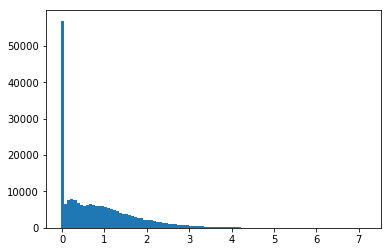

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

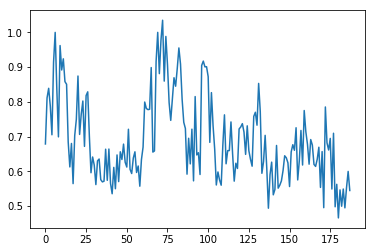

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.219795242397

 1.40118683129
1681

 0.219699136806

 1.43368333263
1682

 0.219263901435

 1.49631505683
1683

 0.217833107498

 1.52263826965
1684

 0.216607823949

 1.48734693615
1685

 0.215308892904

 1.51444805846
1686

 0.215082806384

 1.49746910744
1687

 0.214168799558

 1.42552947861
1688

 0.214307312055

 1.44045567618
1689

 0.214909665763

 1.45623579977
1690

 0.214245709124

 1.47757566869
1691

 0.213926026297

 1.46300461127
1692

 0.215541127171

 1.45139711092


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.840931


In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.847825


In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.847915


In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.815969


In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21430731205460202

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21416879955836596

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21490966576332429

(54, 4100) 0.847915


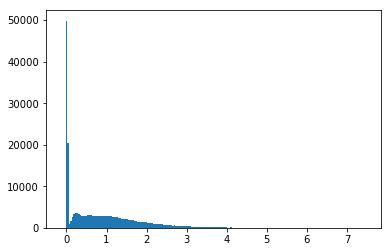

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True